In [8]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import math as math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d


#Graph Settings
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] =15
plt.rcParams["figure.figsize"] = fig_size

name=["SKMS", "SKP","SLY4","SV-MIN","UNEDF0","UNEDF1",]

df = pd.read_csv('dme_LO.csv')
df.describe()

,Z,N,Energy,NShells,b0,bz,bp,lambda_n,lambda_p,Lambda_n,...,NABLArhoJ,CoulombE,CoulombDir,CoulombEx,TensorE,HartreeE,ExtraE,ExternalFE,Entropy_n,Entropy_p
count,2045.000000,2045.000000,2045.000000,2045.0,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,...,2045.0,2045.000000,2045.000000,2045.000000,2045.000000,2045.0,2045.0,2045.0,2045.0,2045.0
mean,74.604401,130.920293,-1493.323696,20.0,2.187839,2.265490,2.152426,-4.647053,-10.242289,-4.647053,...,0.0,718.477082,746.391564,-27.914481,-10.231653,0.0,0.0,0.0,0.0,0.0
std,30.019278,62.509271,576.279145,0.0,0.210675,0.253674,0.213412,3.671046,6.063267,3.671046,...,0.0,417.412212,428.461010,11.190498,3.793407,0.0,0.0,0.0,0.0,0.0
min,2.000000,2.000000,-2381.981300,20.0,1.156730,1.193800,1.138640,-21.176000,-27.610260,-21.176000,...,0.0,0.759800,1.326000,-46.467000,-22.568300,0.0,0.0,0.0,0.0,0.0
25%,52.000000,82.000000,-1986.062400,20.0,2.082000,2.130150,2.020750,-6.887600,-14.650090,-6.887600,...,0.0,348.172500,367.071900,-37.522900,-12.776400,0.0,0.0,0.0,0.0,0.0
50%,78.000000,132.000000,-1589.249300,20.0,2.238340,2.319290,2.207960,-3.792500,-10.111270,-3.792500,...,0.0,704.671600,734.165000,-29.113300,-10.702600,0.0,0.0,0.0,0.0,0.0
75%,100.000000,178.000000,-1093.523500,20.0,2.348280,2.426400,2.311810,-1.745410,-5.338260,-1.745410,...,0.0,1079.901100,1117.749600,-19.339800,-7.900900,0.0,0.0,0.0,0.0,0.0
max,120.000000,260.000000,-18.907600,20.0,2.470890,2.777980,2.538760,0.659680,1.283770,0.659680,...,0.0,1513.210800,1559.677800,-0.566200,0.001800,0.0,0.0,0.0,0.0,0.0


In [9]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20


exp_energies = np.loadtxt('EXPERIMENT_AME2016.dat',usecols=(3,4,5))
e_df=pd.DataFrame(exp_energies)
e_df.columns=['N','Z','exp_BE']
e_df.describe()

,N,Z,exp_BE
count,3433.000000,3433.000000,3433.000000
mean,82.105447,57.906787,-1108.614513
std,43.245005,27.771253,520.007995
min,1.000000,1.000000,-2085.643974
25%,47.000000,36.000000,-1525.579468
50%,81.000000,58.000000,-1142.562574
75%,114.000000,80.000000,-713.189754
max,177.000000,118.000000,2.802676


In [96]:
match_df=pd.DataFrame()
match_e_df=pd.DataFrame()

for i in range(0,len(e_df)):
    for j in range(0,len(df)):
        if e_df.N.iloc[i]==df.N.iloc[j] and e_df.Z.iloc[i]==df.Z.iloc[j]:
            match_df=match_df.append(df.iloc[j])
            match_e_df=match_e_df.append(e_df.iloc[i])

In [86]:
no_match_df=pd.DataFrame()

for i in range(0,len(df)):
    k=0
    for j in range(0,len(match_df)):
        if df.N.iloc[i]==match_df.N.iloc[j] and df.Z.iloc[i]==match_df.Z.iloc[j]:
            k=1
    if k==0:
        no_match_df=no_match_df.append(df.iloc[i])       

In [93]:
df.describe()

,Z,N,Energy,NShells,b0,bz,bp,lambda_n,lambda_p,Lambda_n,...,NABLArhoJ,CoulombE,CoulombDir,CoulombEx,TensorE,HartreeE,ExtraE,ExternalFE,Entropy_n,Entropy_p
count,2045.000000,2045.000000,2045.000000,2045.0,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,...,2045.0,2045.000000,2045.000000,2045.000000,2045.000000,2045.0,2045.0,2045.0,2045.0,2045.0
mean,74.604401,130.920293,-1493.323696,20.0,2.187839,2.265490,2.152426,-4.647053,-10.242289,-4.647053,...,0.0,718.477082,746.391564,-27.914481,-10.231653,0.0,0.0,0.0,0.0,0.0
std,30.019278,62.509271,576.279145,0.0,0.210675,0.253674,0.213412,3.671046,6.063267,3.671046,...,0.0,417.412212,428.461010,11.190498,3.793407,0.0,0.0,0.0,0.0,0.0
min,2.000000,2.000000,-2381.981300,20.0,1.156730,1.193800,1.138640,-21.176000,-27.610260,-21.176000,...,0.0,0.759800,1.326000,-46.467000,-22.568300,0.0,0.0,0.0,0.0,0.0
25%,52.000000,82.000000,-1986.062400,20.0,2.082000,2.130150,2.020750,-6.887600,-14.650090,-6.887600,...,0.0,348.172500,367.071900,-37.522900,-12.776400,0.0,0.0,0.0,0.0,0.0
50%,78.000000,132.000000,-1589.249300,20.0,2.238340,2.319290,2.207960,-3.792500,-10.111270,-3.792500,...,0.0,704.671600,734.165000,-29.113300,-10.702600,0.0,0.0,0.0,0.0,0.0
75%,100.000000,178.000000,-1093.523500,20.0,2.348280,2.426400,2.311810,-1.745410,-5.338260,-1.745410,...,0.0,1079.901100,1117.749600,-19.339800,-7.900900,0.0,0.0,0.0,0.0,0.0
max,120.000000,260.000000,-18.907600,20.0,2.470890,2.777980,2.538760,0.659680,1.283770,0.659680,...,0.0,1513.210800,1559.677800,-0.566200,0.001800,0.0,0.0,0.0,0.0,0.0


In [98]:
match_df.describe()

,CoulombDir,CoulombE,CoulombEx,Energy,Entropy_n,Entropy_p,ExternalFE,ExtraE,Geff_n,Geff_p,...,quadpole_n,quadpole_p,rhoDELrho,rhoNABLAJ,rho_rho,rho_tau,rms_r_n,rms_r_p,rms_r_t,surfaceE
count,840.000000,840.000000,840.000000,840.000000,840.0,840.0,840.0,840.0,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,526.349030,503.963076,-22.385952,-1119.776189,0.0,0.0,0.0,0.0,-0.133606,-0.166271,...,7.027120,5.427695,151.083245,-48.239572,-4526.138192,192.409867,4.970579,4.846442,4.925740,151.083245
std,362.023756,351.559007,10.642448,513.666496,0.0,0.0,0.0,0.0,0.150913,0.185548,...,22.346205,19.906342,53.287372,19.840118,2310.995742,94.968634,1.281648,1.293196,1.279380,53.287372
min,1.326000,0.759800,-45.374400,-2080.744100,0.0,0.0,0.0,0.0,-1.856120,-2.079470,...,-10.259140,-6.904940,9.232600,-86.587400,-9615.452800,3.753500,1.985130,1.973170,2.045960,9.232600
25%,218.114425,204.055300,-30.970700,-1529.895975,0.0,0.0,0.0,0.0,-0.141230,-0.174422,...,0.000000,0.000000,112.428775,-63.787175,-6304.586675,116.402500,4.242915,4.146025,4.210285,112.428775
50%,466.269700,444.044350,-22.485600,-1159.270350,0.0,0.0,0.0,0.0,-0.088505,-0.109170,...,1.636545,1.118085,158.028300,-50.172400,-4514.666850,192.615650,4.991830,4.898395,4.962570,158.028300
75%,799.819950,768.808825,-14.059125,-729.952825,0.0,0.0,0.0,0.0,-0.066077,-0.081190,...,9.990392,6.821040,192.809025,-34.121725,-2687.493375,267.529400,5.543760,5.431970,5.497823,192.809025
max,1507.433600,1462.059100,-0.566200,-18.907600,0.0,0.0,0.0,0.0,-0.044300,-0.054570,...,212.129430,183.752630,245.928900,-0.592900,-71.154000,399.734600,12.840590,12.845980,12.843160,245.928900


In [97]:
match_e_df.describe()

,N,Z,exp_BE
count,840.000000,840.000000,840.000000
mean,82.895238,58.266667,-1119.777137
std,42.808312,27.476727,512.780726
min,2.000000,2.000000,-2079.744974
25%,48.000000,36.000000,-1529.704455
50%,82.000000,58.000000,-1157.361034
75%,114.000000,80.000000,-729.730699
max,176.000000,118.000000,-26.923085


In [95]:
no_match_df.describe()

,CoulombDir,CoulombE,CoulombEx,Energy,Entropy_n,Entropy_p,ExternalFE,ExtraE,Geff_n,Geff_p,...,quadpole_n,quadpole_p,rhoDELrho,rhoNABLAJ,rho_rho,rho_tau,rms_r_n,rms_r_p,rms_r_t,surfaceE
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.0,1205.0,1205.0,1205.0,1205.000000,1205.000000,...,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,899.782211,868.013816,-31.768394,-1753.721959,0.0,0.0,0.0,0.0,-0.054998,-0.076608,...,10.591472,5.865181,212.230525,-69.867848,-7735.467089,295.780606,6.116099,5.789857,6.010439,212.230525
std,403.731559,393.930351,9.873207,463.372071,0.0,0.0,0.0,0.0,0.023821,0.038638,...,17.812705,12.460066,43.811771,15.076545,2393.683430,89.488045,0.755088,0.801362,0.766531,43.811771
min,40.903800,35.998200,-46.467000,-2381.981300,0.0,0.0,0.0,0.0,-0.201000,-0.367540,...,-37.618050,-22.305550,68.896100,-93.088400,-11478.729600,50.599500,3.863640,3.227130,3.682000,68.896100
25%,581.493800,556.445900,-39.828600,-2118.184400,0.0,0.0,0.0,0.0,-0.058980,-0.083130,...,-0.031860,-0.000020,186.778200,-82.194900,-9678.861300,235.908100,5.671520,5.371350,5.574070,186.778200
50%,967.870800,933.515900,-34.226000,-1877.089600,0.0,0.0,0.0,0.0,-0.047560,-0.063480,...,9.920230,4.935510,223.924800,-72.638400,-8144.214700,317.108700,6.213010,5.918920,6.113430,223.924800
75%,1238.358800,1198.790100,-25.048000,-1487.318600,0.0,0.0,0.0,0.0,-0.040810,-0.054060,...,19.031610,11.488980,245.870300,-60.939100,-6144.526000,371.113200,6.636770,6.320960,6.542630,245.870300
max,1559.677800,1513.210800,-4.905600,-313.577400,0.0,0.0,0.0,0.0,-0.031710,-0.043370,...,202.415860,190.705600,269.578500,-7.862900,-1226.676100,414.304700,12.889240,12.898360,12.893660,269.578500


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\

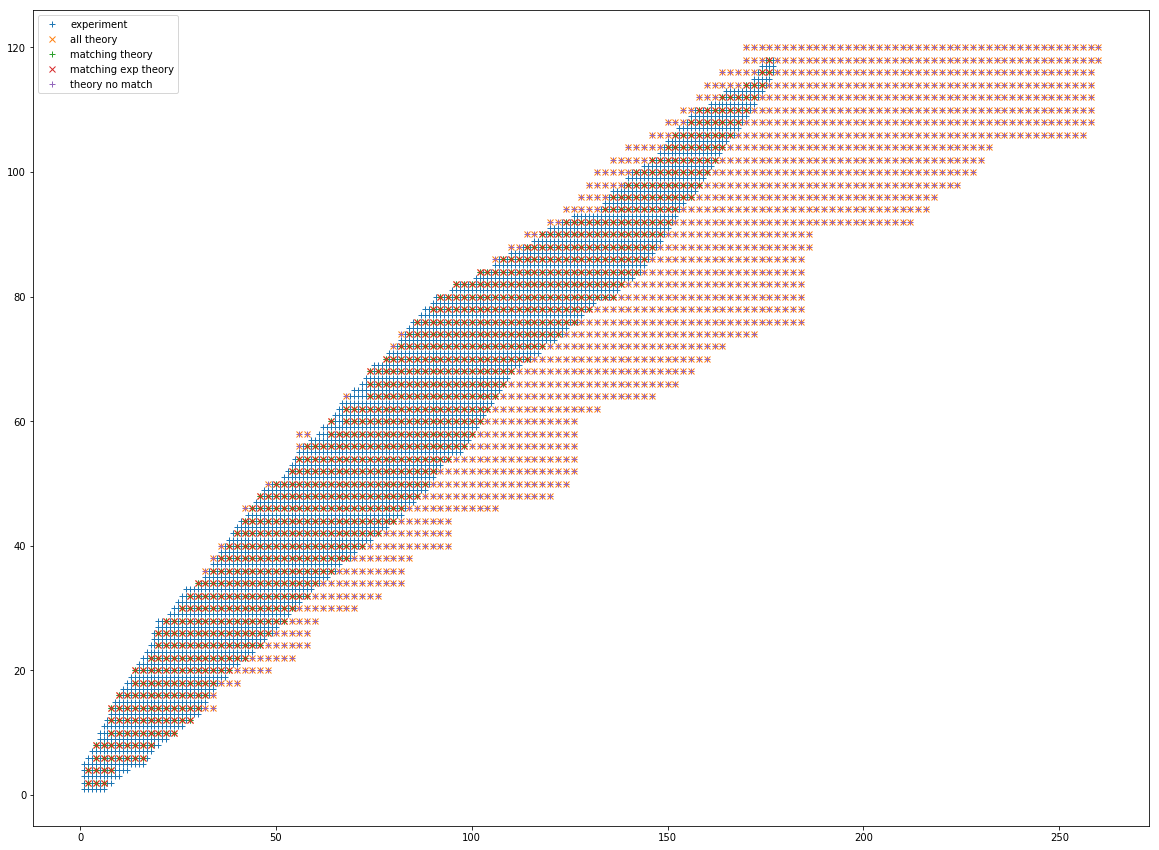

In [104]:
plt.plot(e_df.ix[:,"N"],e_df.ix[:,"Z"],"+", label="experiment")
plt.plot(df.ix[:,"N"],df.ix[:,"Z"],"x", label="all theory")

plt.plot(match_df.ix[:,"N"],match_df.ix[:,"Z"],"+", label="matching theory")
plt.plot(match_e_df.ix[:,"N"],match_e_df.ix[:,"Z"],"x", label="matching exp theory")
plt.plot(no_match_df.ix[:,"N"],no_match_df.ix[:,"Z"],"+", label="theory no match")
plt.legend()
plt.show()

Z
120
118.0
120.0


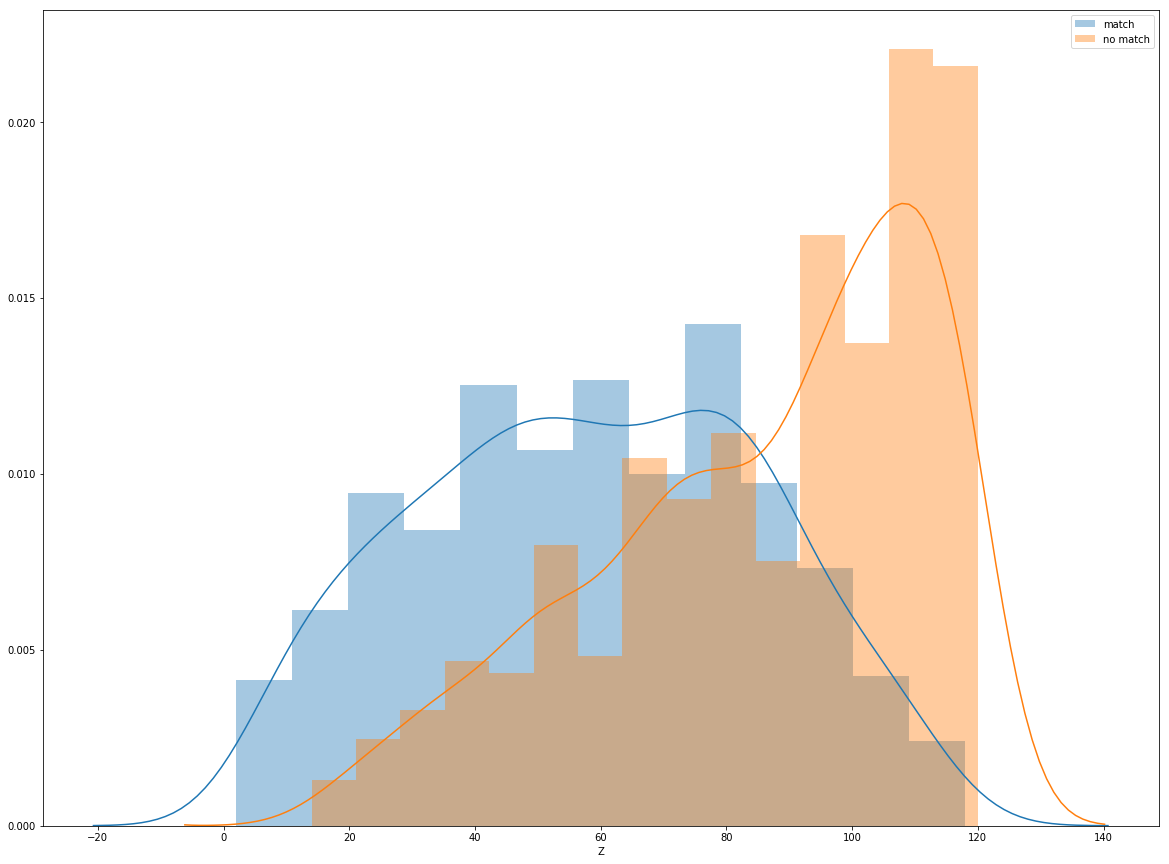




N
260
176.0
260.0


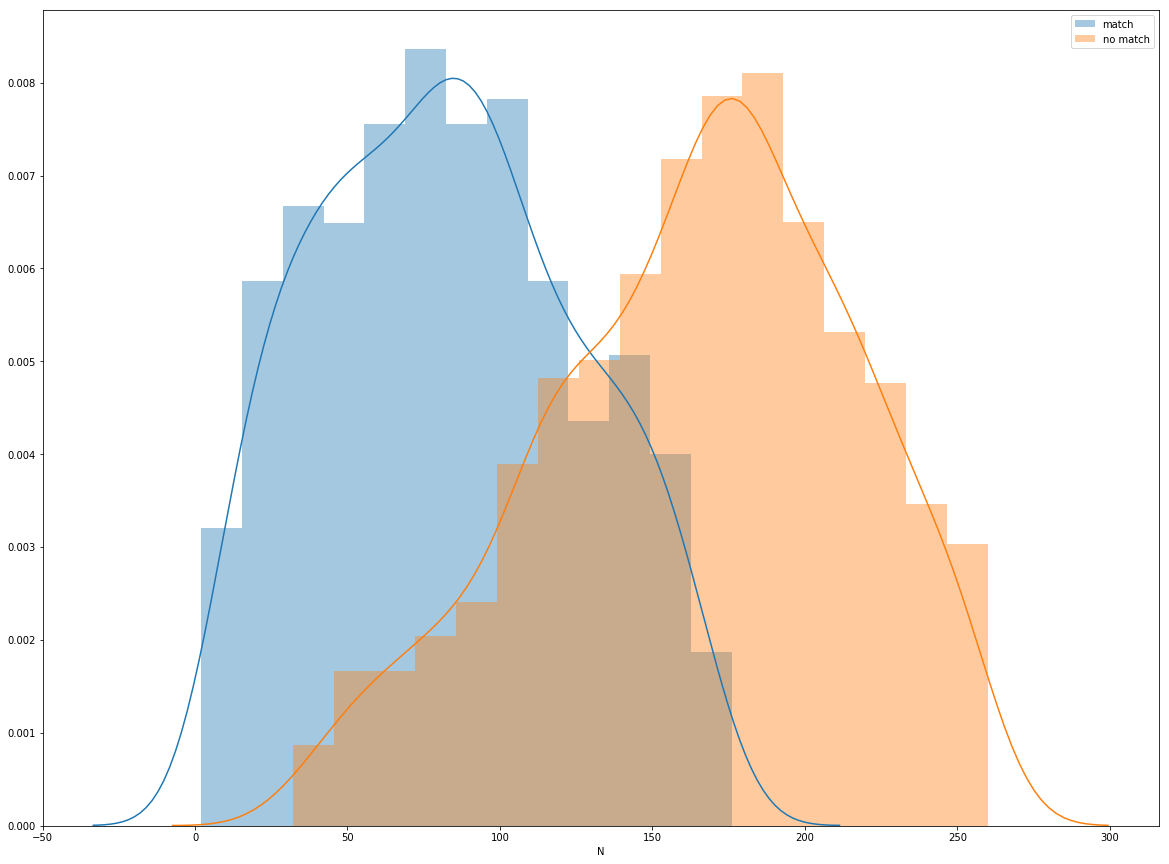




Energy
-18.9076
-18.9076
-313.5774


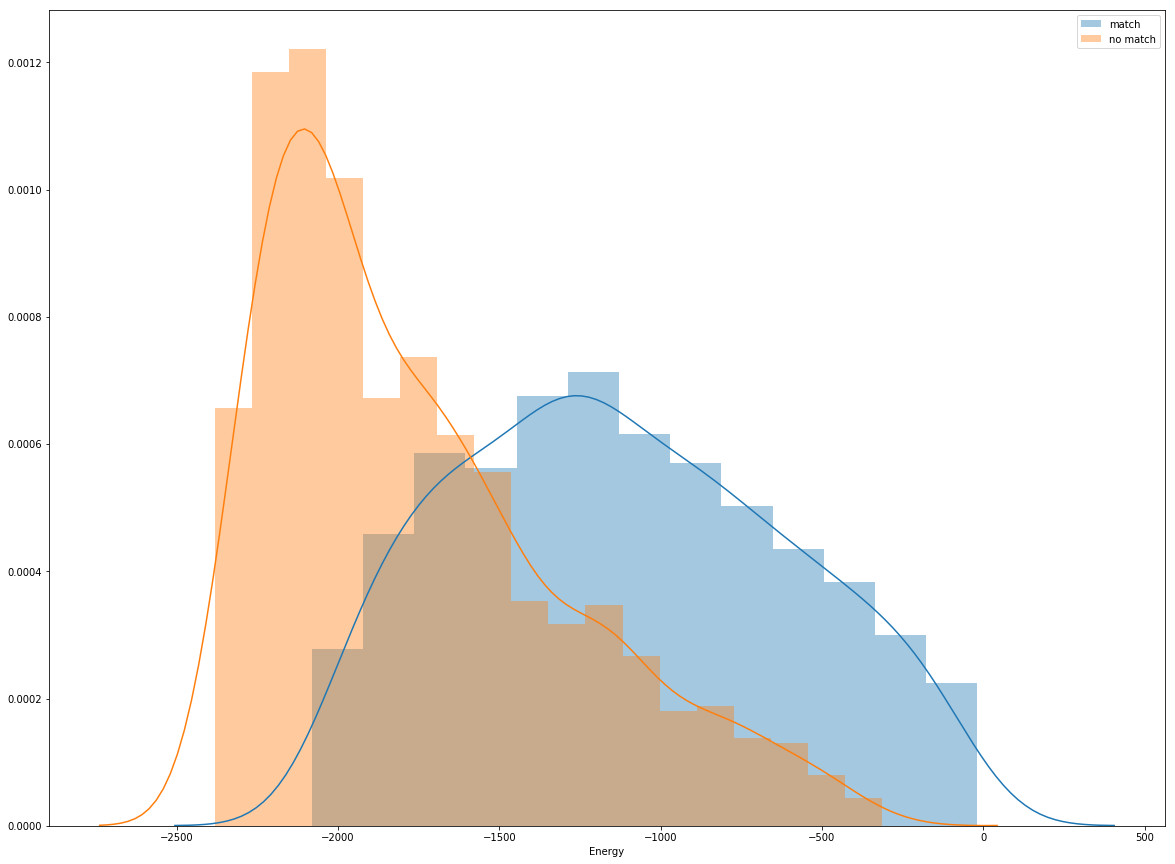




NShells
20.0
20.0
20.0


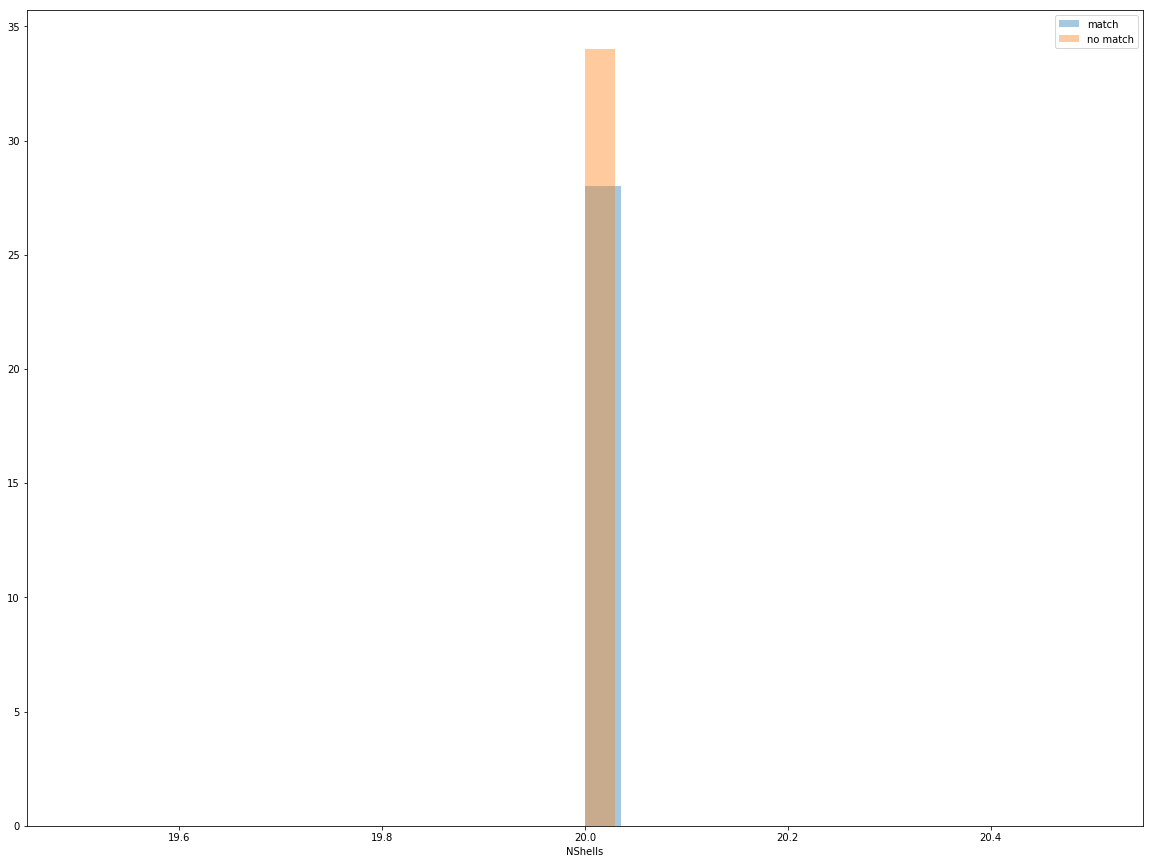




b0
2.4708900000000003
2.36745
2.4708900000000003


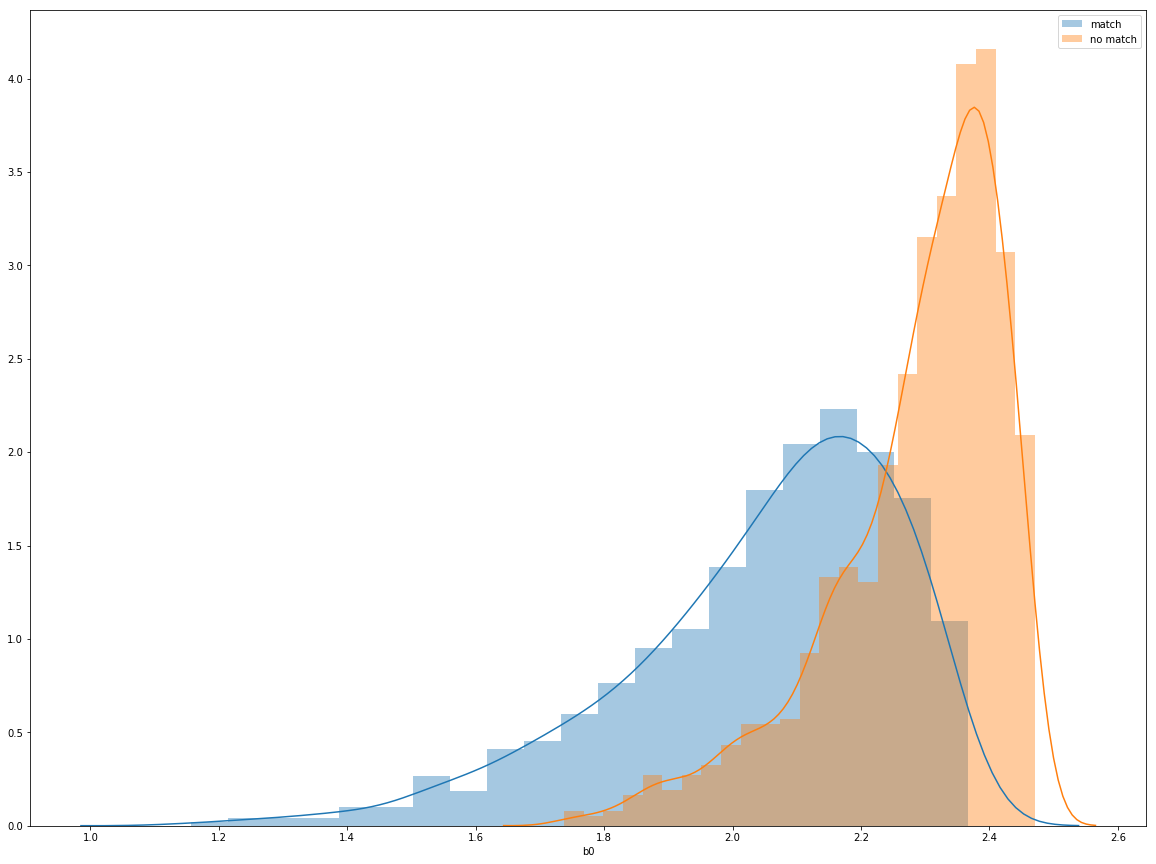




bz
2.77798
2.47988
2.77798


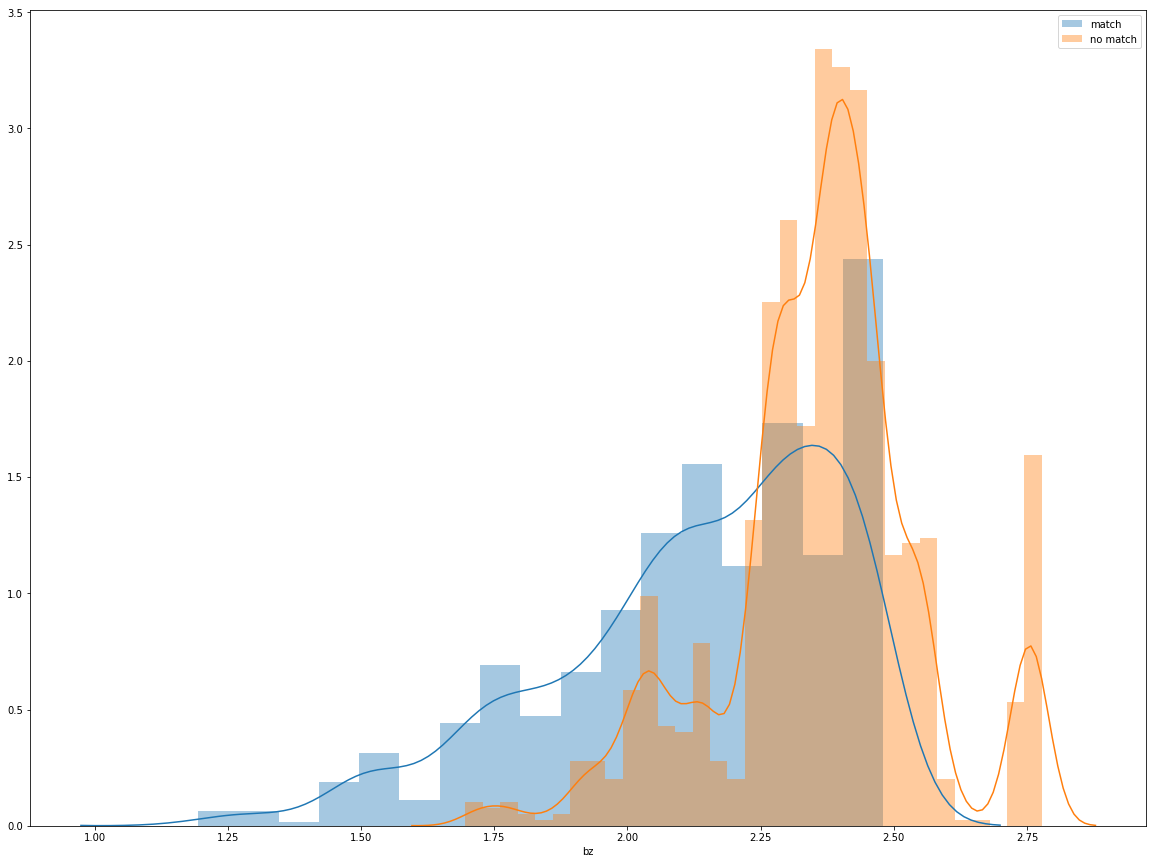




bp
2.53876
2.40508
2.53876


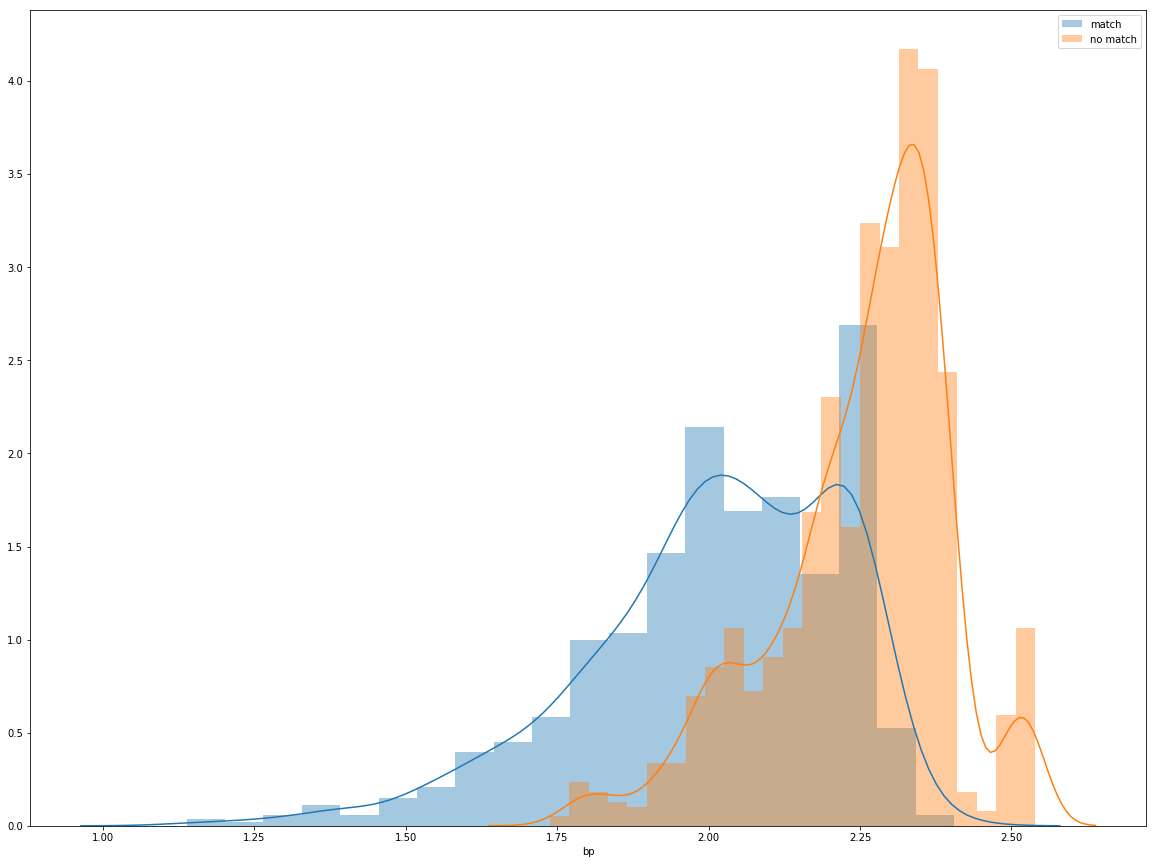




lambda_n
0.65968
0.25869000000000003
0.65968


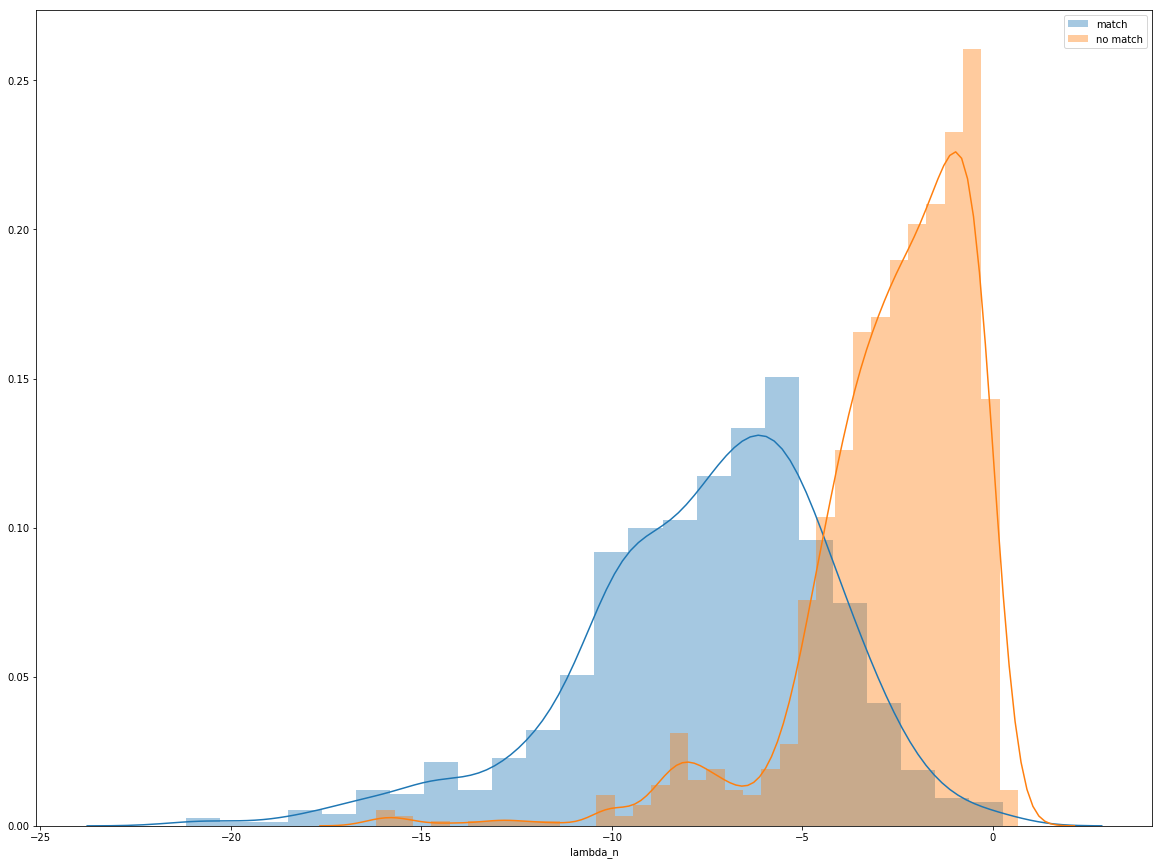




lambda_p
1.28377
1.28377
1.04463


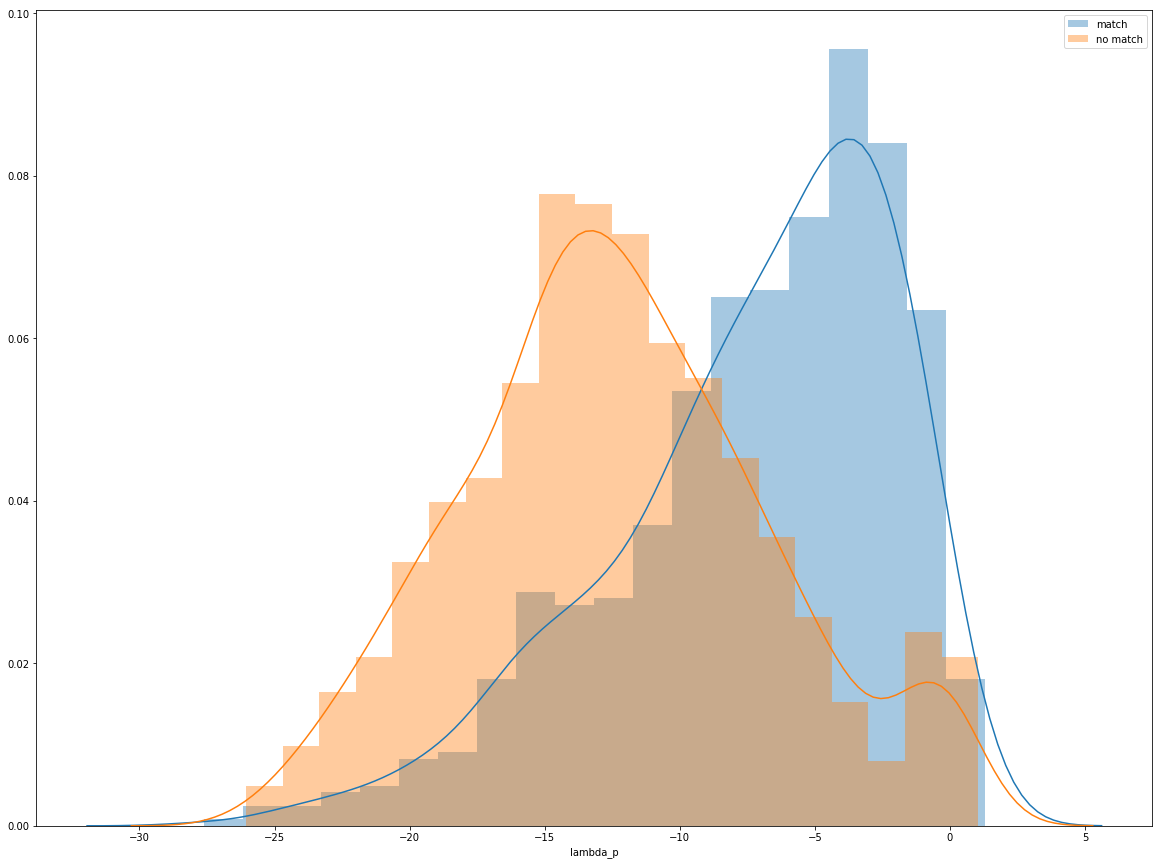




Lambda_n
0.65968
0.25869000000000003
0.65968


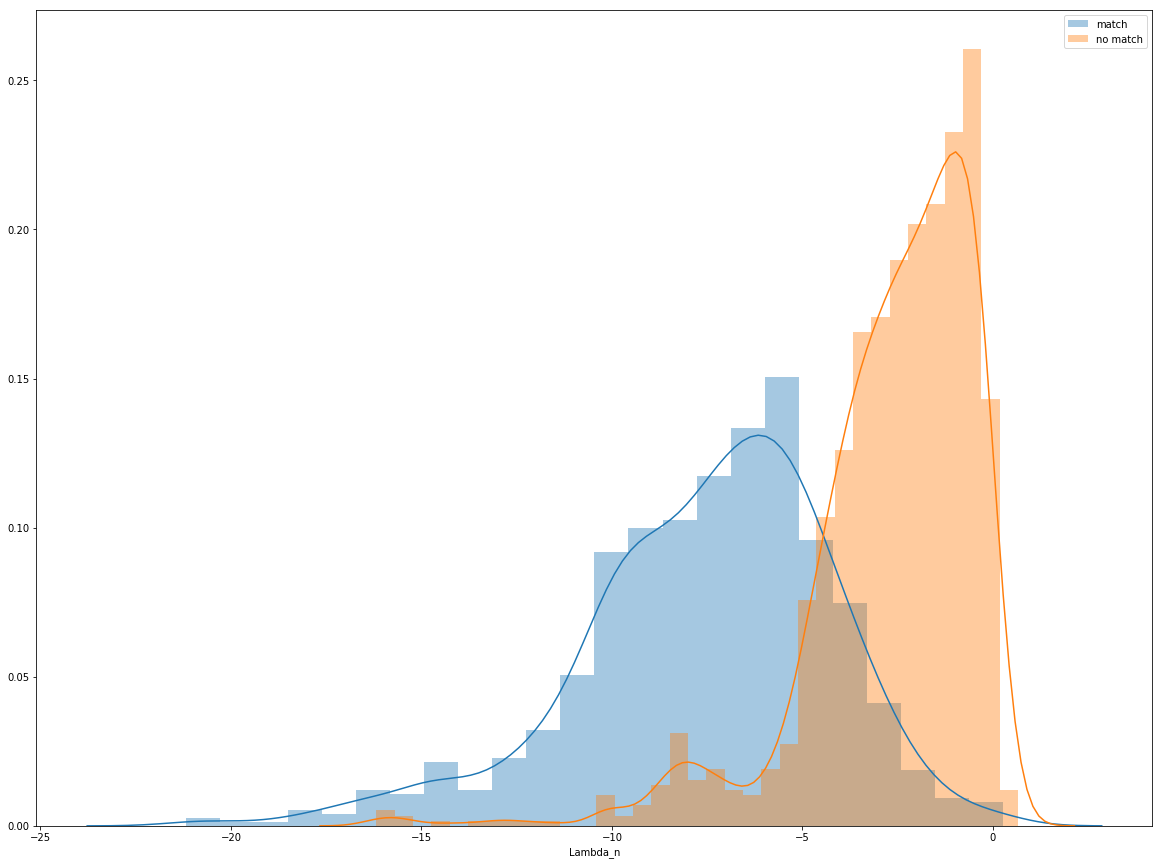




Lambda_p
1.28377
1.28377
1.04463


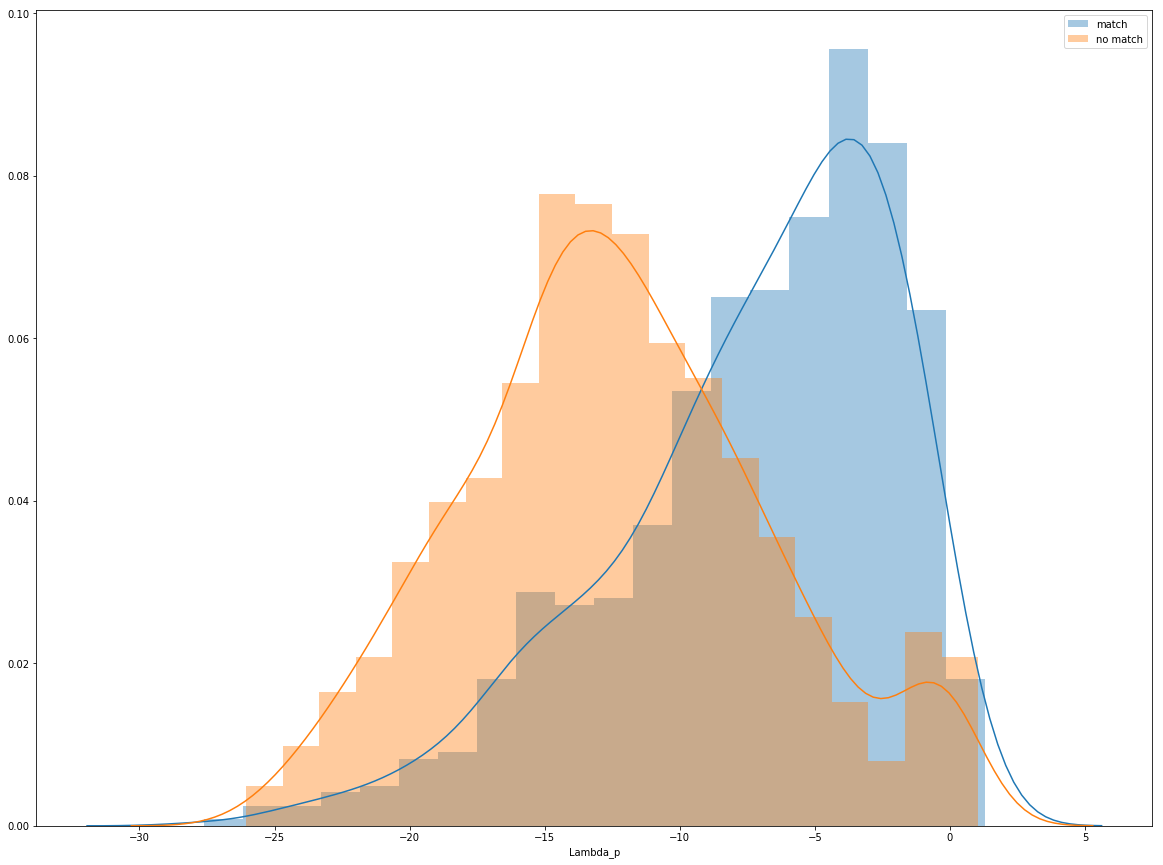




delta_n
1.9877799999999999
1.9877799999999999
1.00042


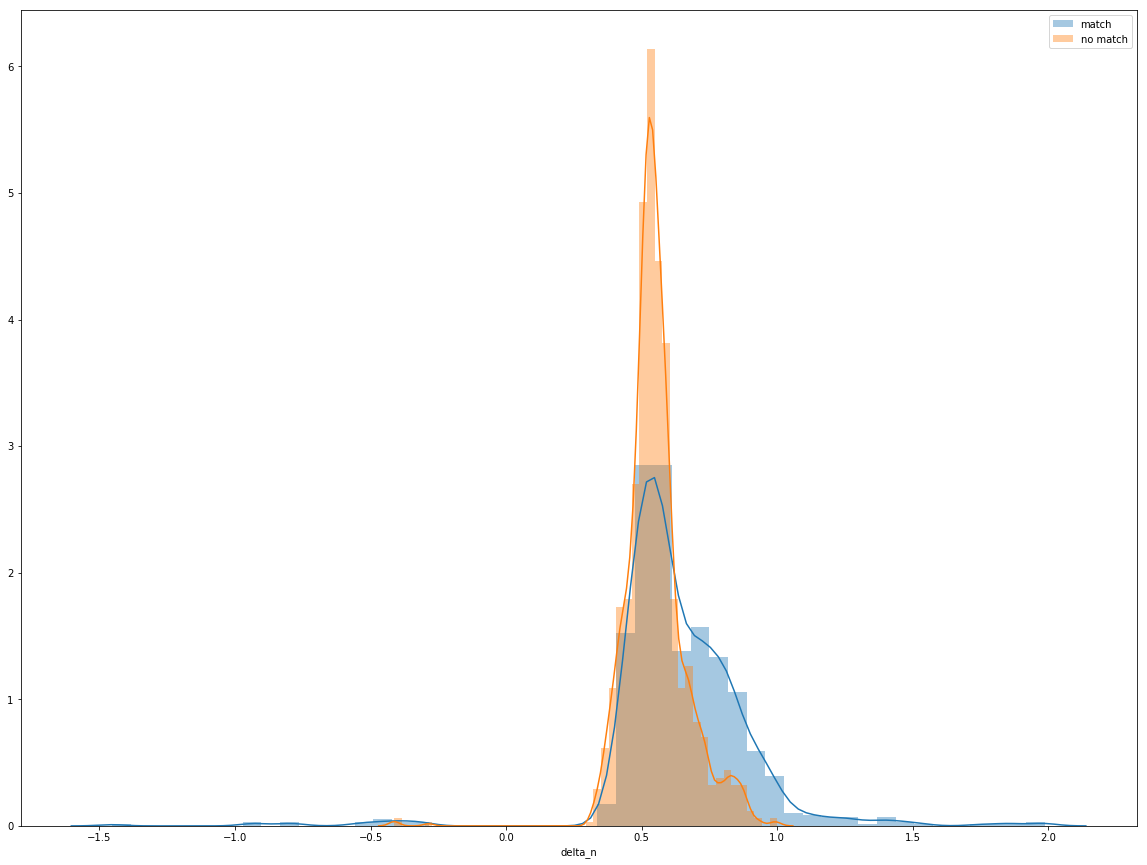




delta_p
2.58609
2.58609
1.11063


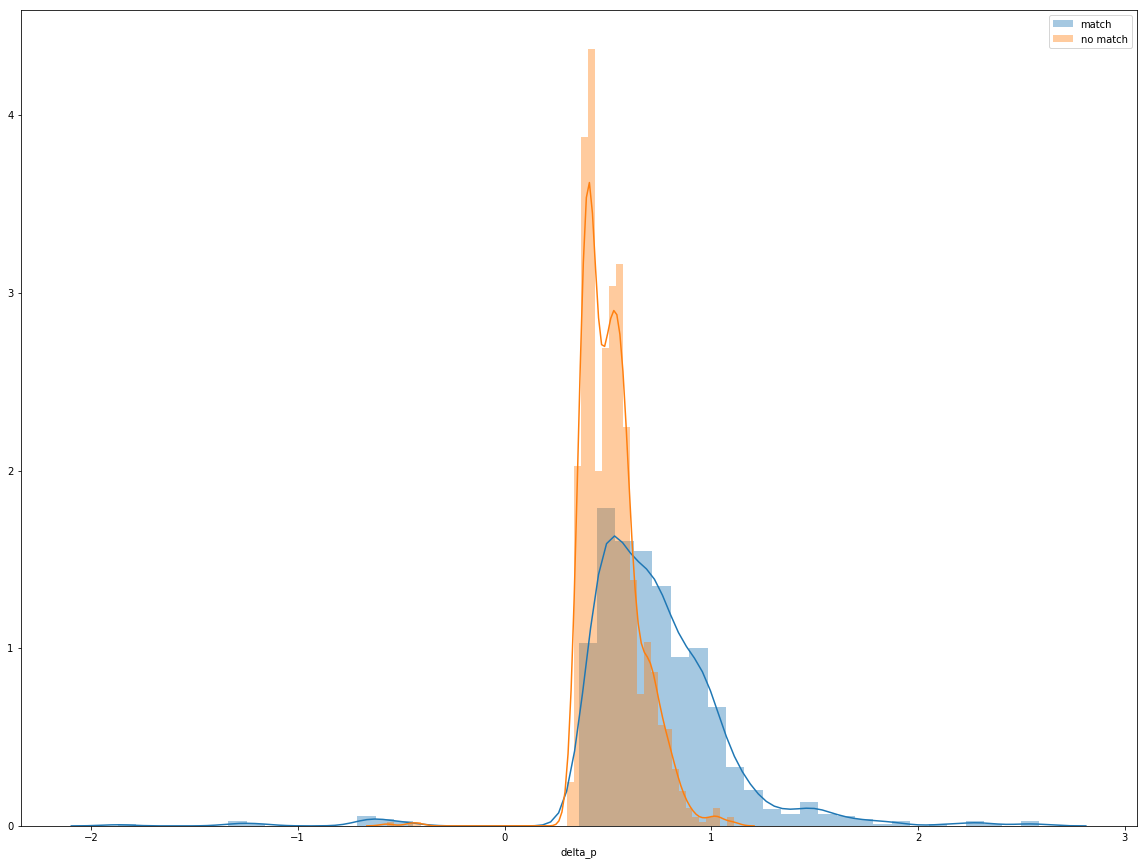




pwi
60.0
60.0
60.0


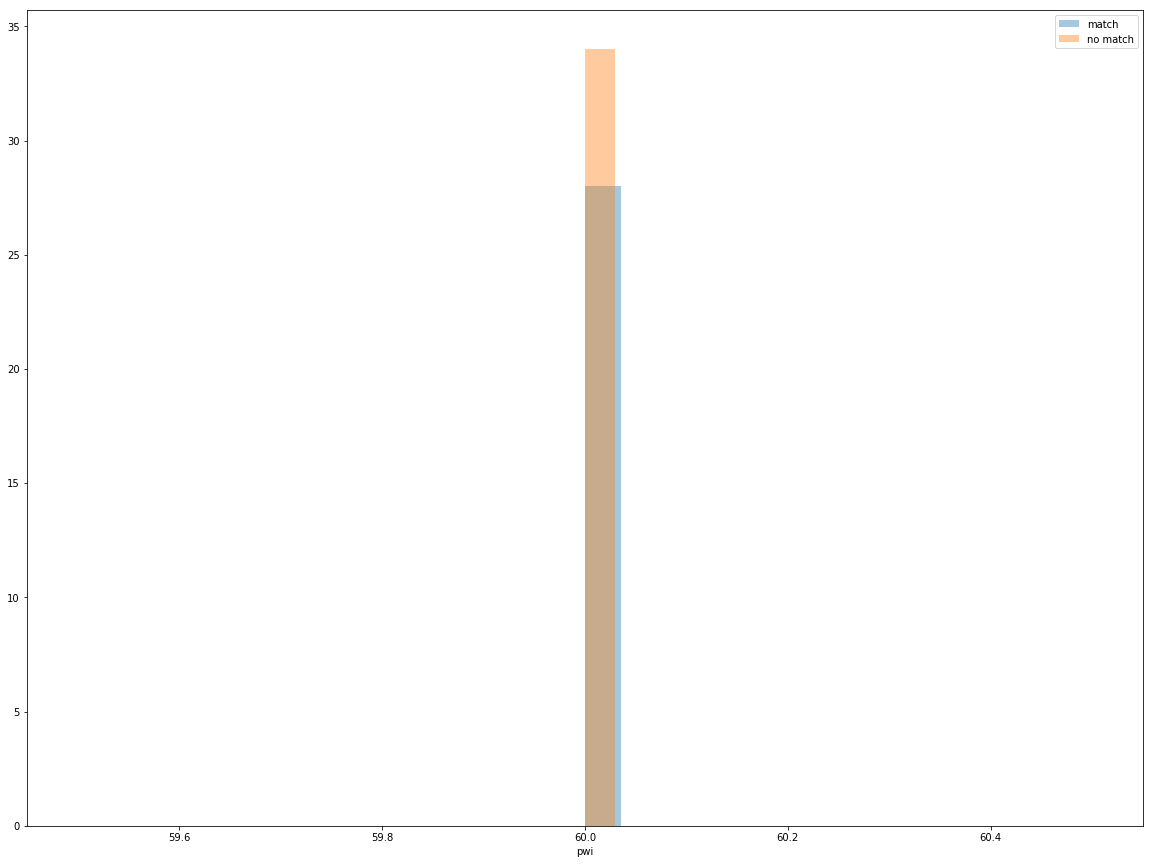




pairingE_n
-0.8579200000000001
-0.9625299999999999
-0.8579200000000001


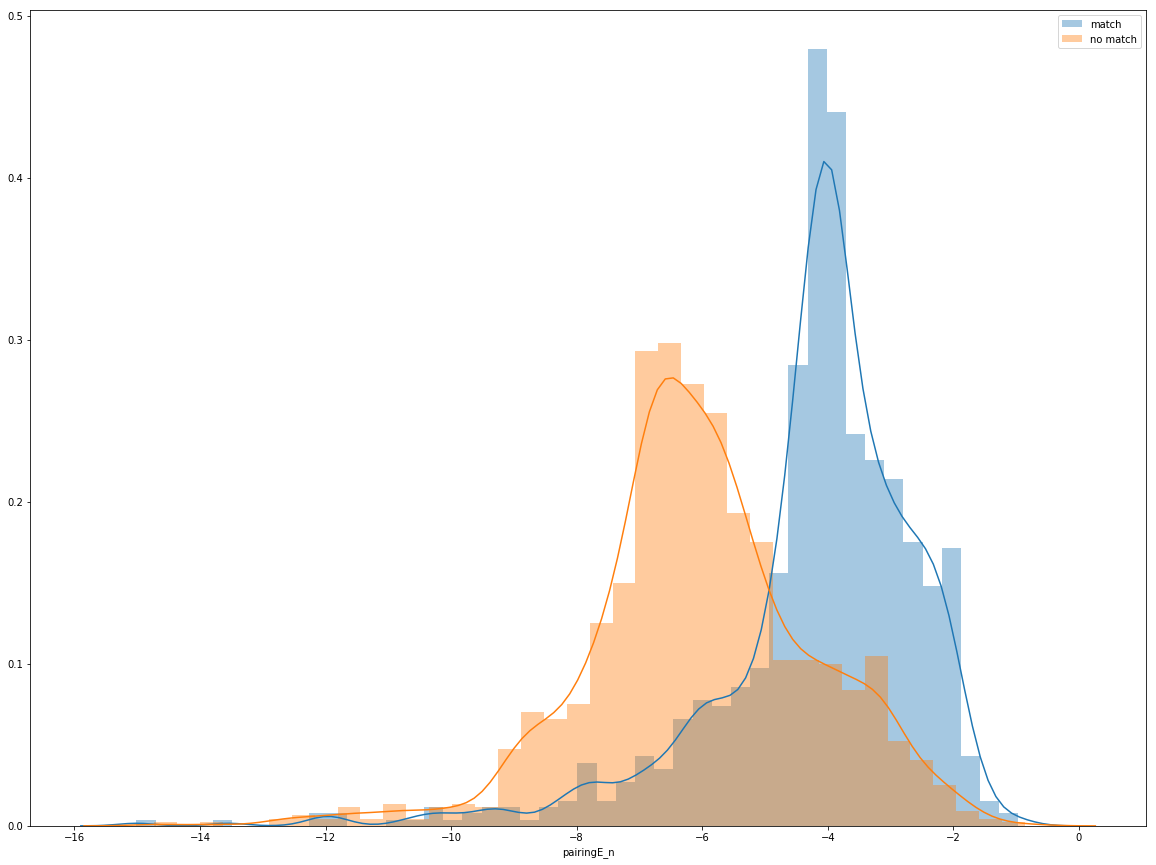




pairingE_p
-1.56164
-1.9959799999999999
-1.56164


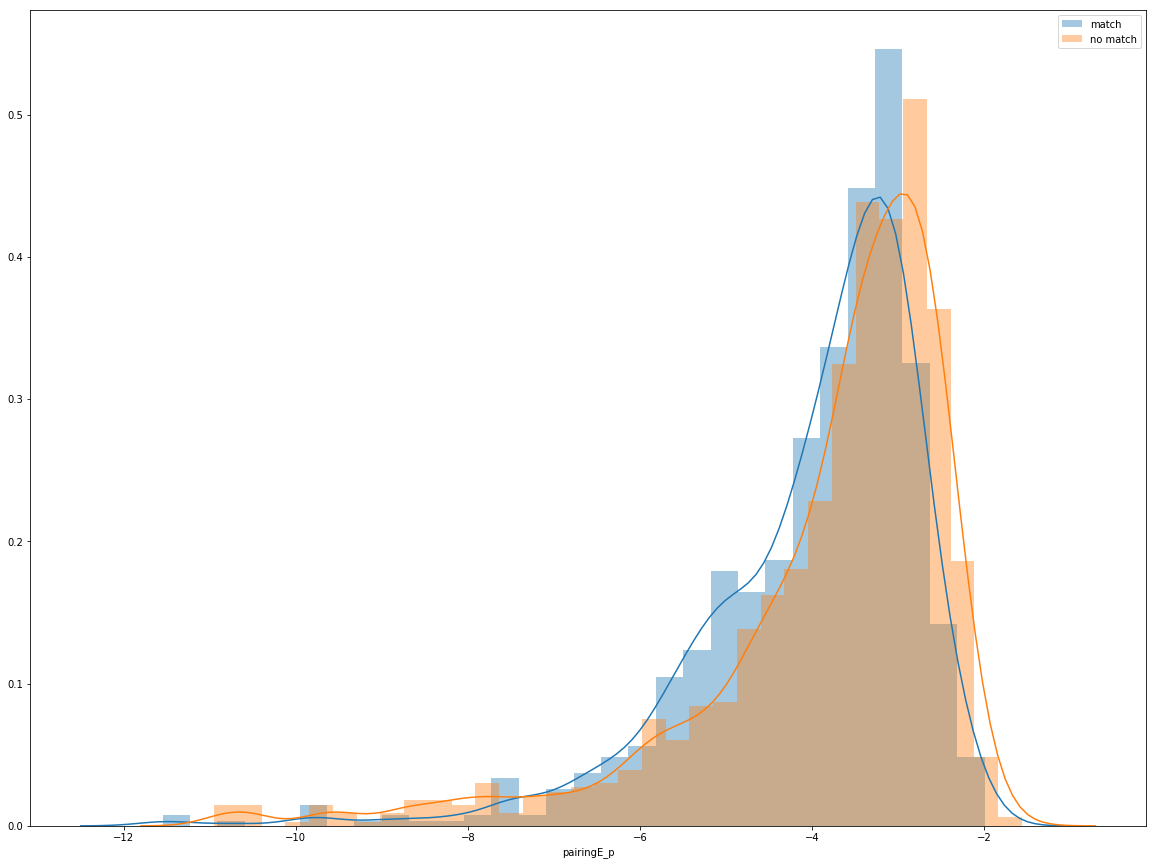




LNlambda_n
3.4280199999999996
3.4280199999999996
0.88992


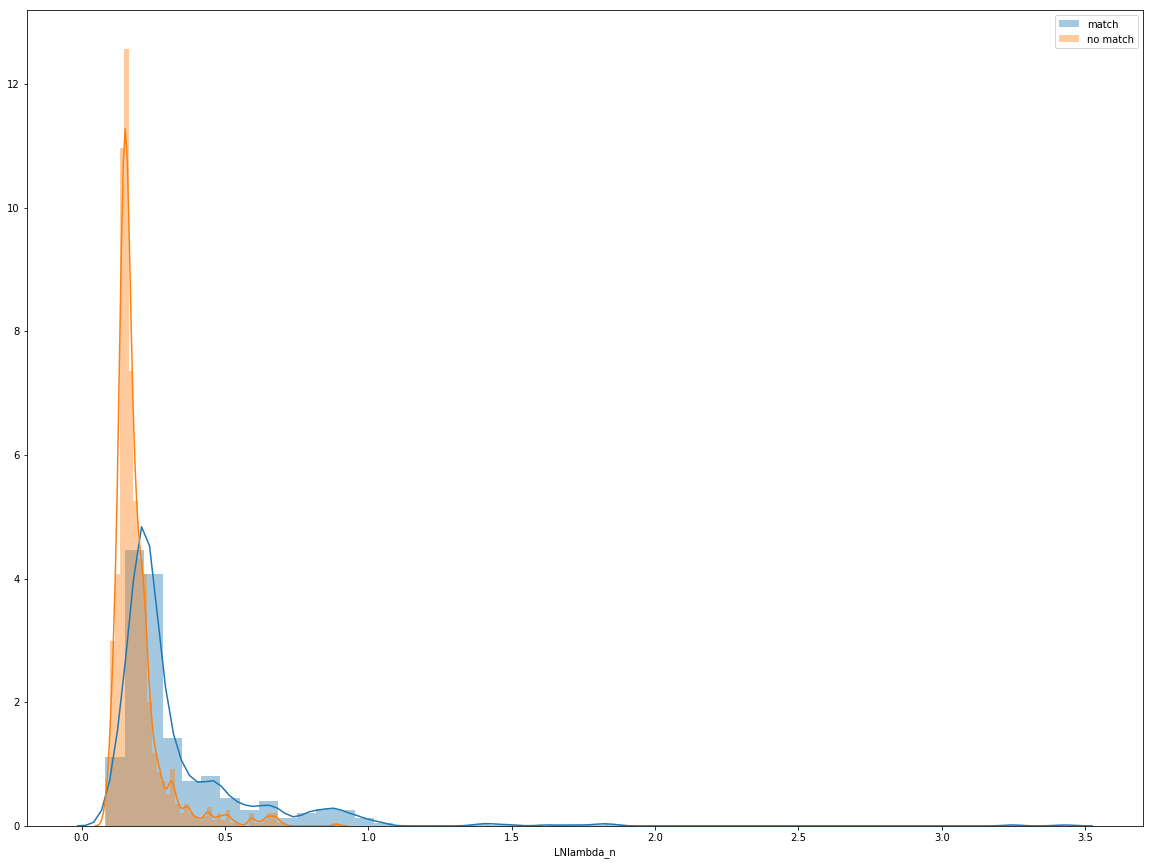




LNlambda_p
3.40205
3.40205
0.9643299999999999


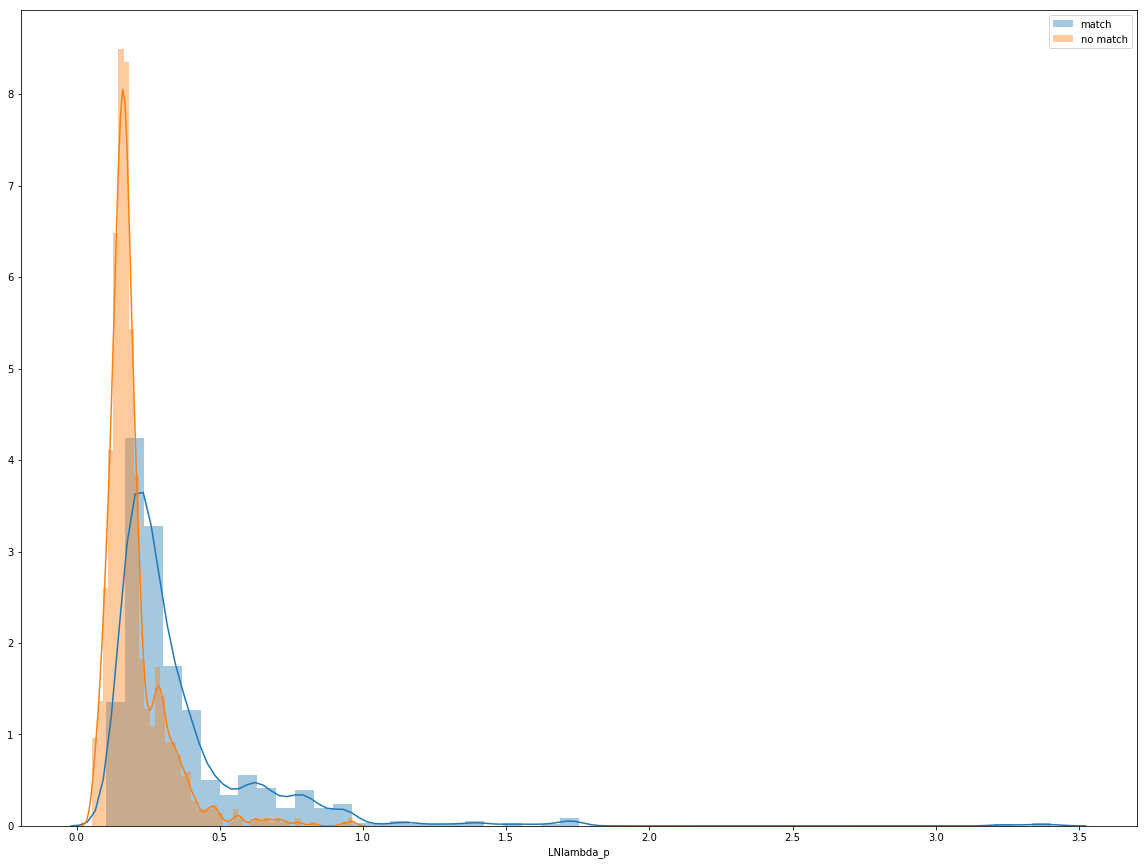




LNEnergy_n
-0.4997
-0.51978
-0.4997


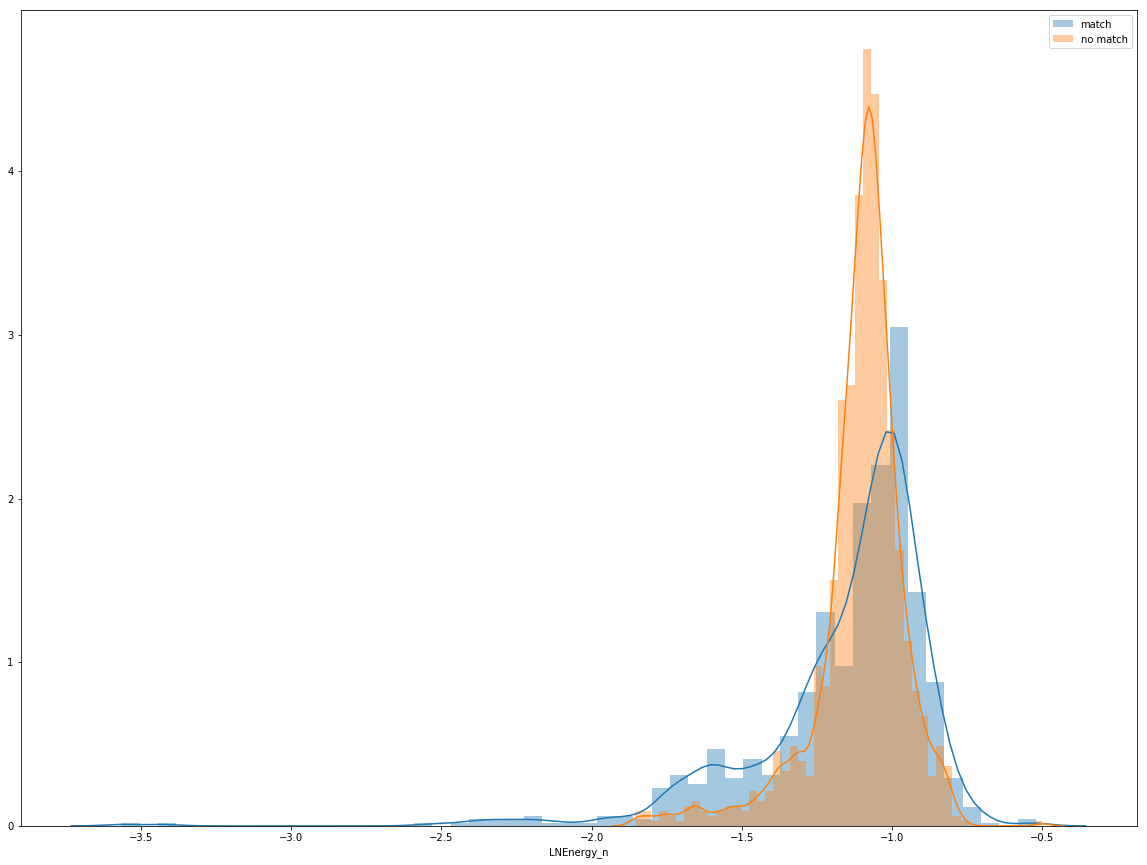




LNEnergy_p
-0.58748
-0.65855
-0.58748


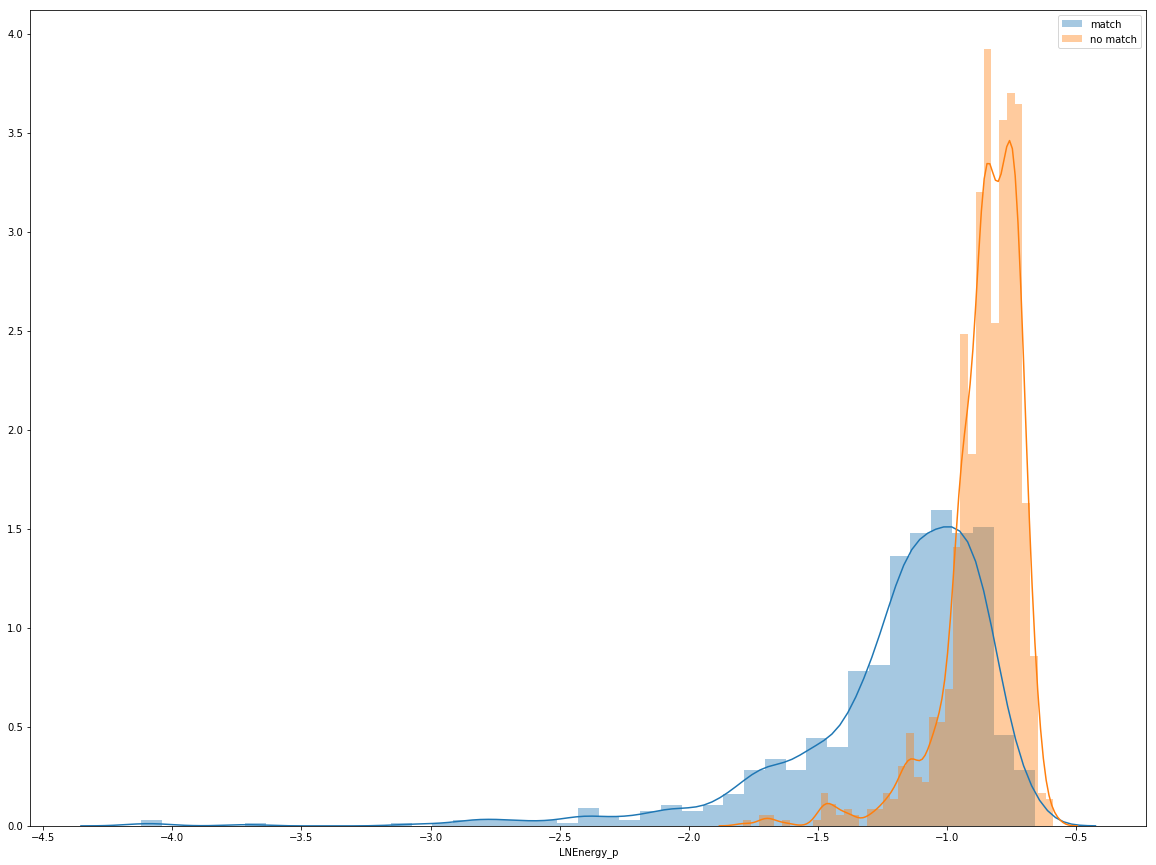




LNdelta_n
5.40118
5.40118
1.39257


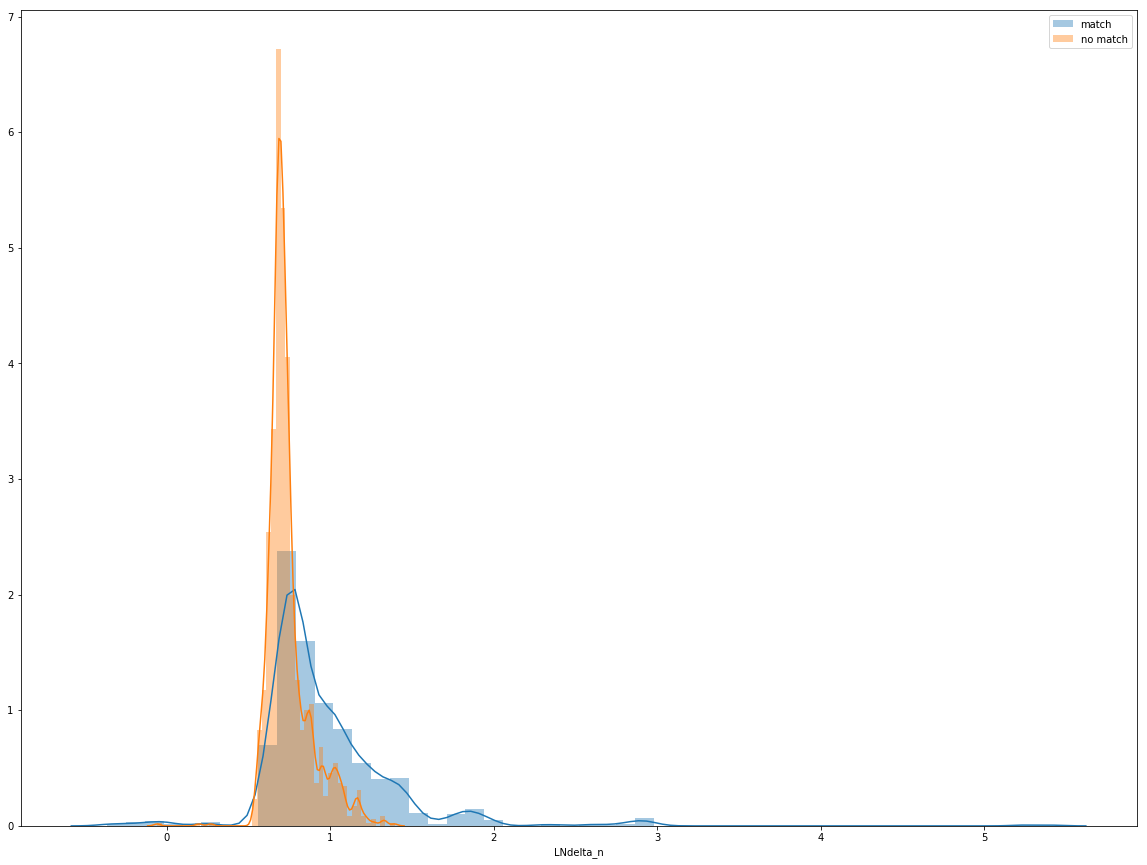




LNdelta_p
5.98813
5.98813
1.81194


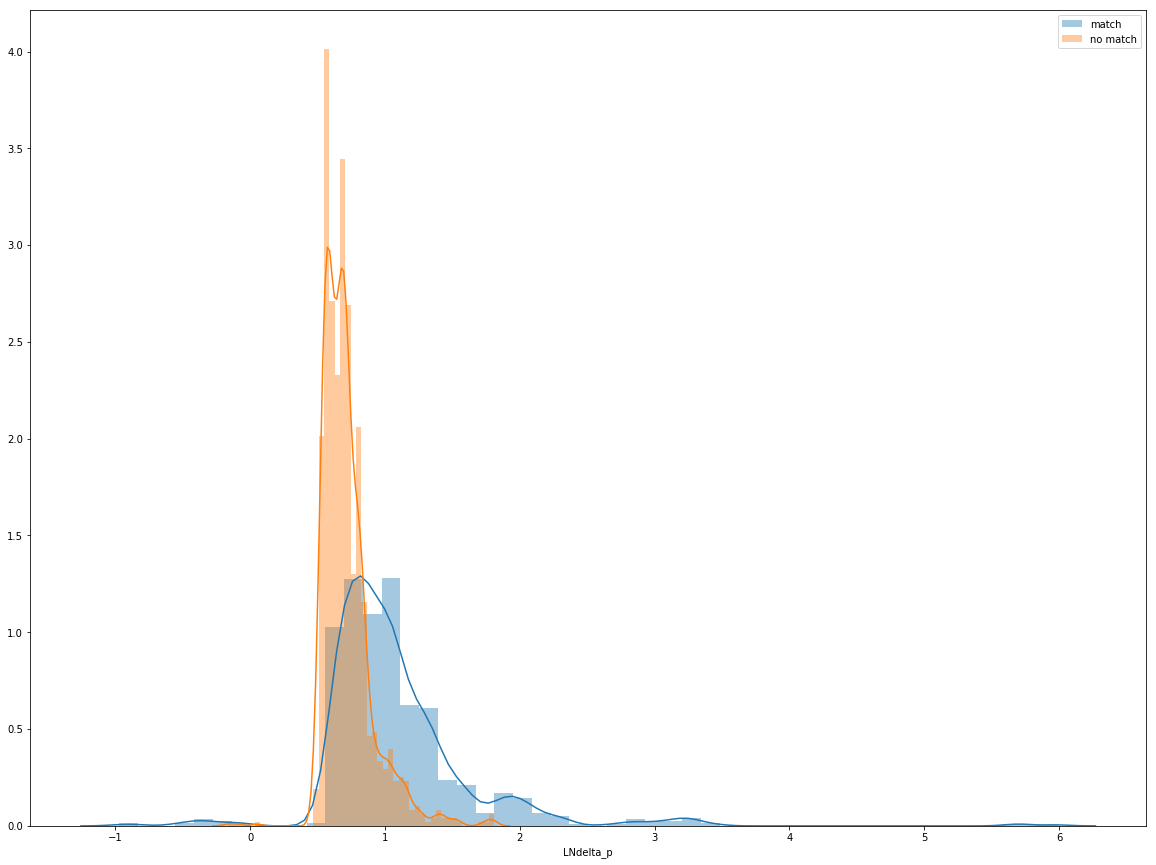




Geff_n
-0.03171
-0.0443
-0.03171


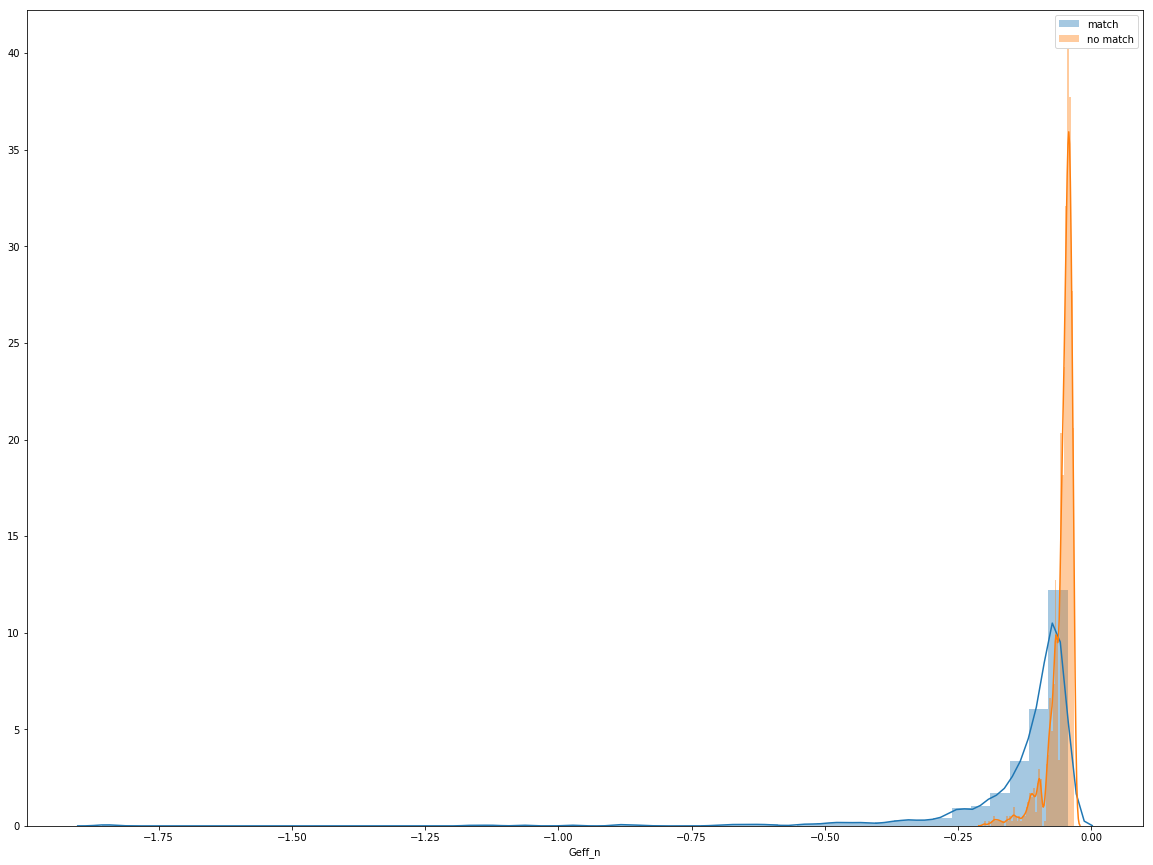




Geff_p
-0.04337
-0.05457000000000001
-0.04337


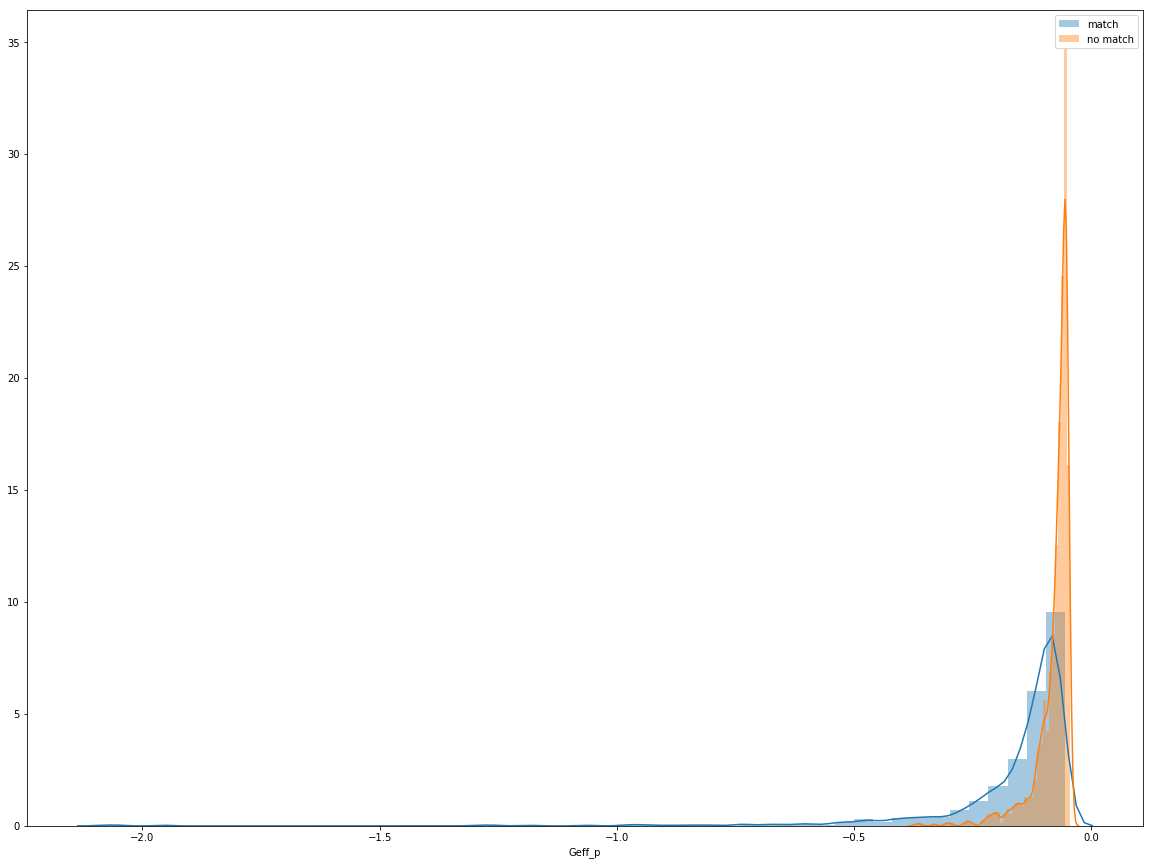




rms_r_n
12.88924
12.840589999999999
12.88924


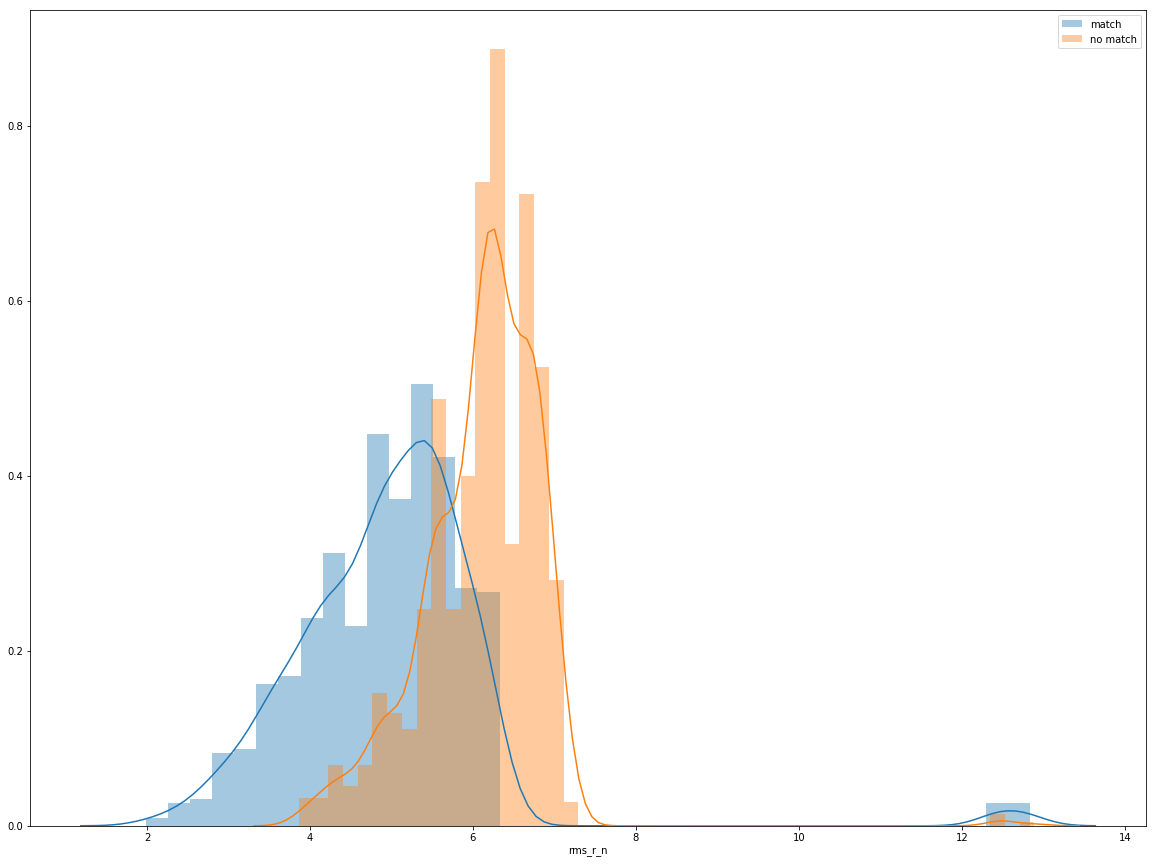




rms_r_p
12.89836
12.84598
12.89836


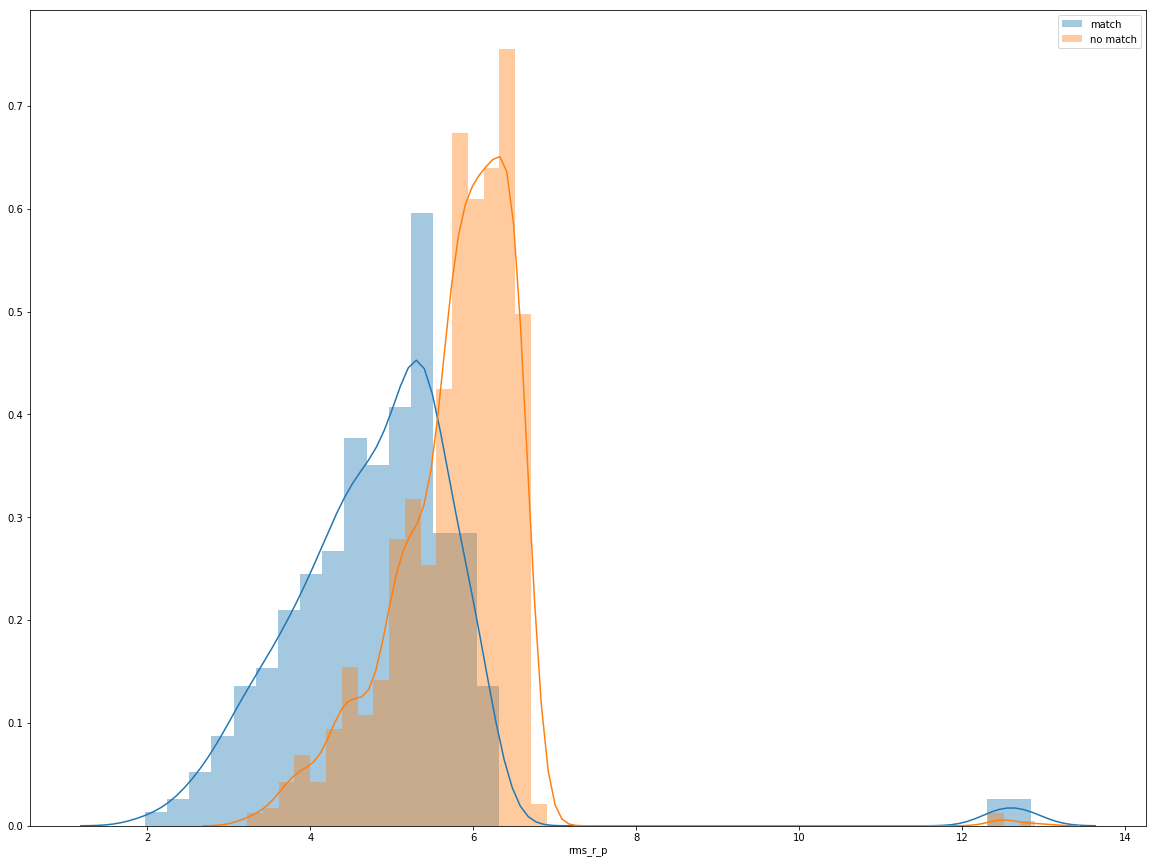




rms_r_t
12.89366
12.843160000000001
12.89366


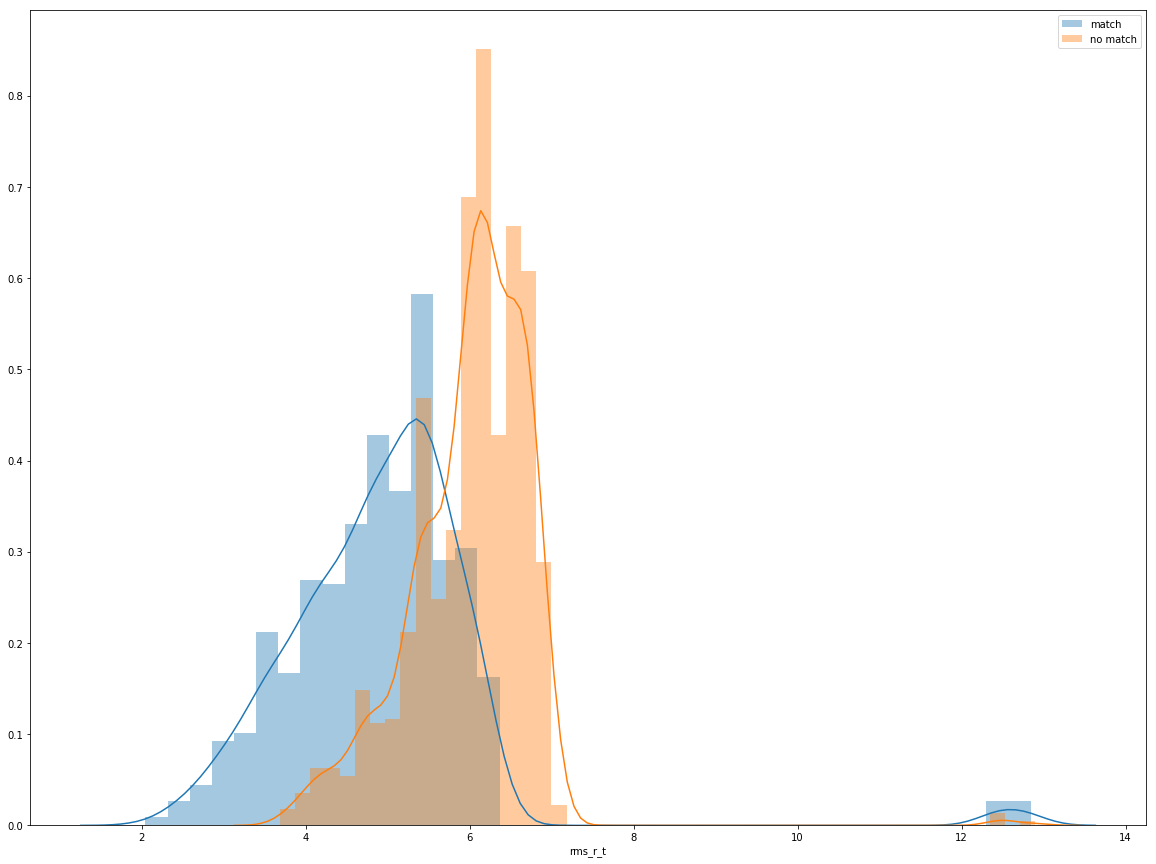




charge_r_p
12.92464
12.87221
12.92464


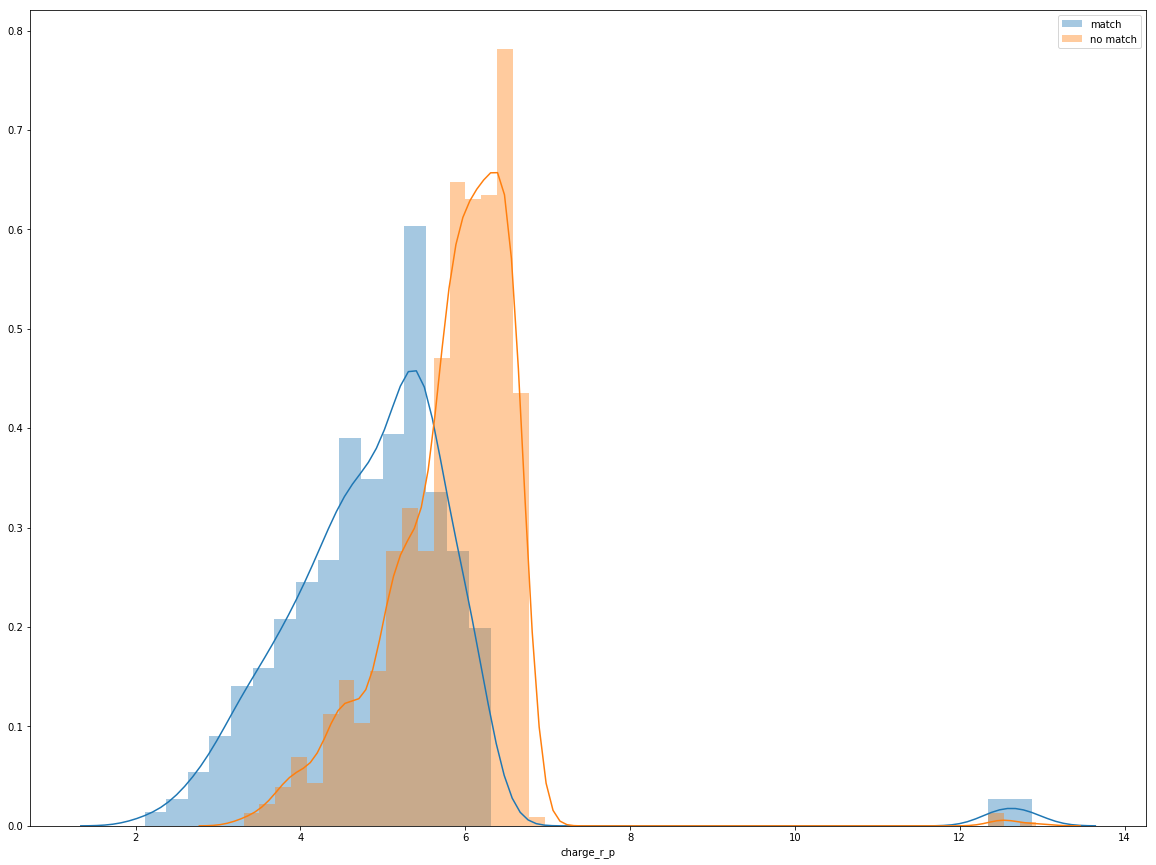




charge_r_t
8.69179
7.97928
8.69179


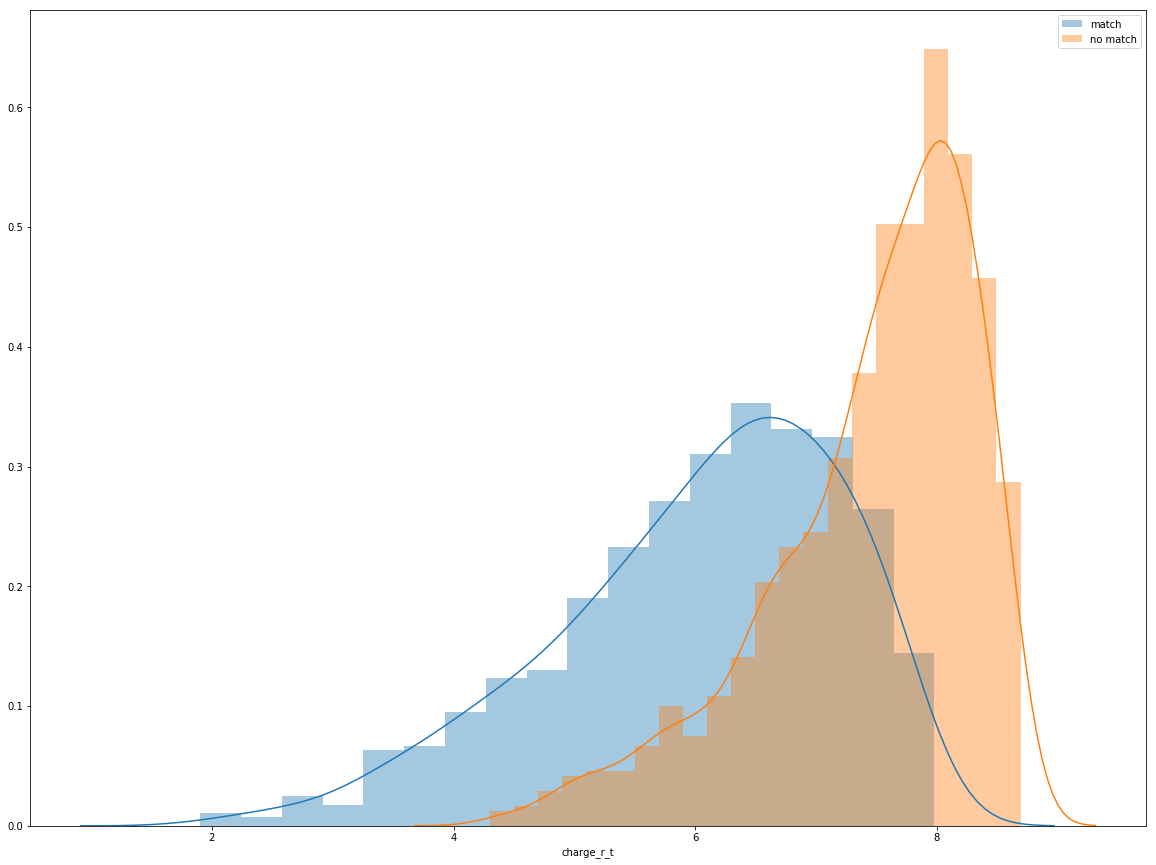




beta2_n
1.4381
1.4375799999999999
1.4381


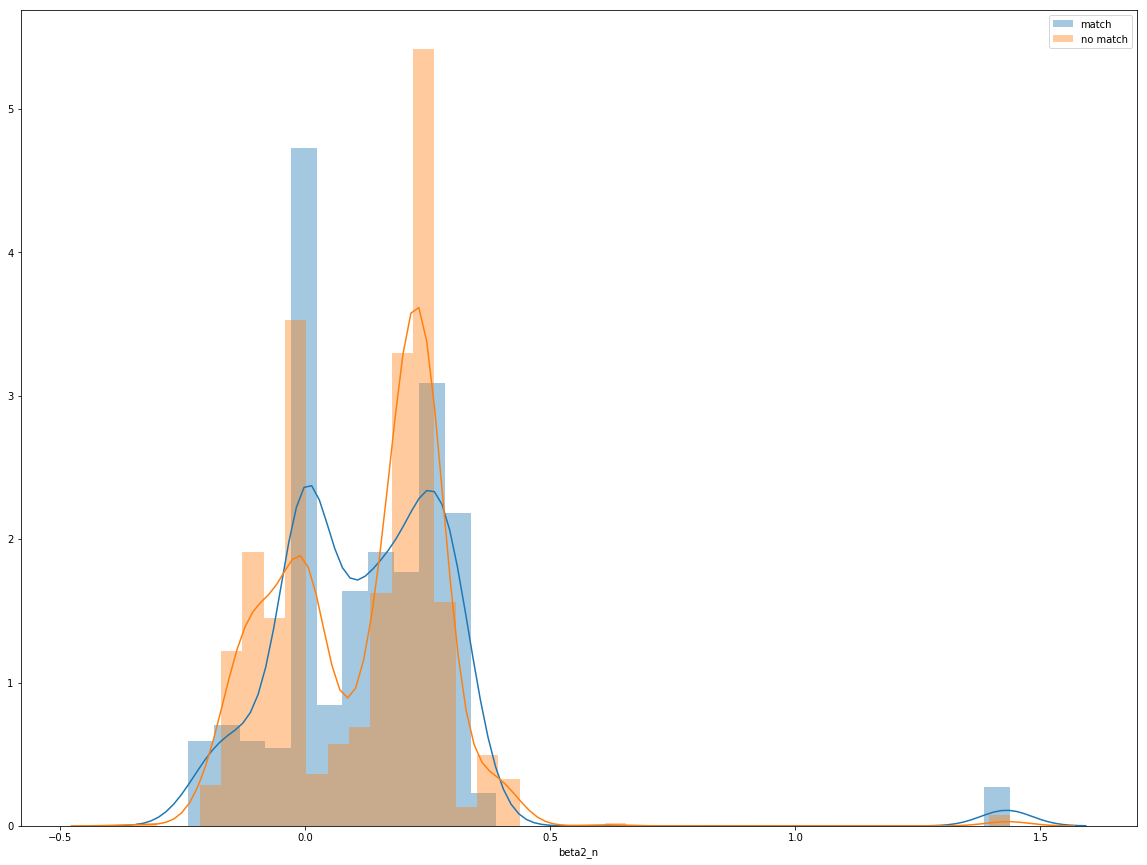




beta2_p
1.43851
1.43851
1.4349100000000001


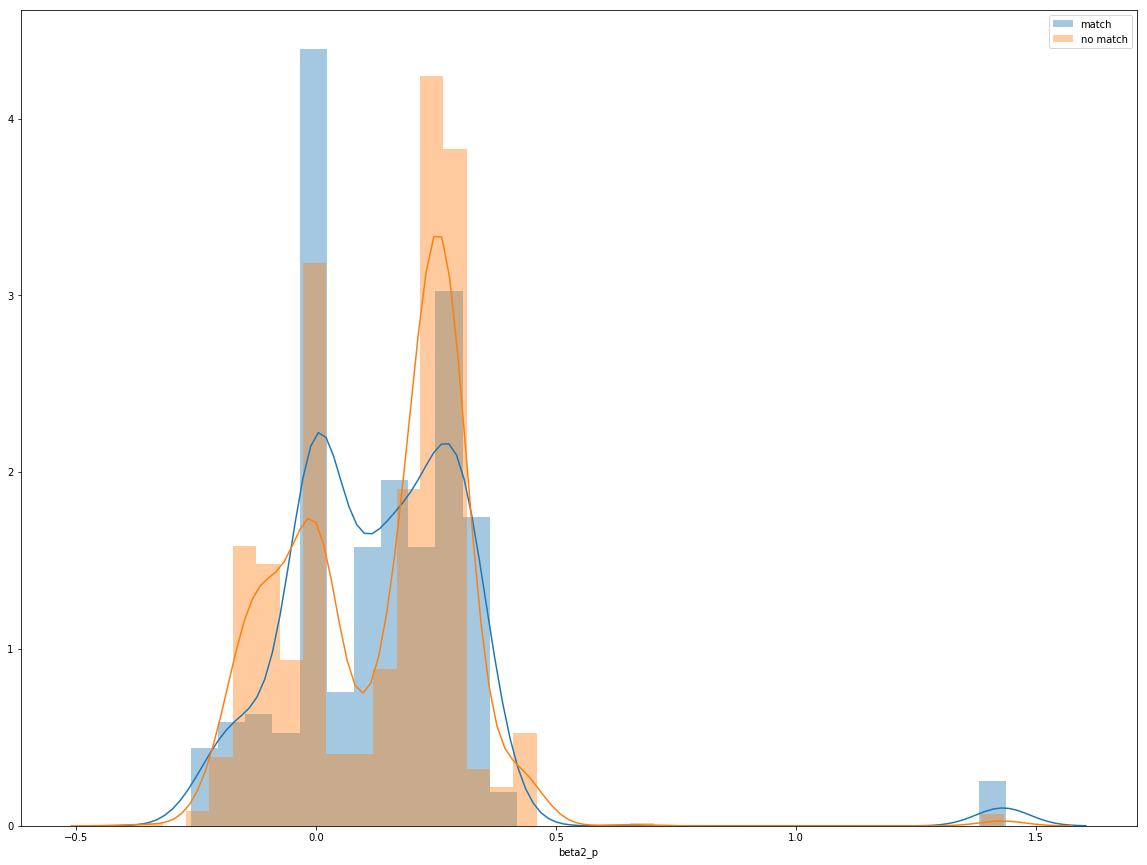




beta2_t
1.43802
1.43802
1.4365


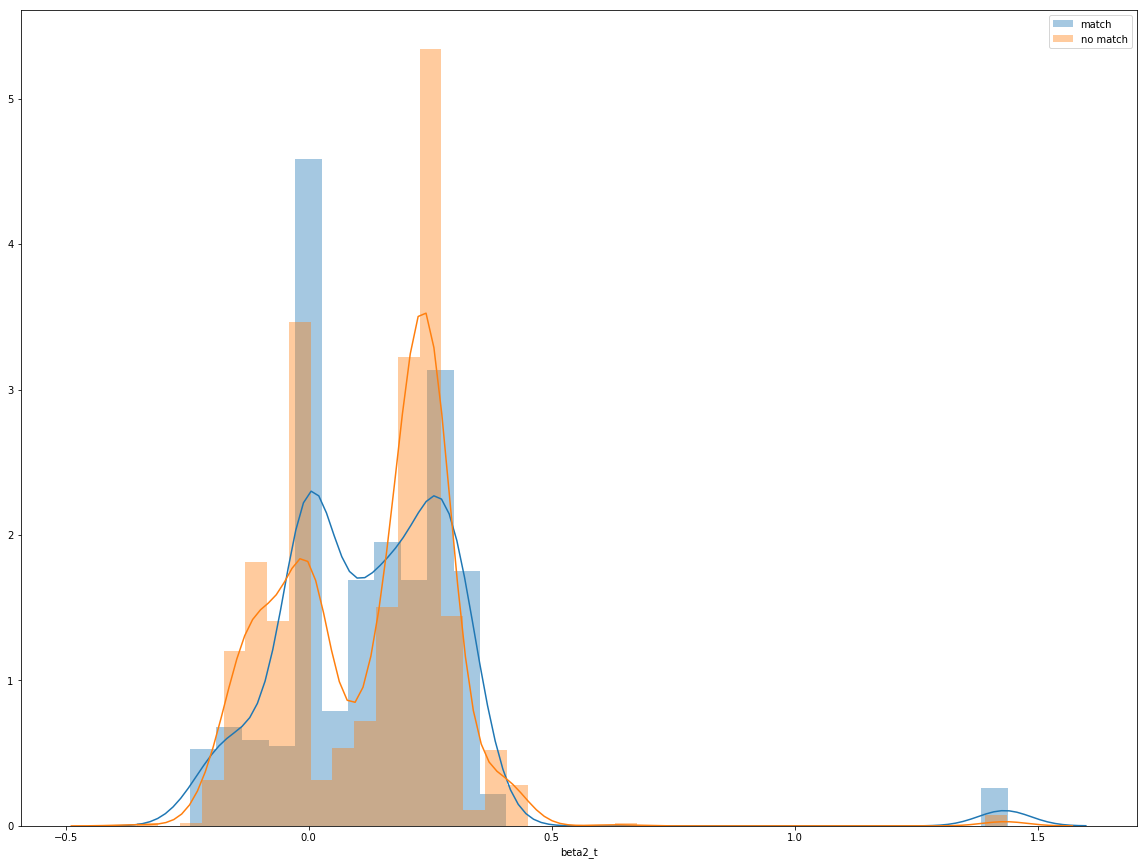




dipole_n
0.0
0.0
0.0


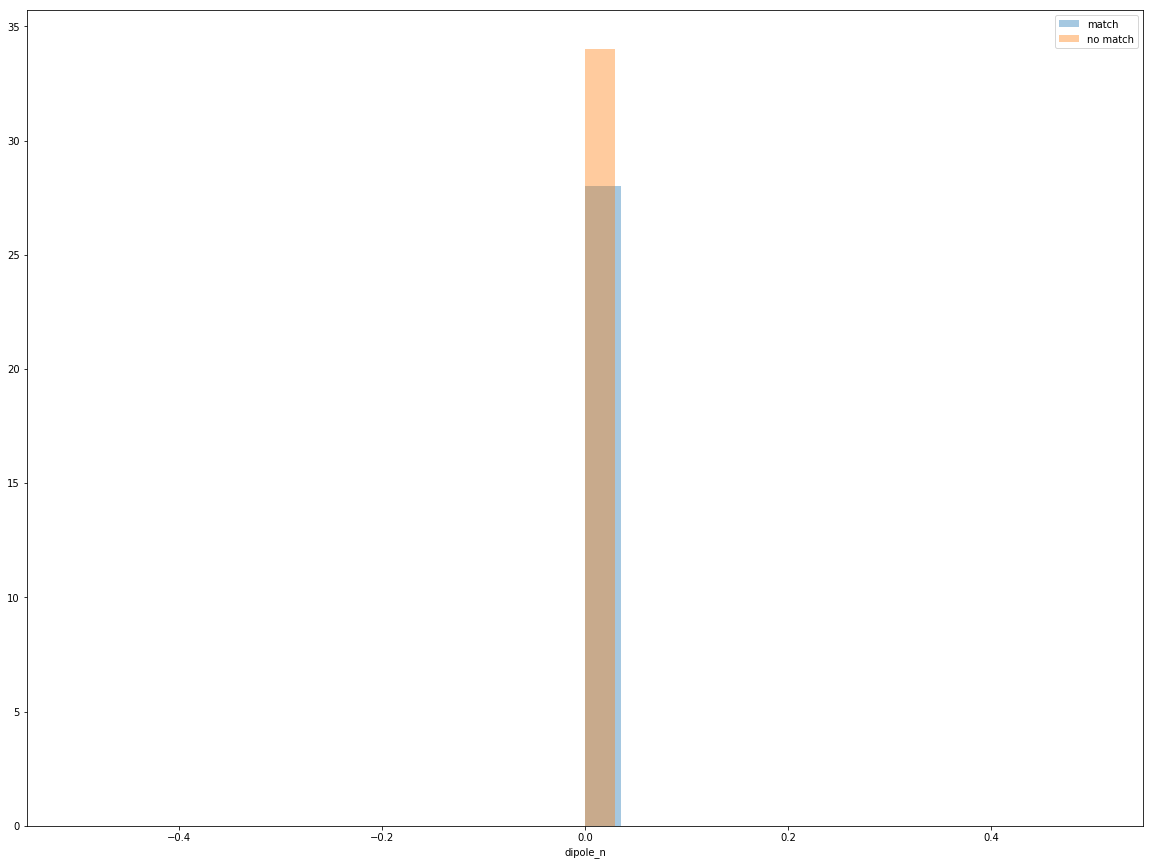




dipole_p
0.0
0.0
0.0


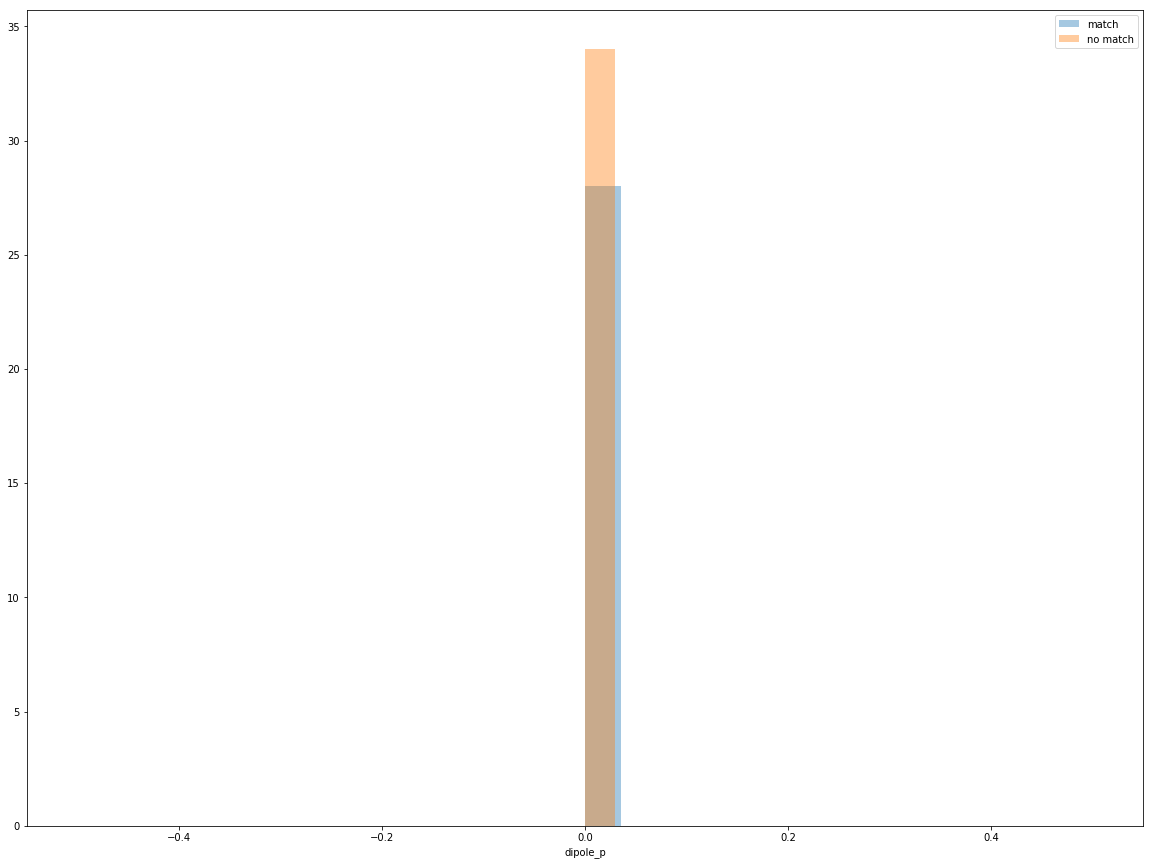




quadpole_n
212.12942999999999
212.12942999999999
202.41586


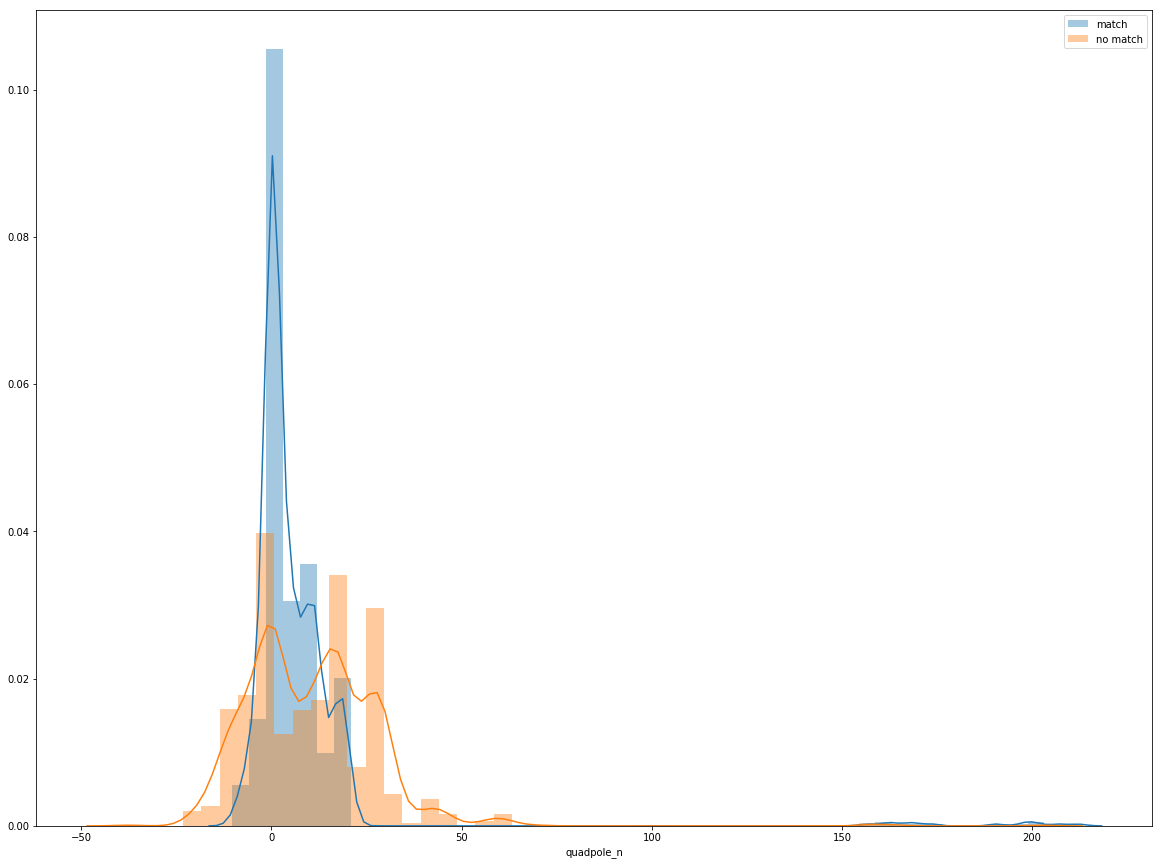




quadpole_p
190.7056
183.75263
190.7056


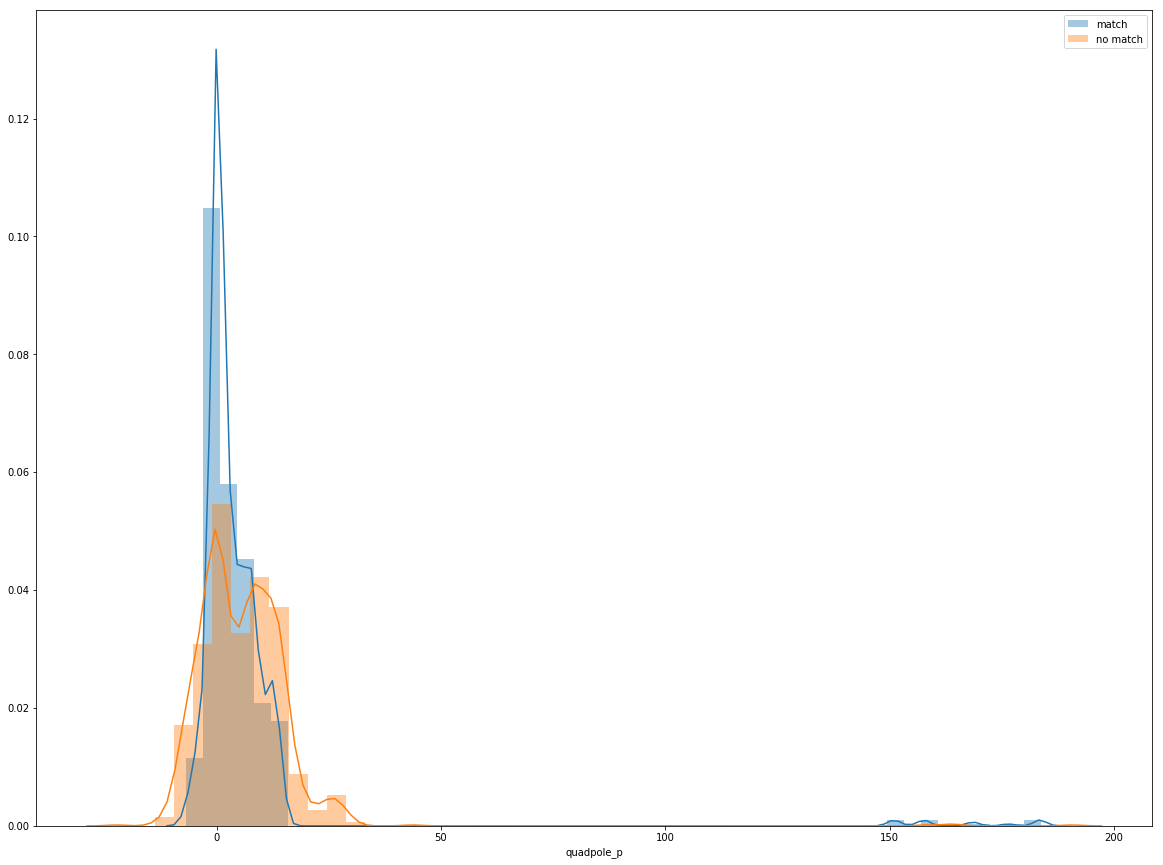




octpole_n
0.0
0.0
0.0


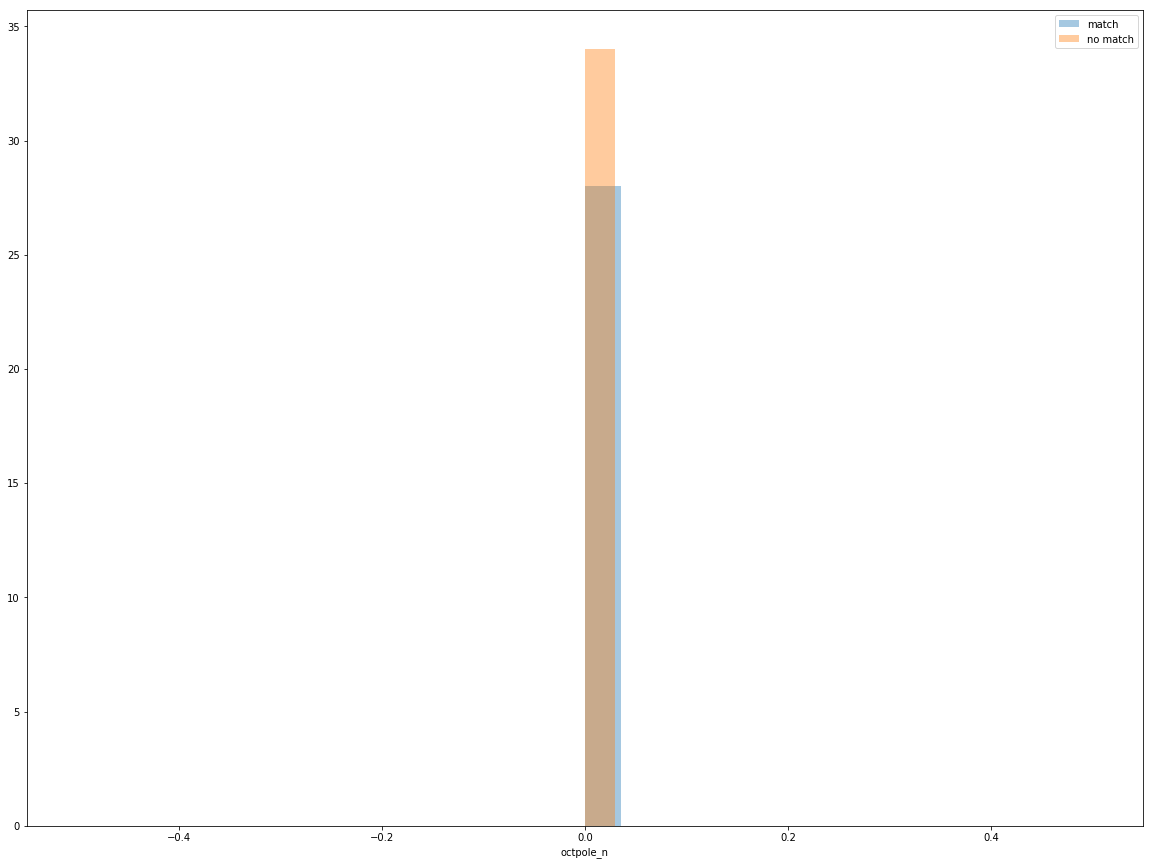




octpole_p
0.0
0.0
0.0


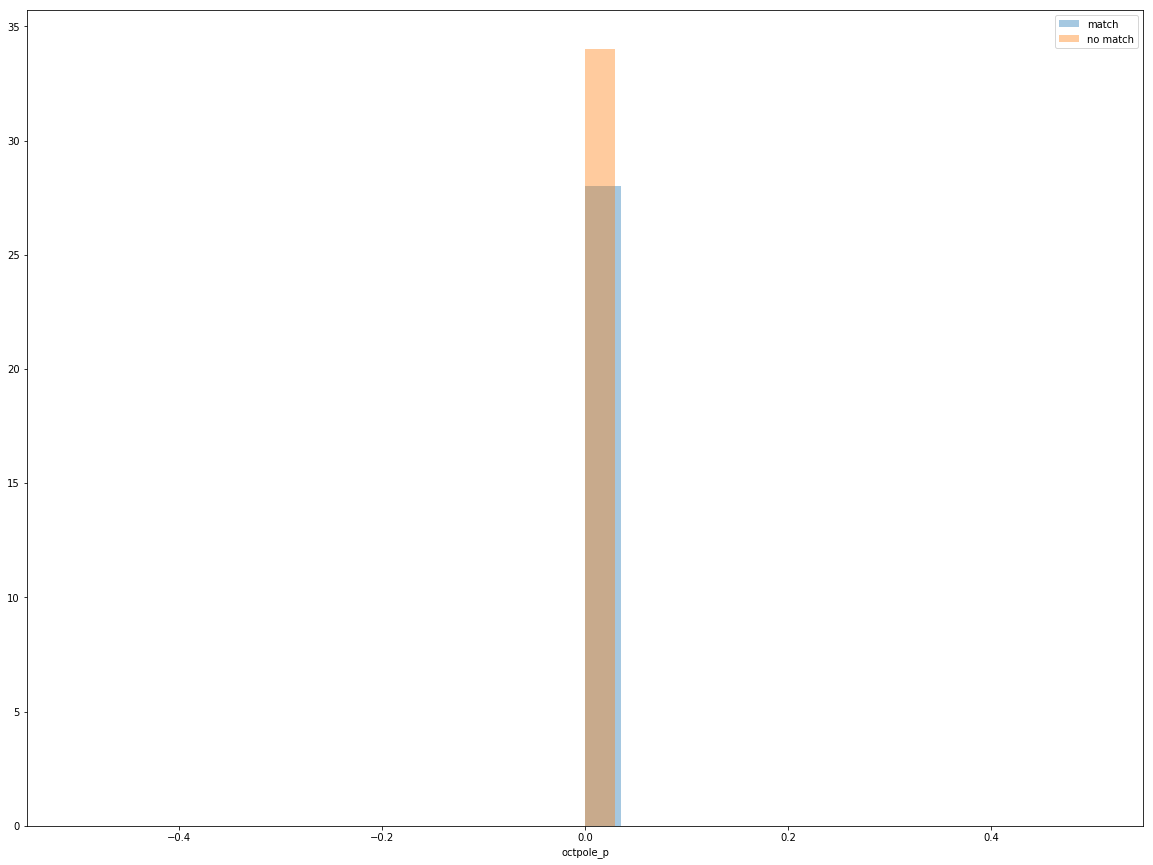




hexdpole_n
129.06413
129.06413
122.53278999999999


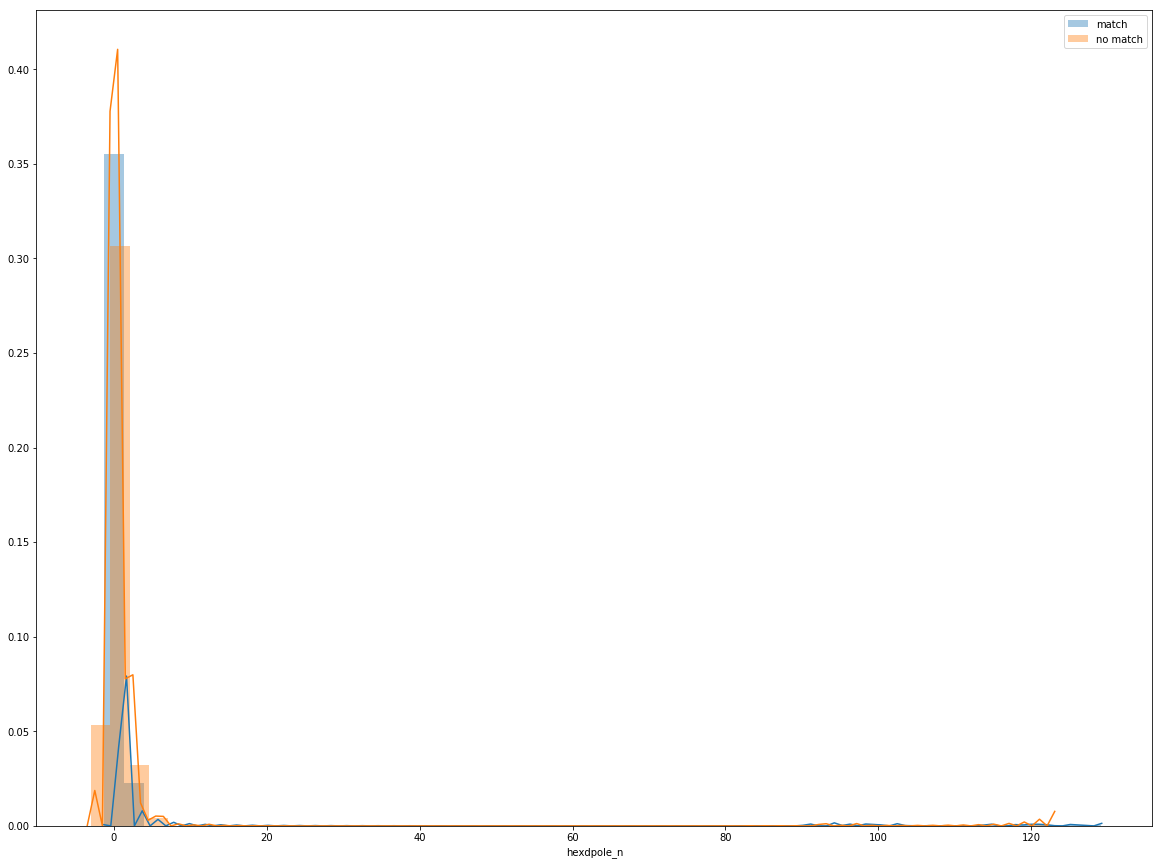




hexdpole_p
115.54361000000002
111.811
115.54361000000002


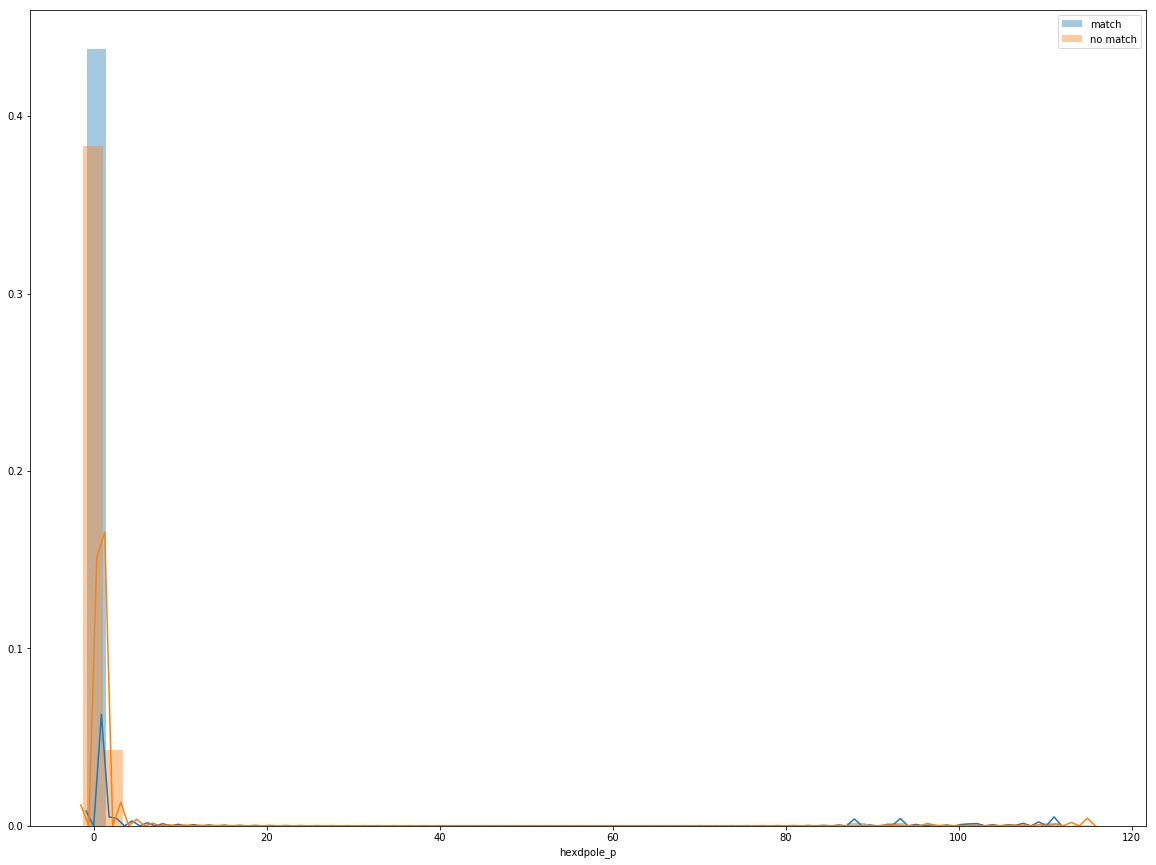




q5_n
0.0
0.0
0.0


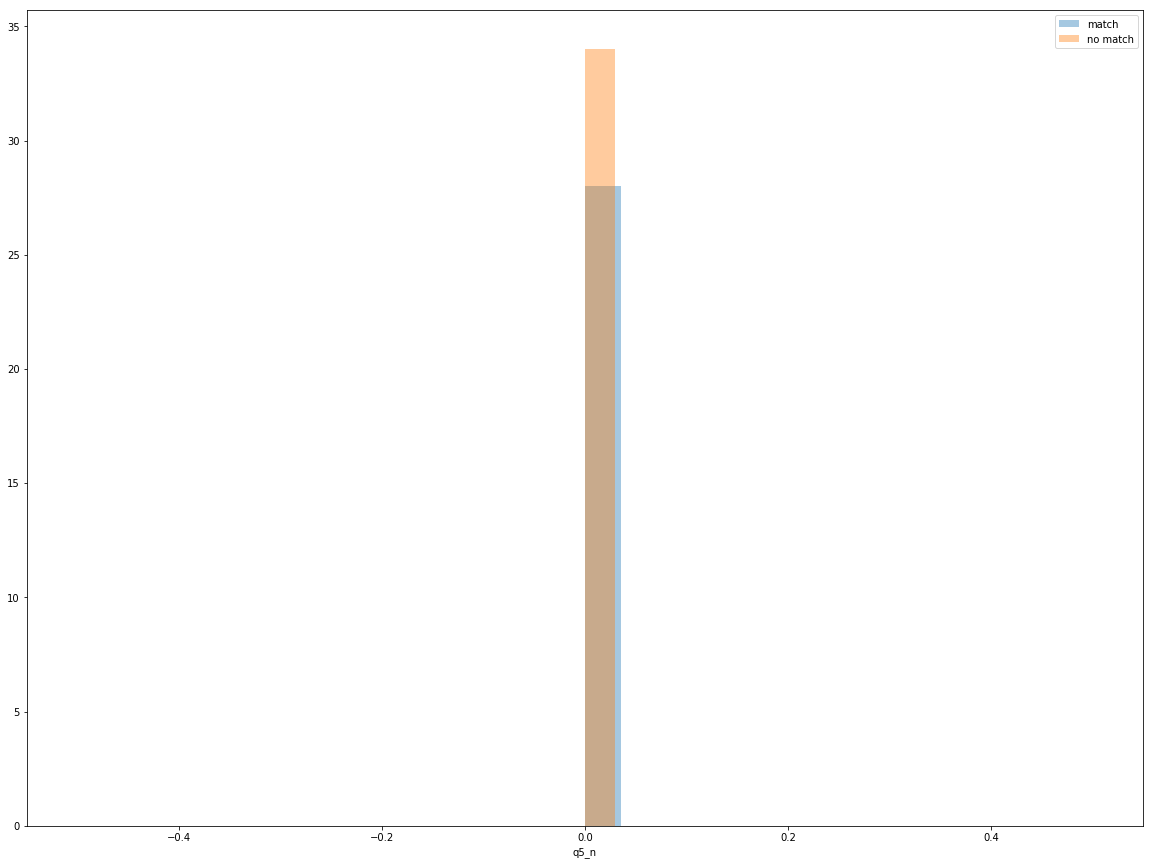




q5_p
0.0
0.0
0.0


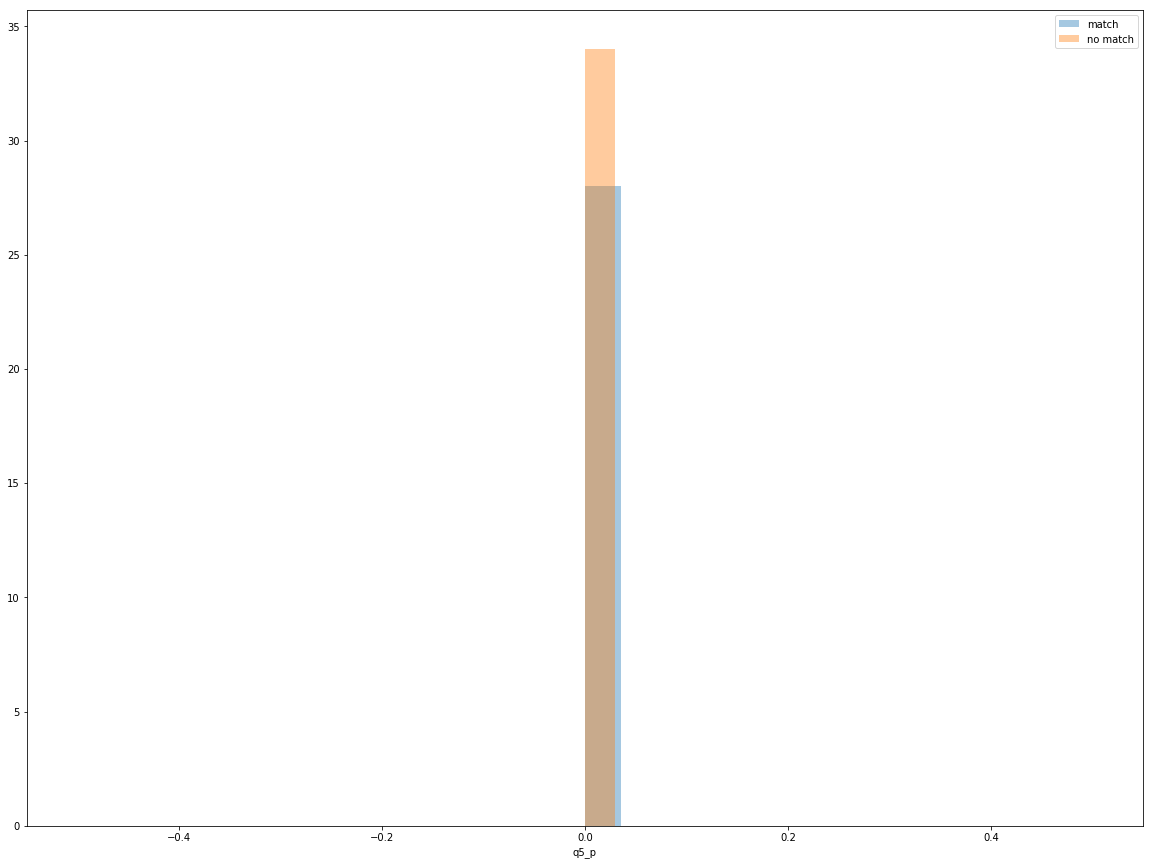




q6_n
206.33481
206.33481
191.78697


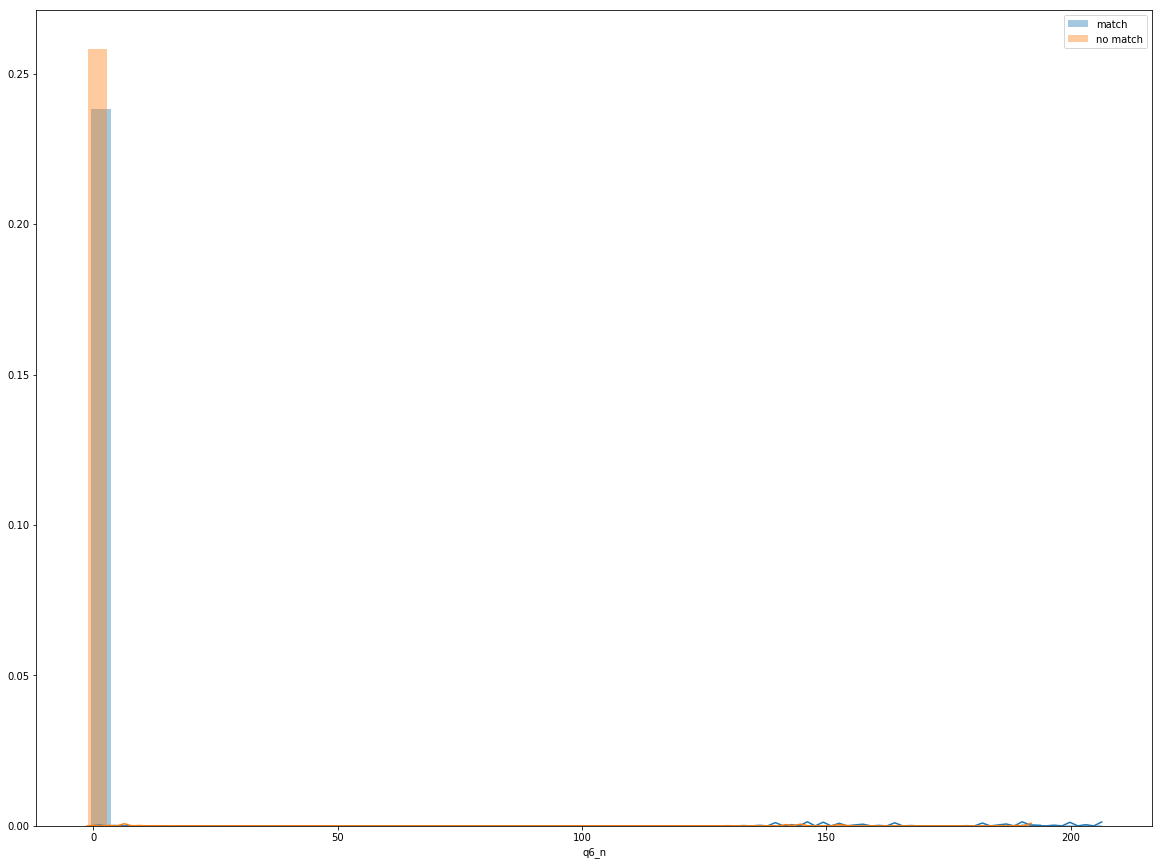




q6_p
180.54435
178.736
180.54435


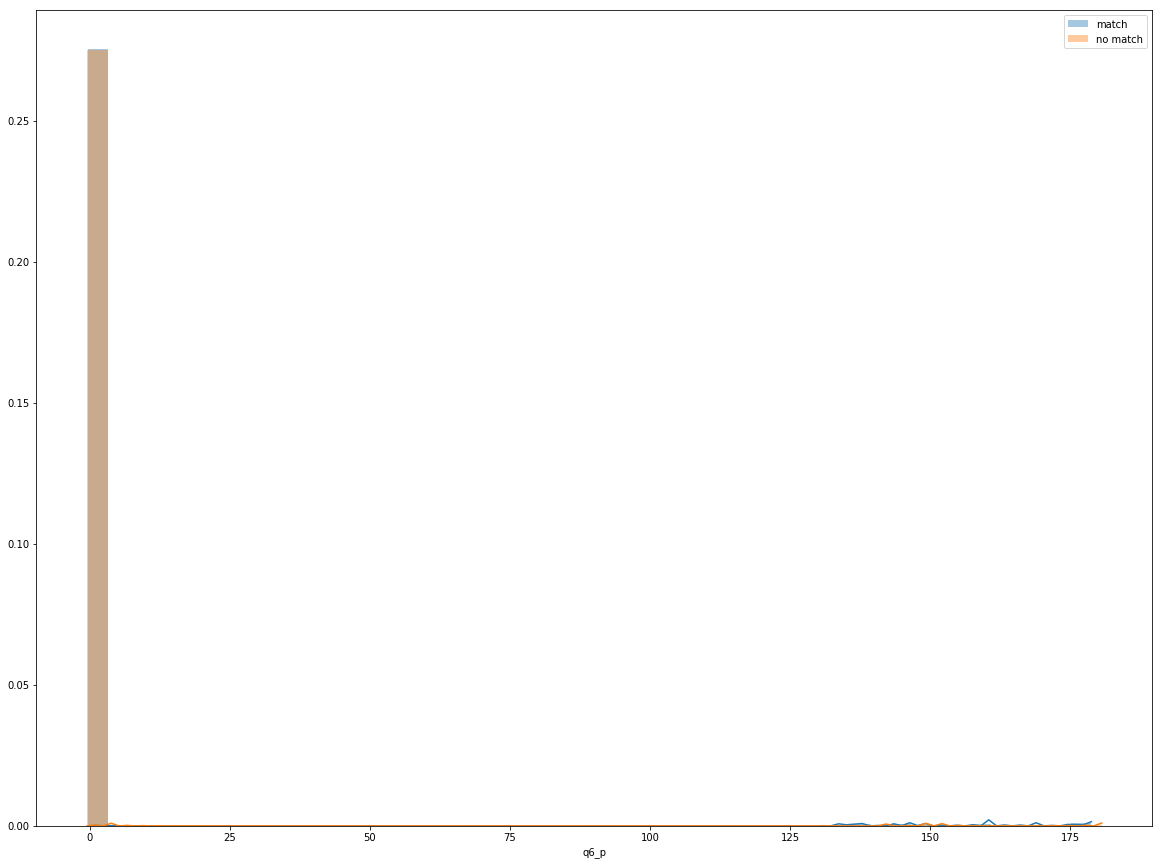




q7_n
0.0
0.0
0.0


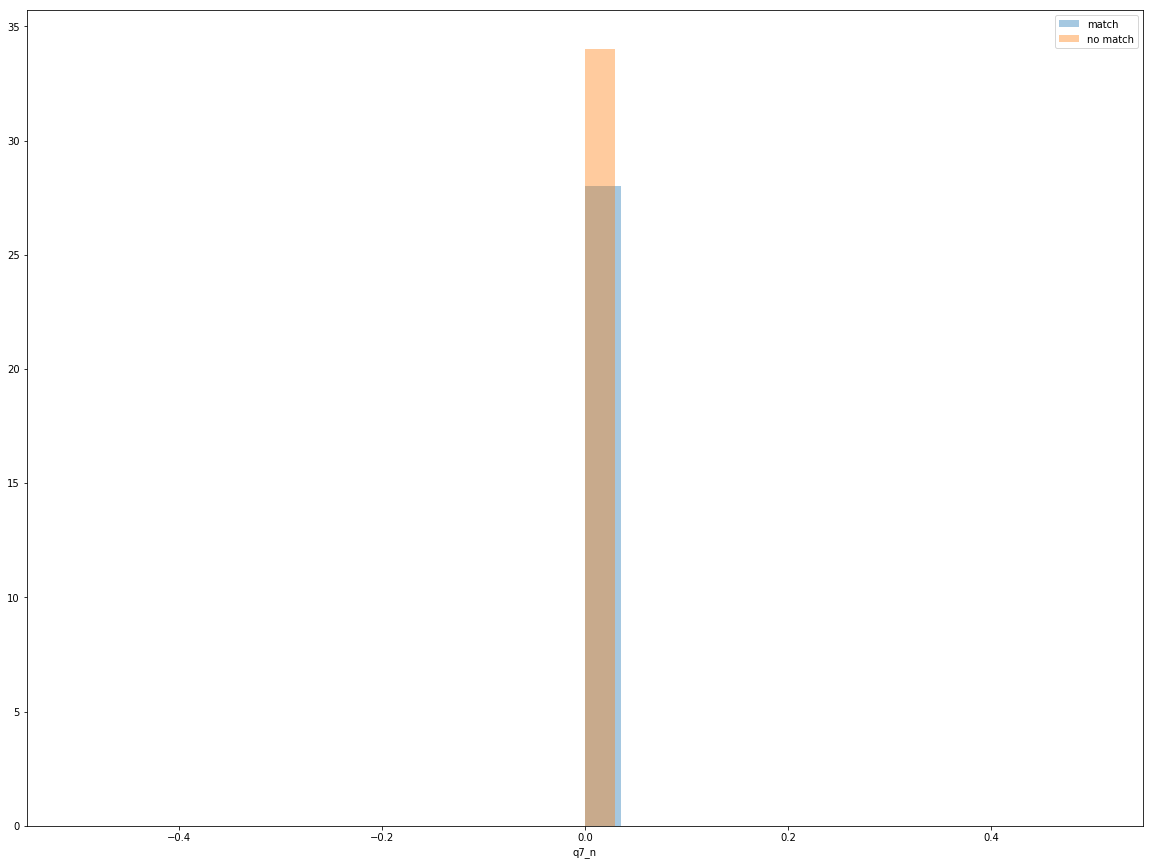




q7_p
0.0
0.0
0.0


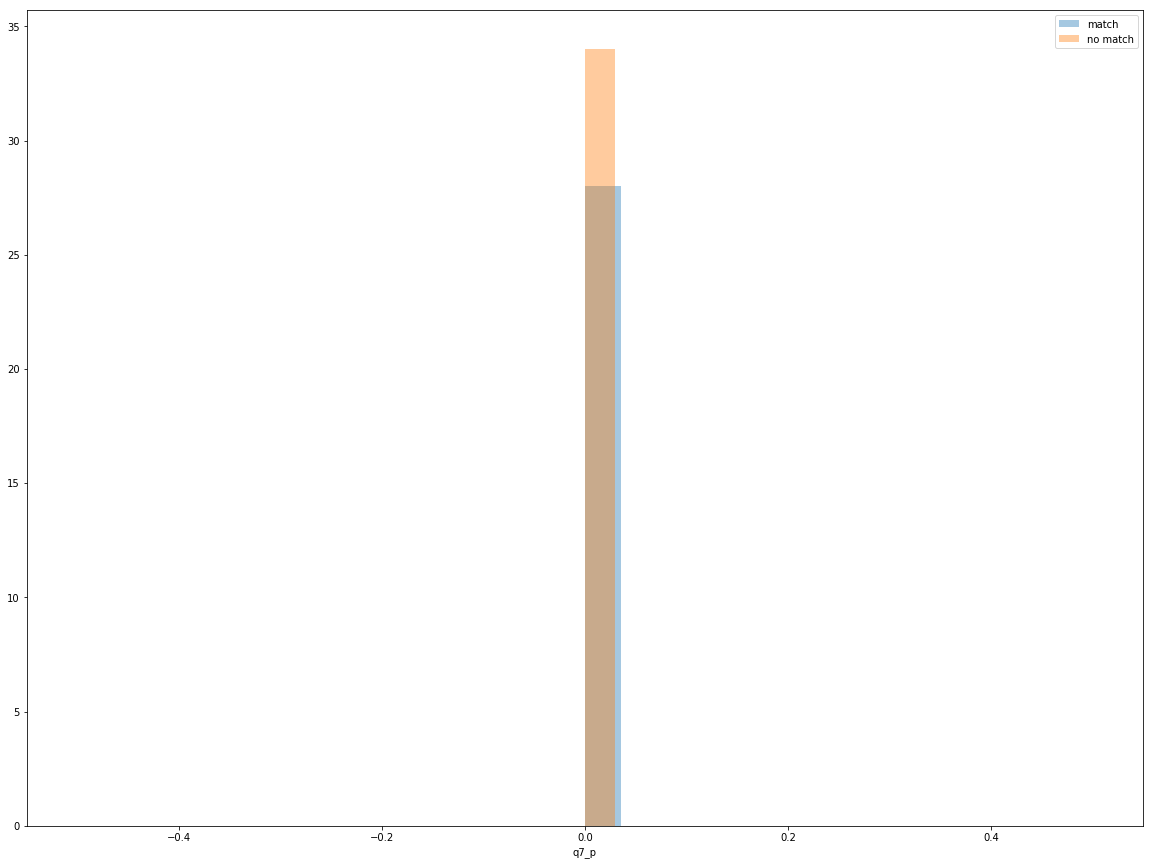




q8_n
304.03366
304.03366
269.60667


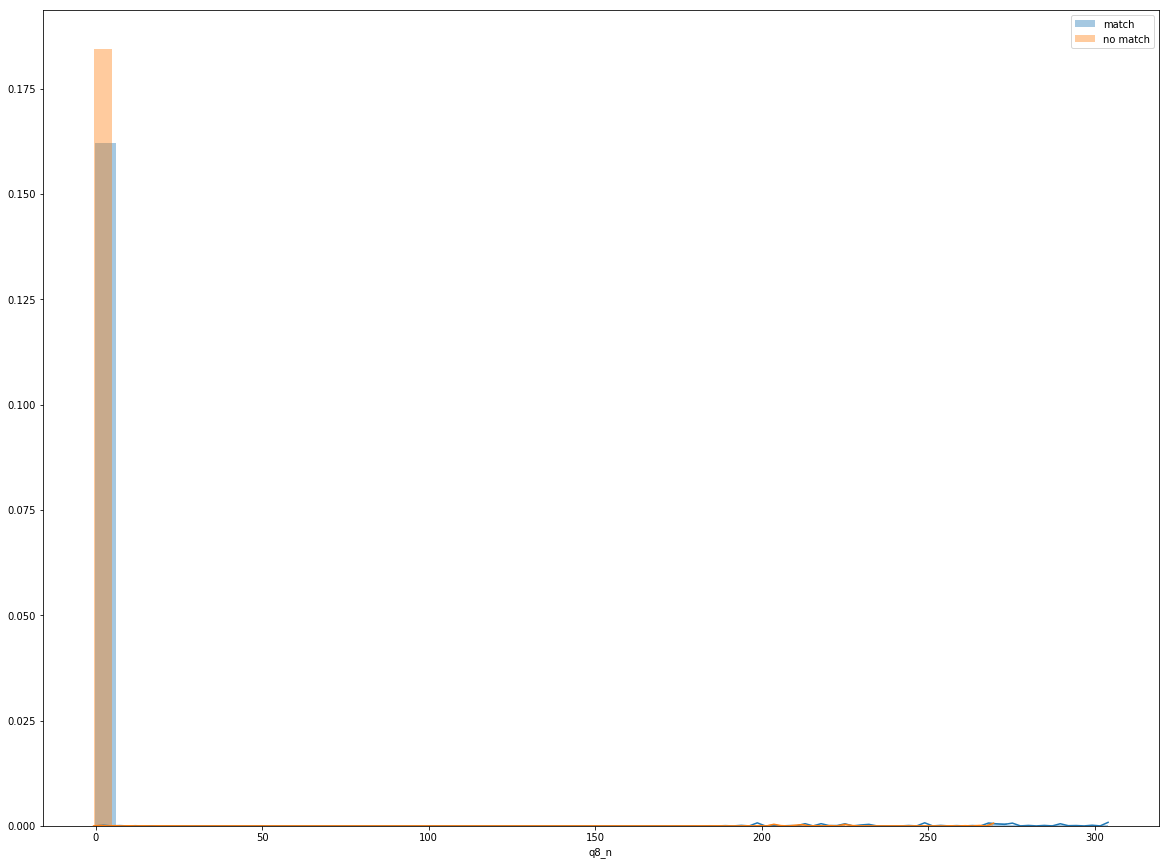




q8_p
263.43111
263.43111
253.44317999999998


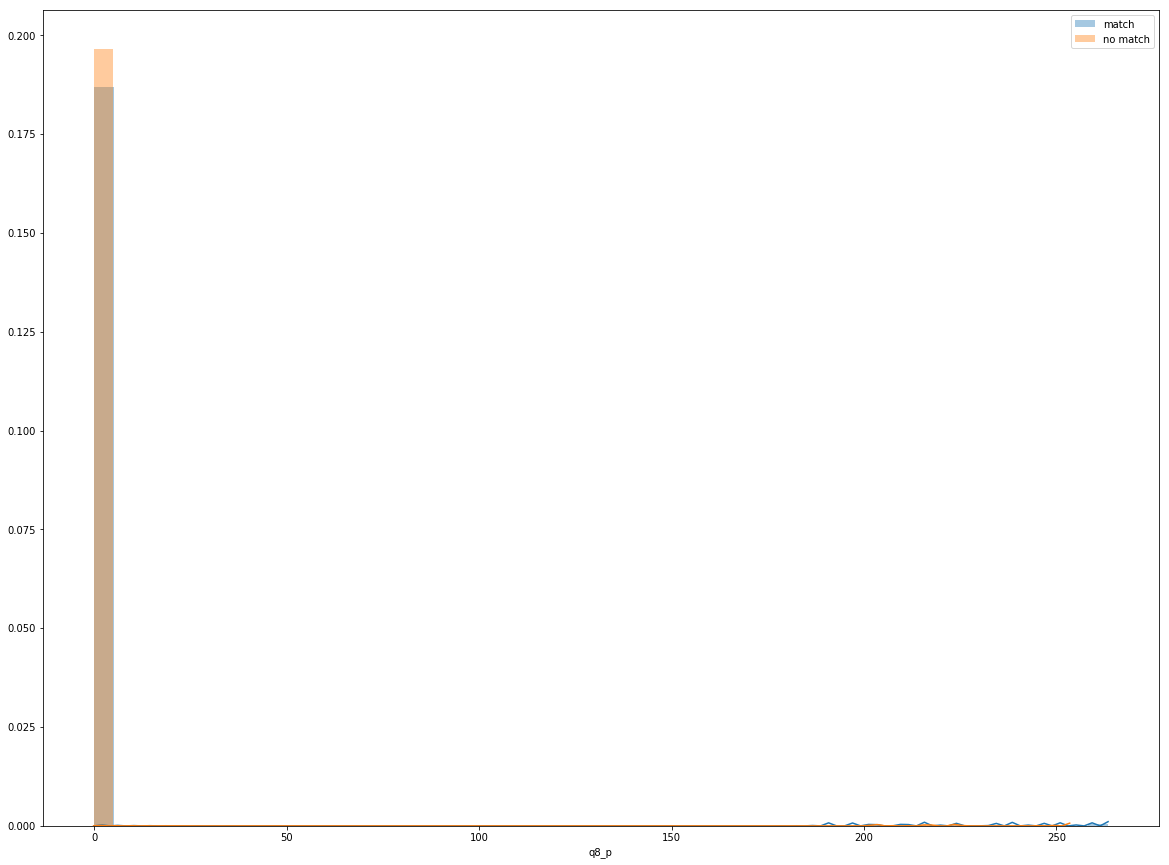




KineticE_n
5372.7333
3582.8589
5372.7333


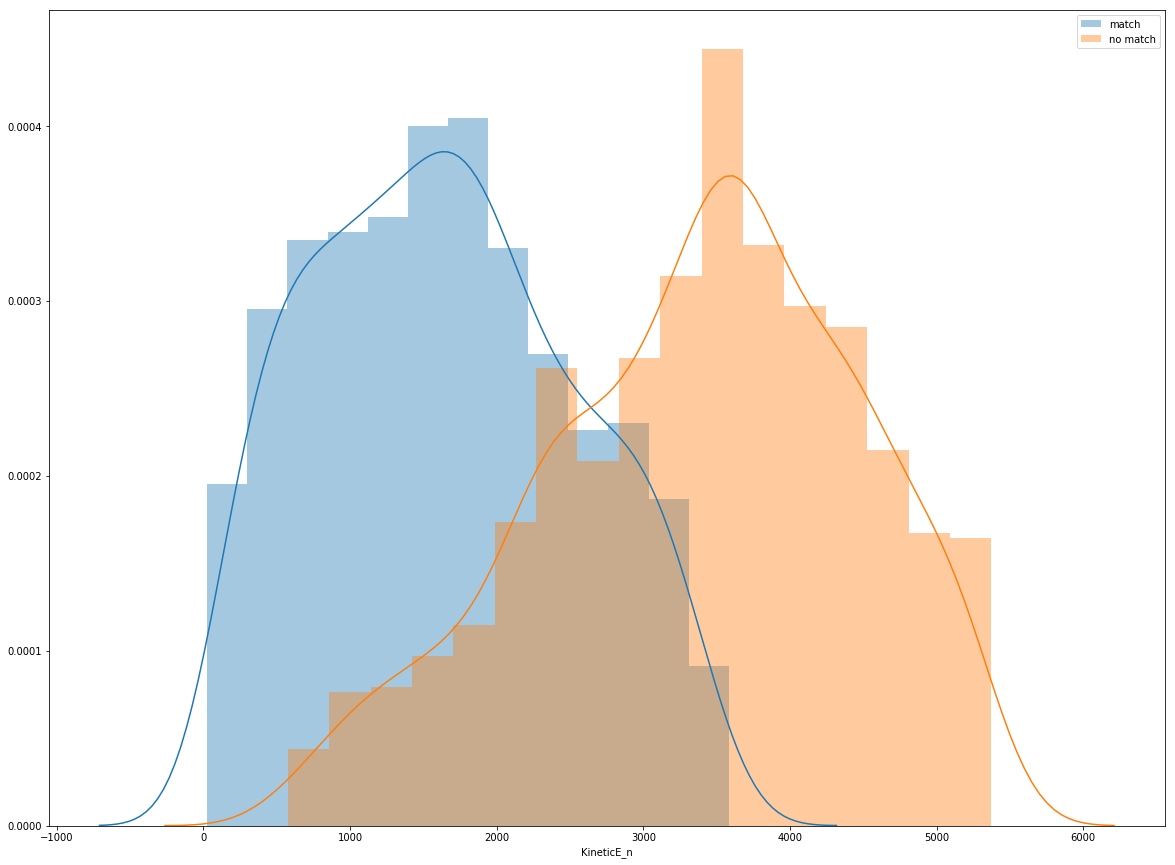




KineticE_p
2014.7673
1958.9865
2014.7673


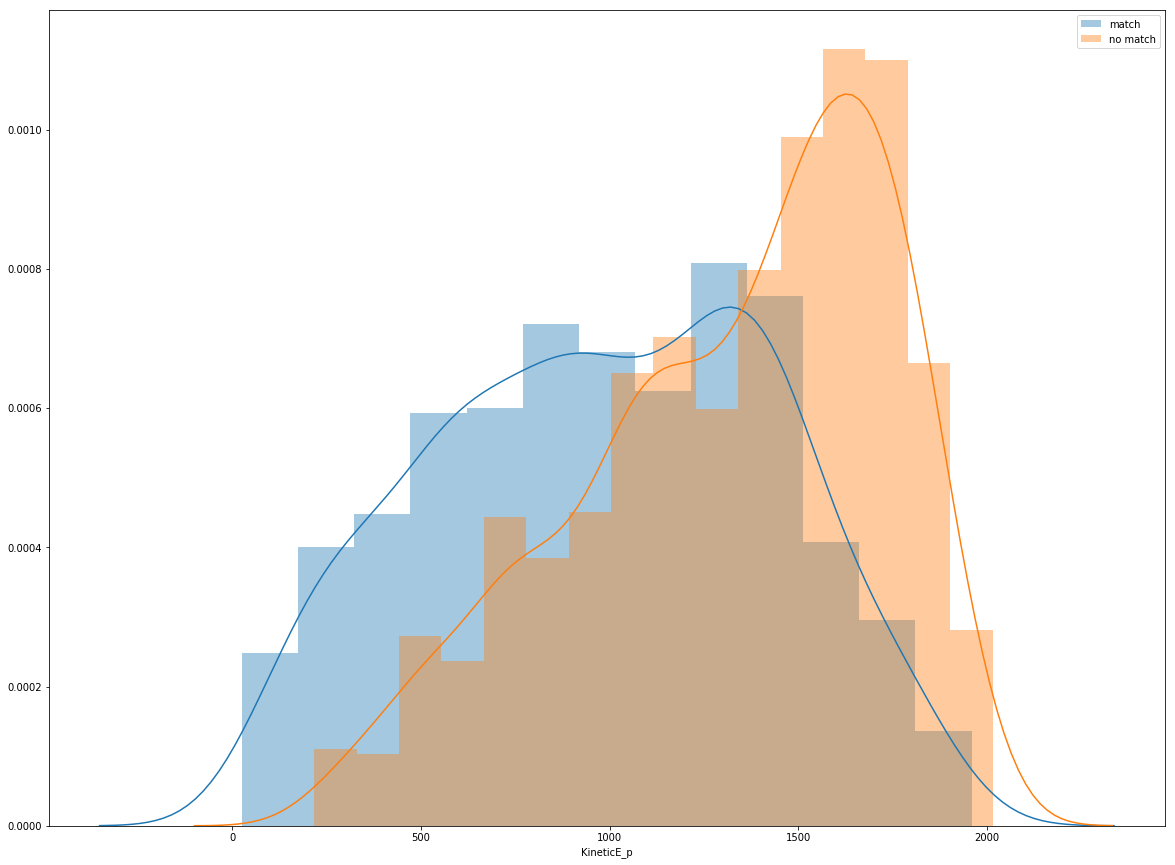




VolumeE
-67.4005
-67.4005
-1176.0766


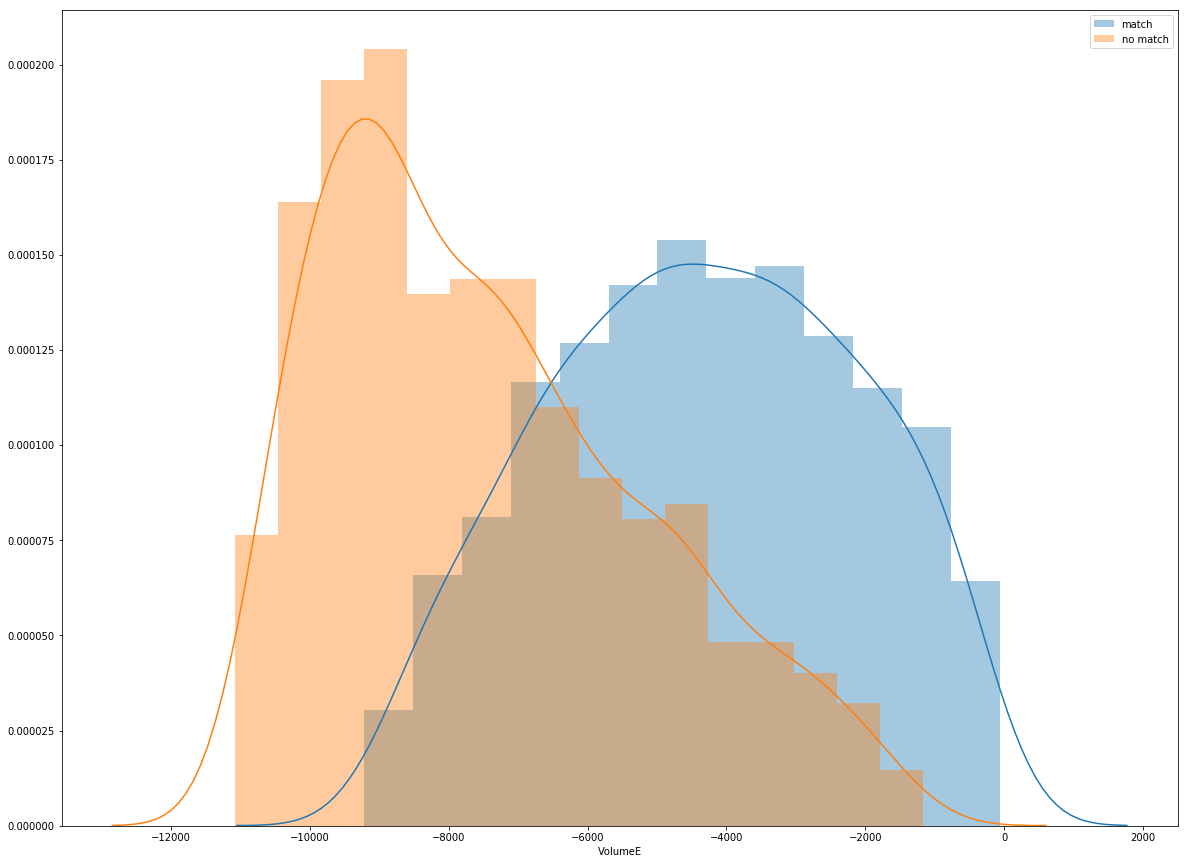




rho_tau
414.3047
399.7346
414.3047


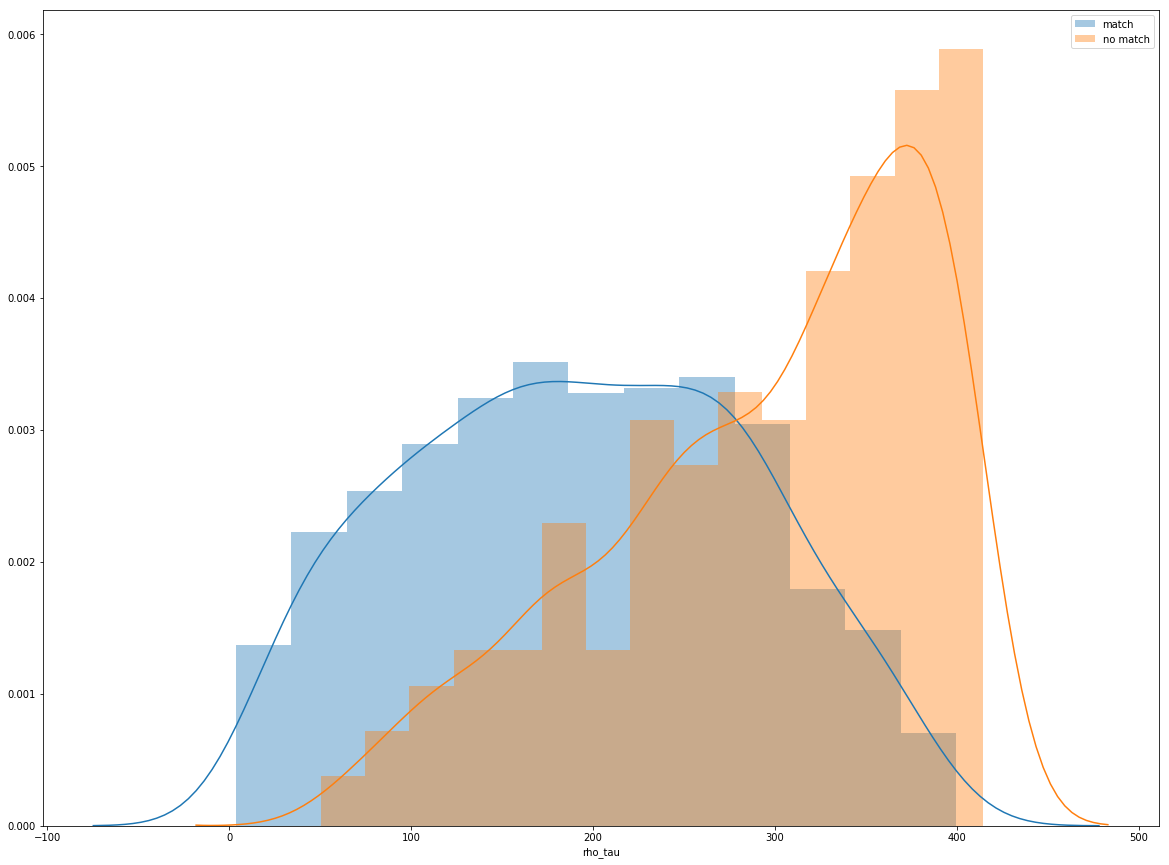




rho_rho
-71.154
-71.154
-1226.6761


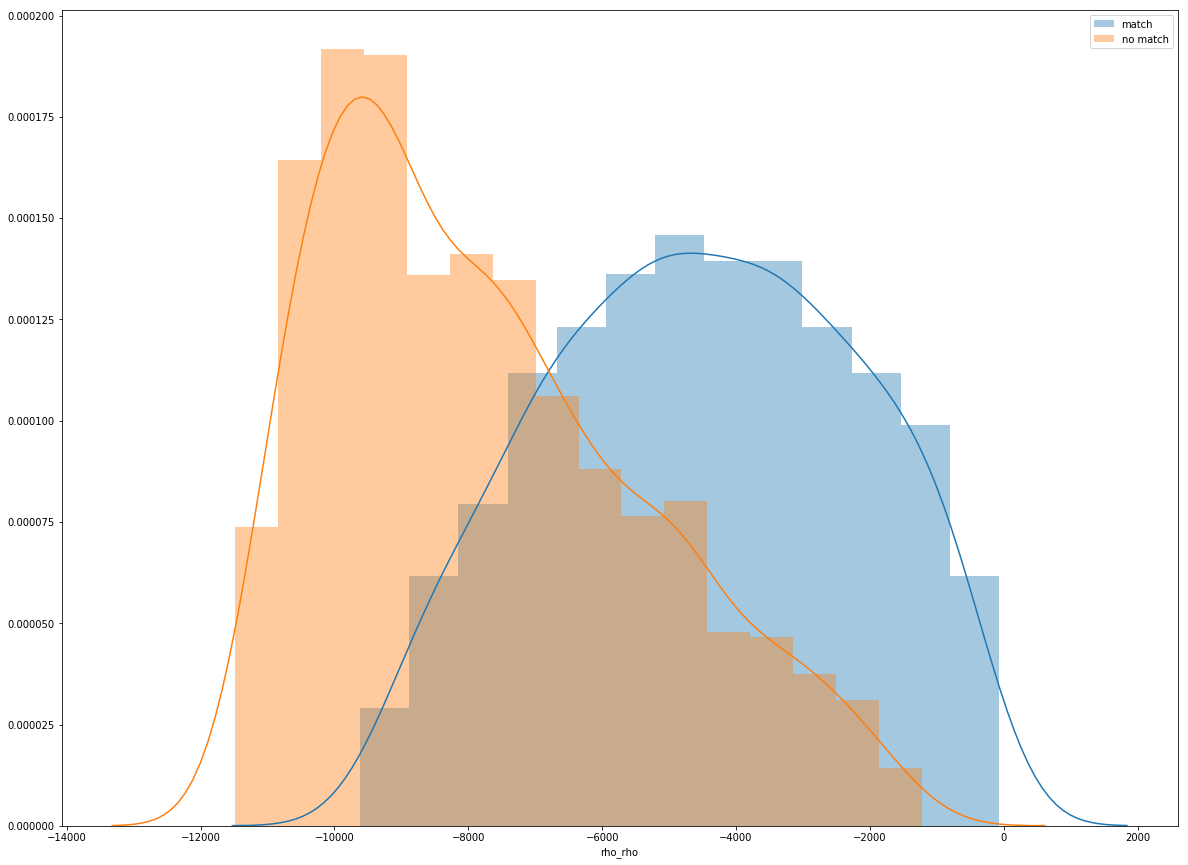




surfaceE
269.5785
245.9289
269.5785


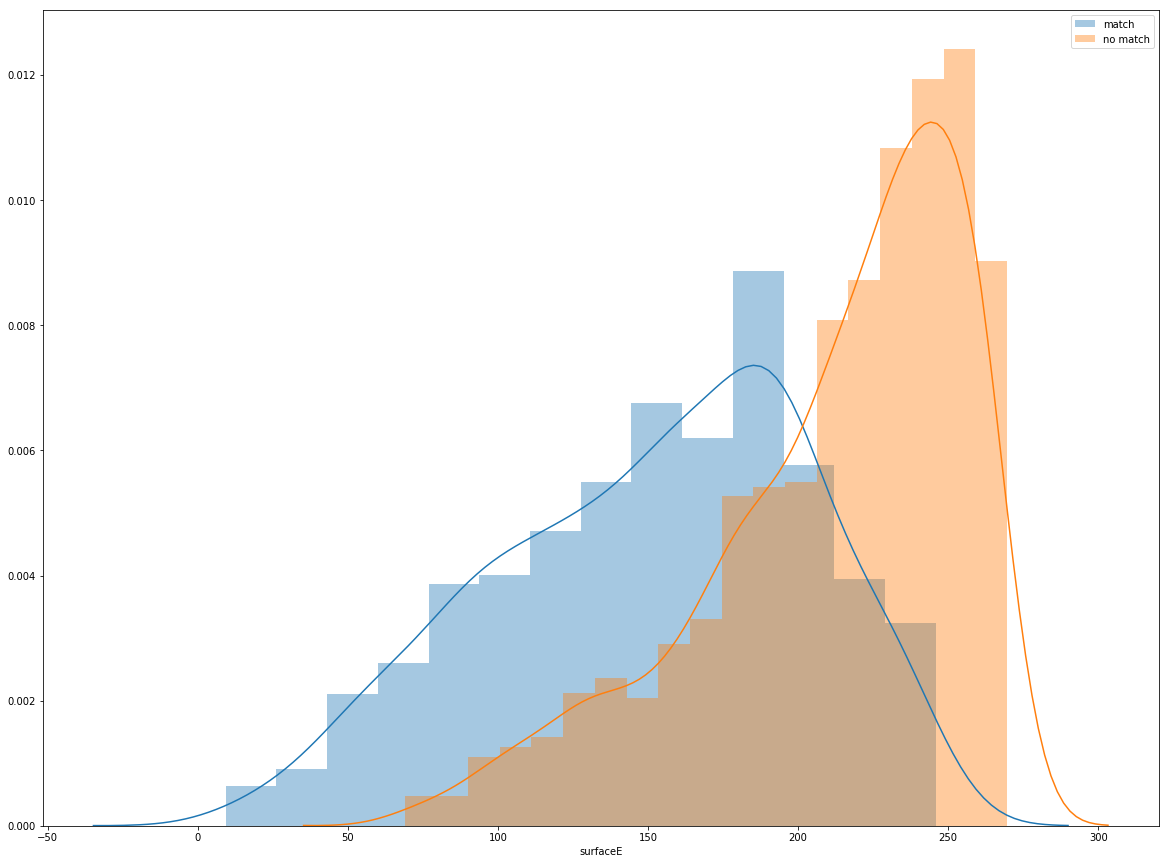




rhoDELrho
269.5785
245.9289
269.5785


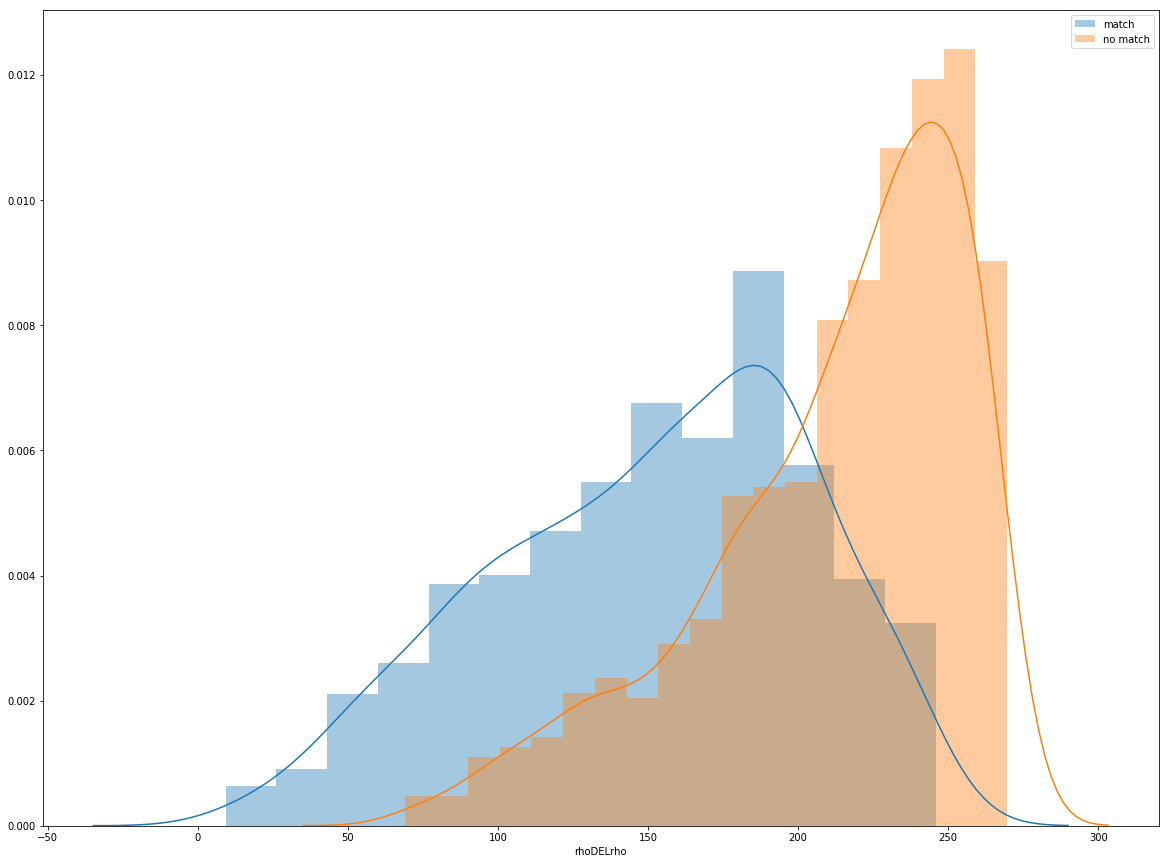




NABLArho^2
0.0
0.0
0.0


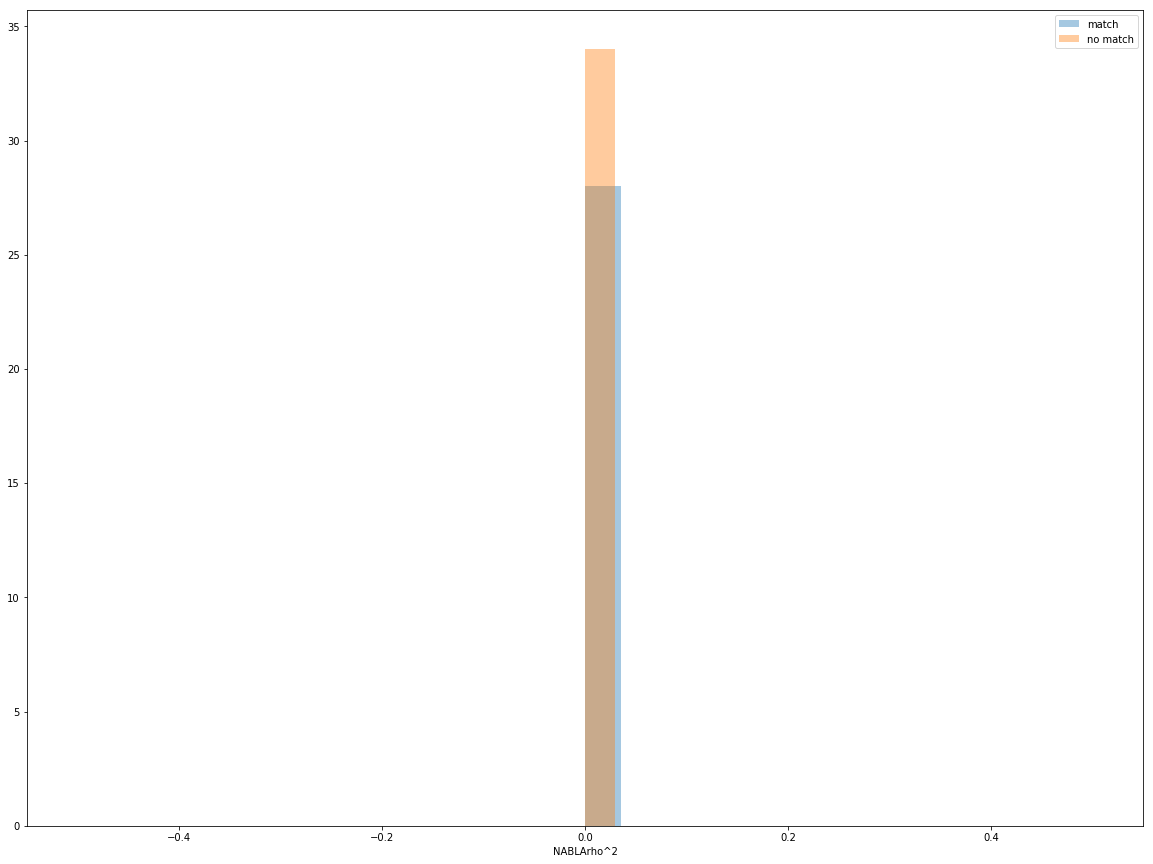




SpinOrbitE
-0.5929
-0.5929
-7.8629


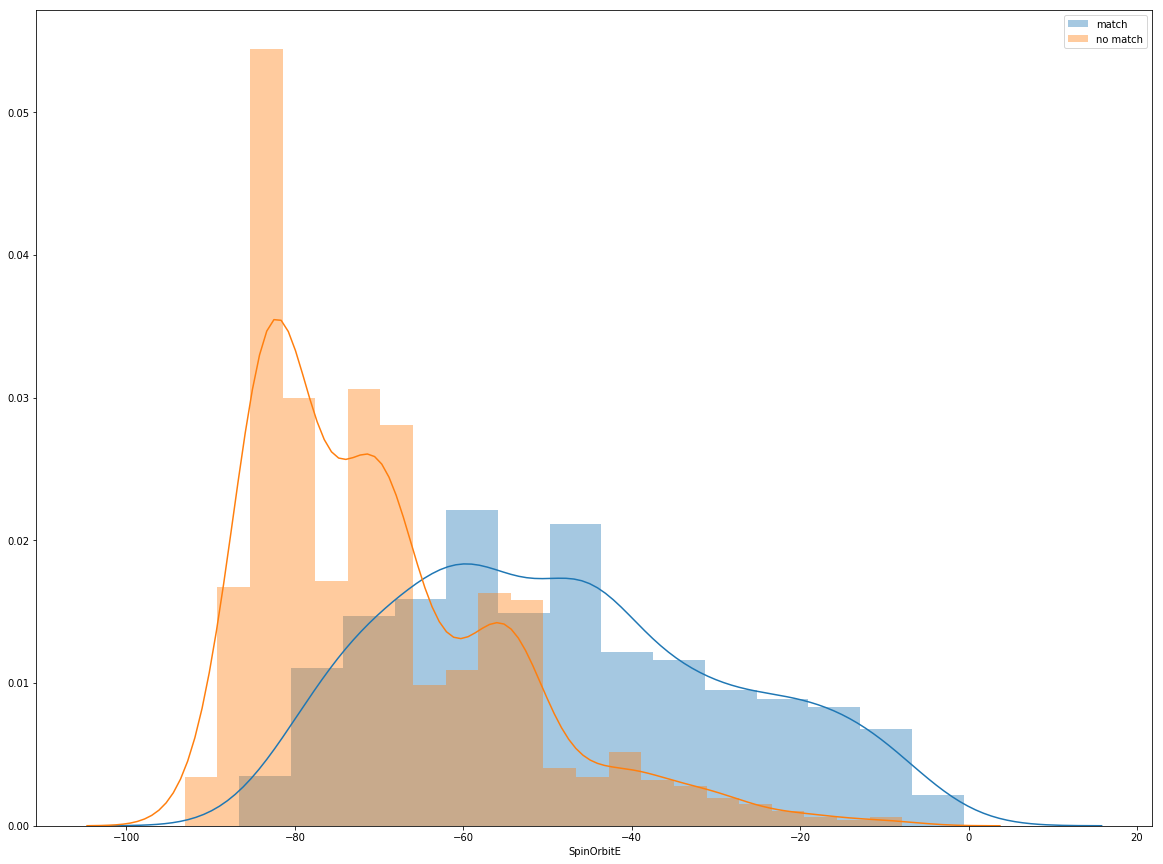




rhoNABLAJ
-0.5929
-0.5929
-7.8629


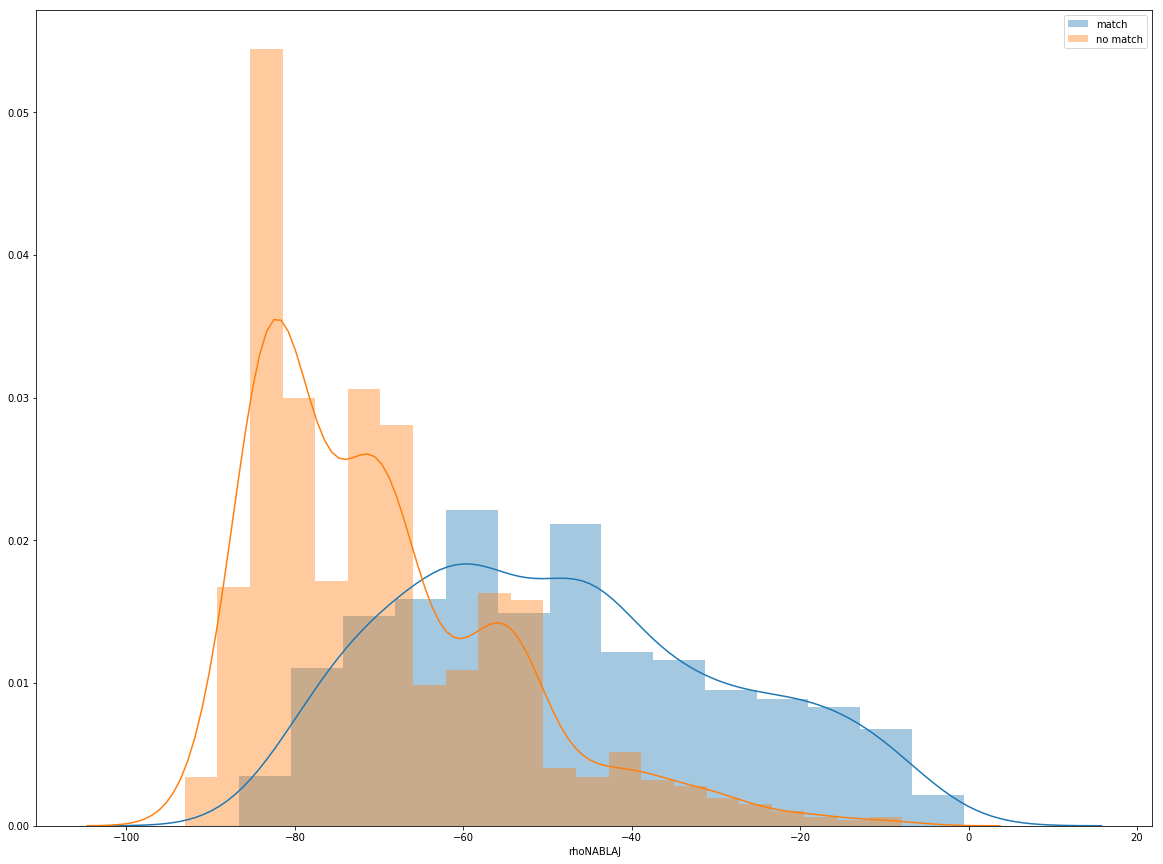




NABLArhoJ
0.0
0.0
0.0


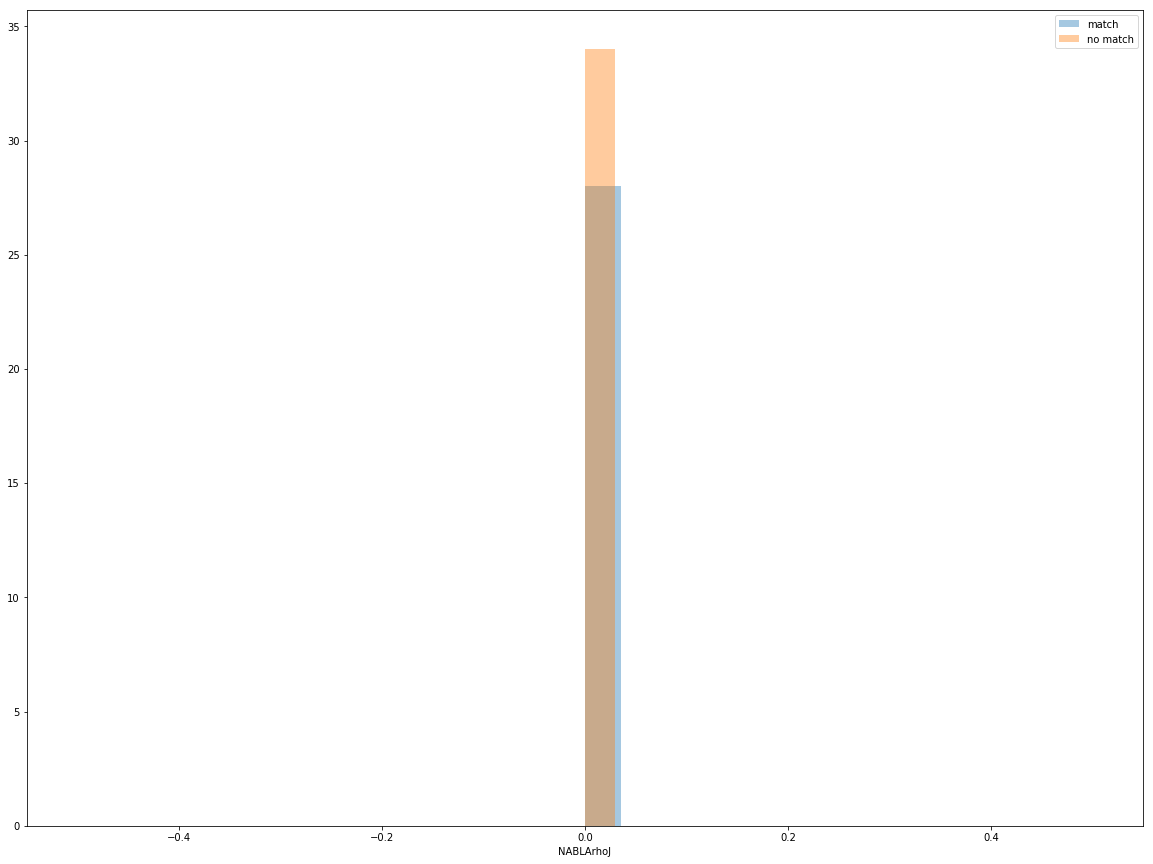




CoulombE
1513.2108
1462.0591
1513.2108


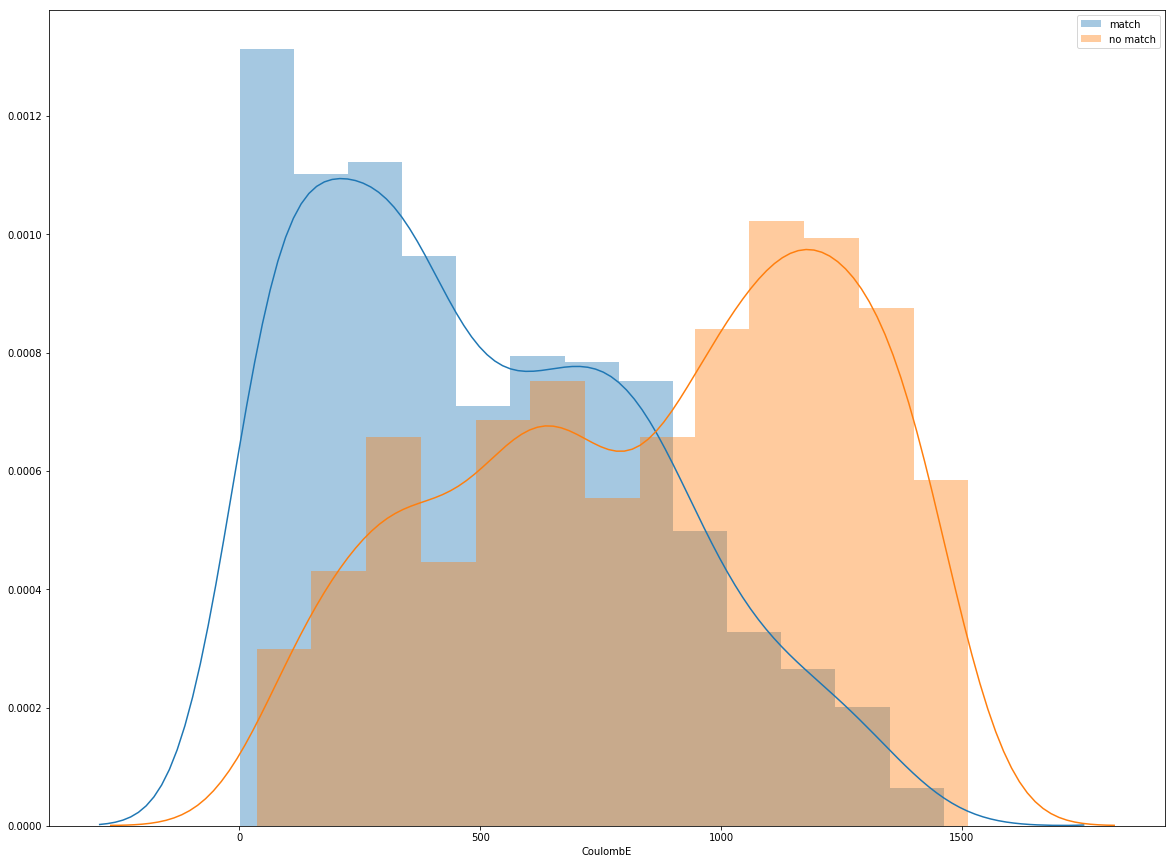




CoulombDir
1559.6778
1507.4336
1559.6778


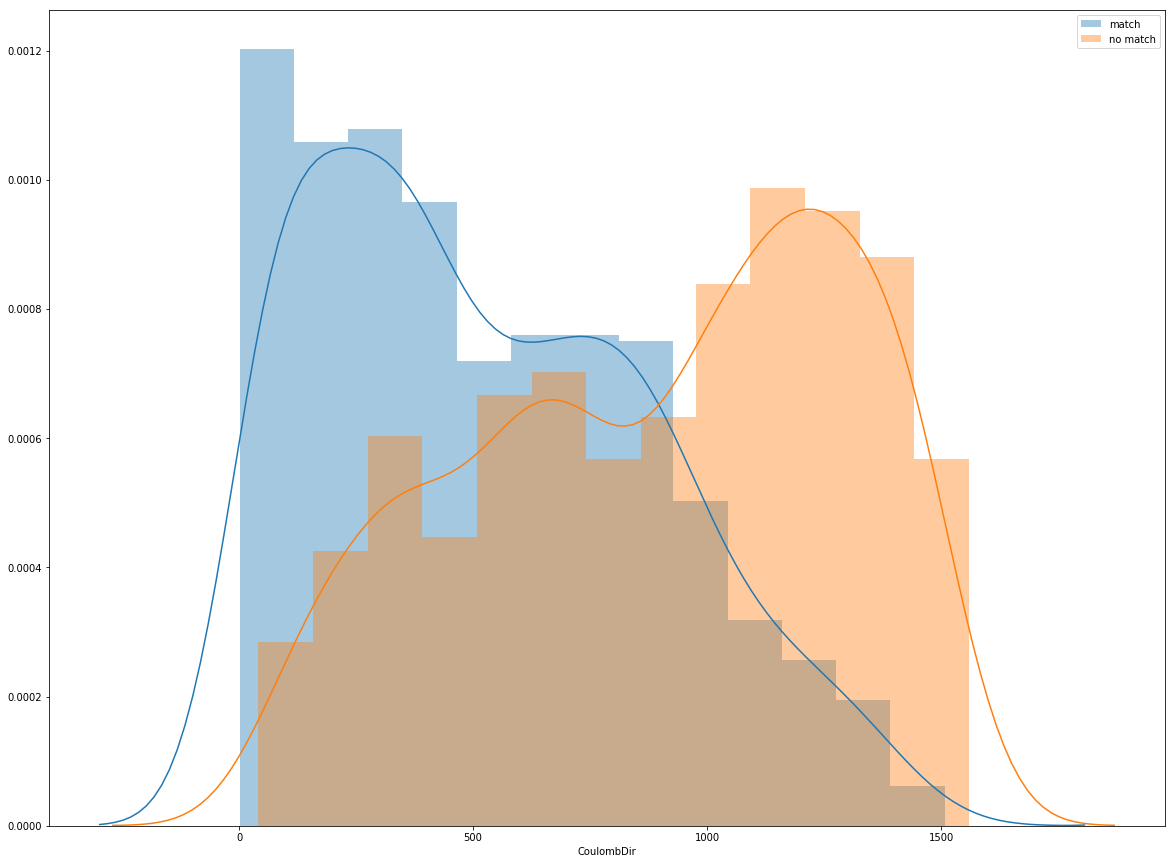




CoulombEx
-0.5662
-0.5662
-4.9056


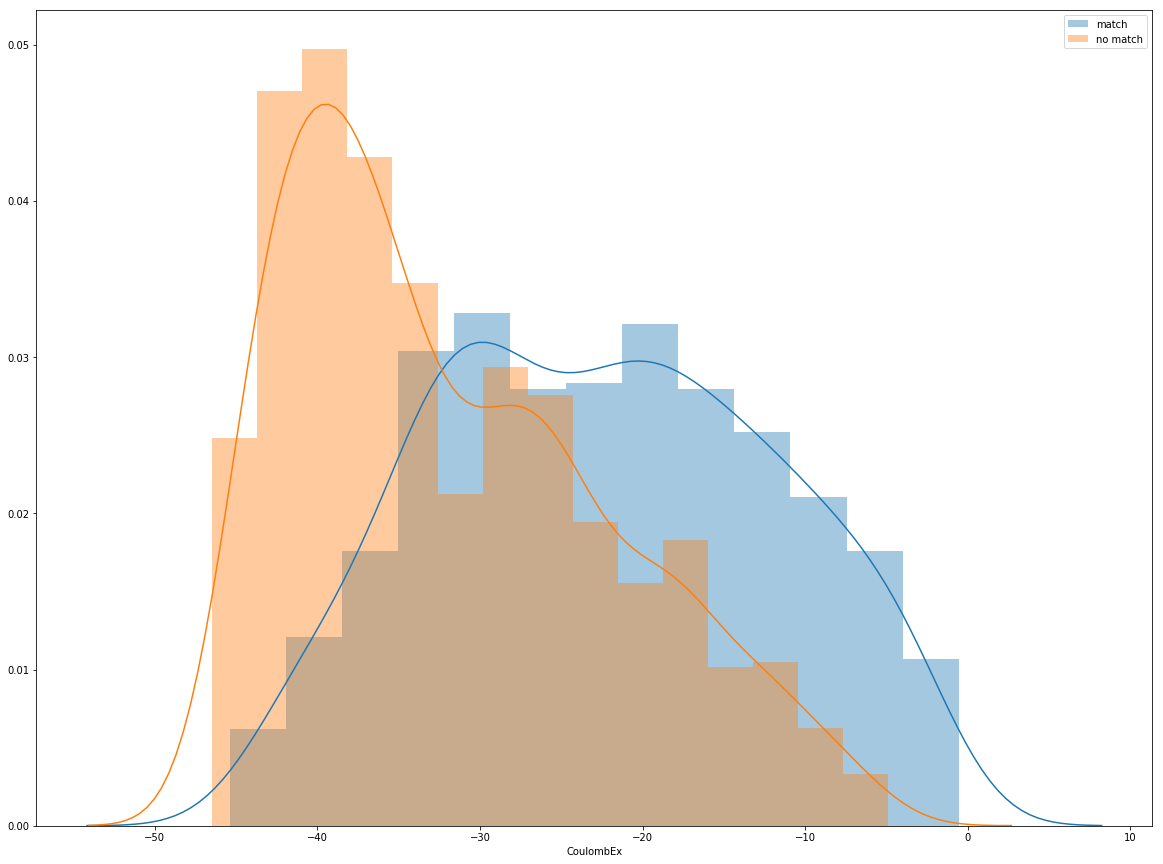




TensorE
0.0018
0.0018
-0.3858


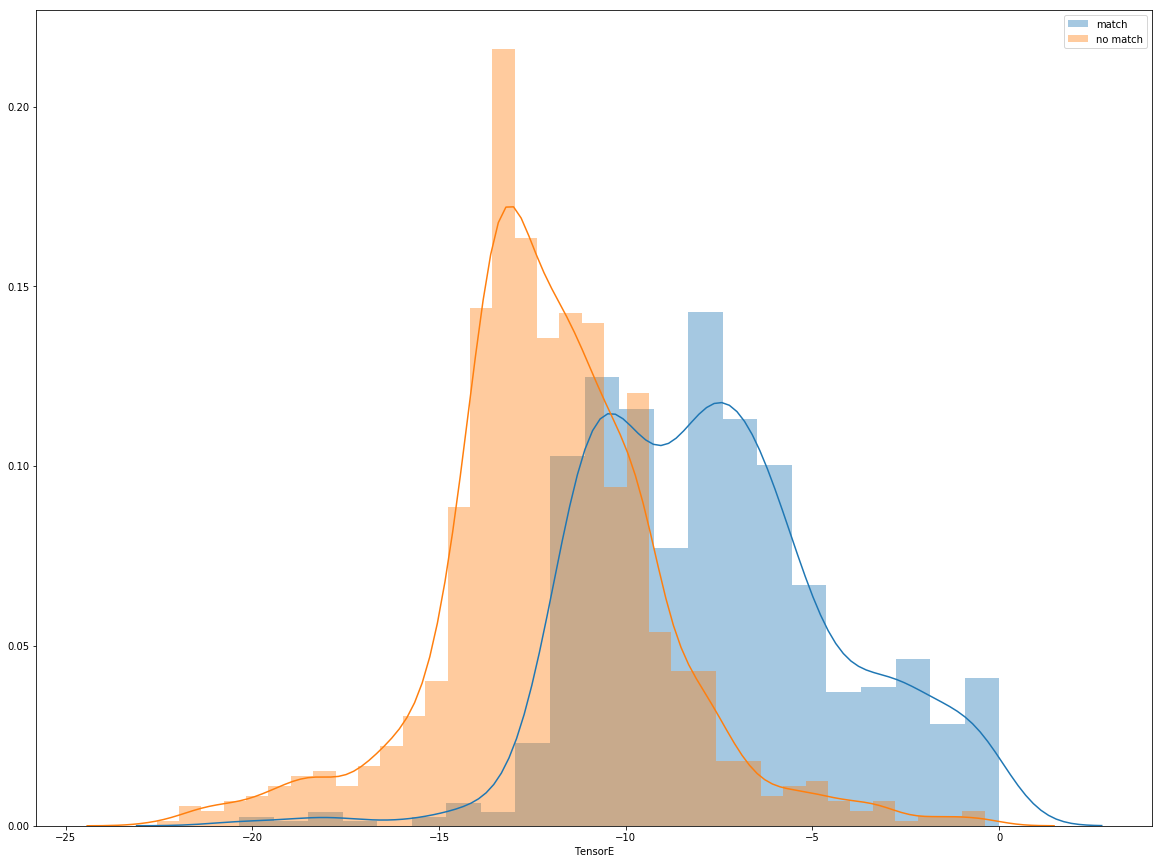




HartreeE
0.0
0.0
0.0


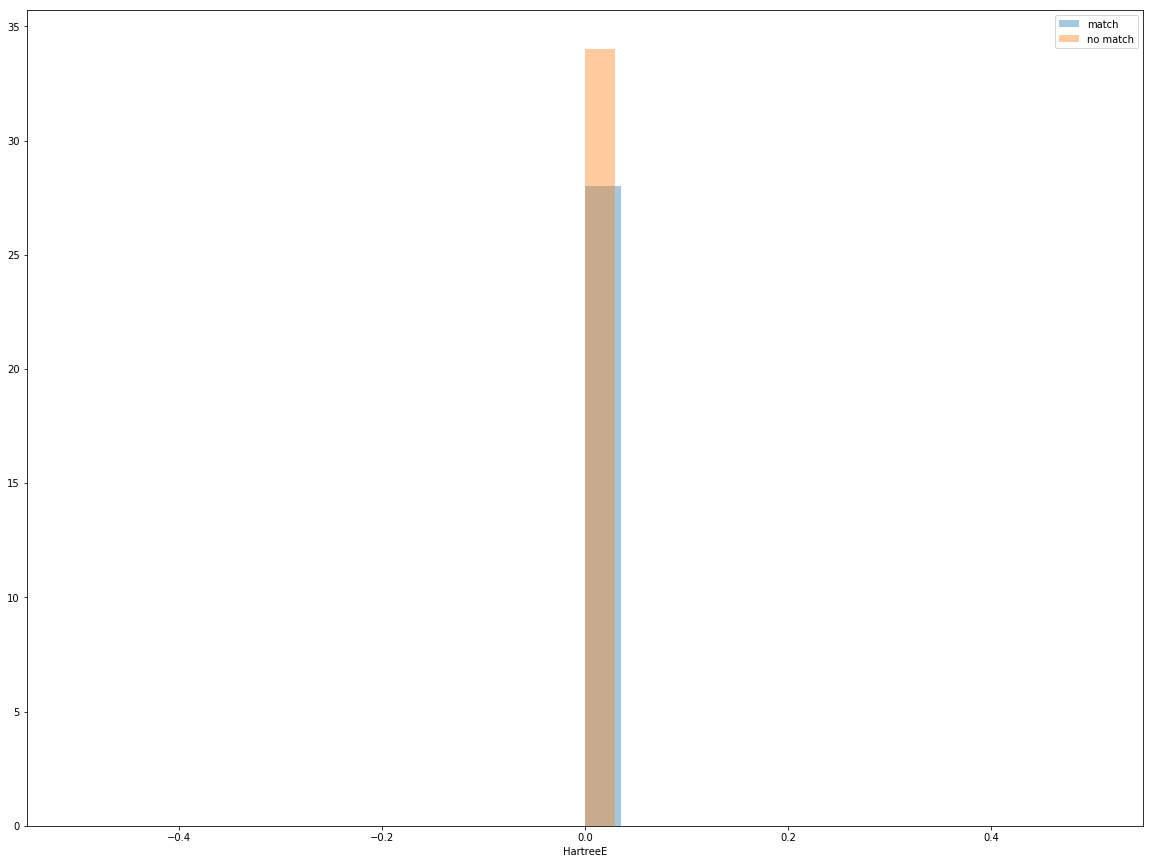




ExtraE
0.0
0.0
0.0


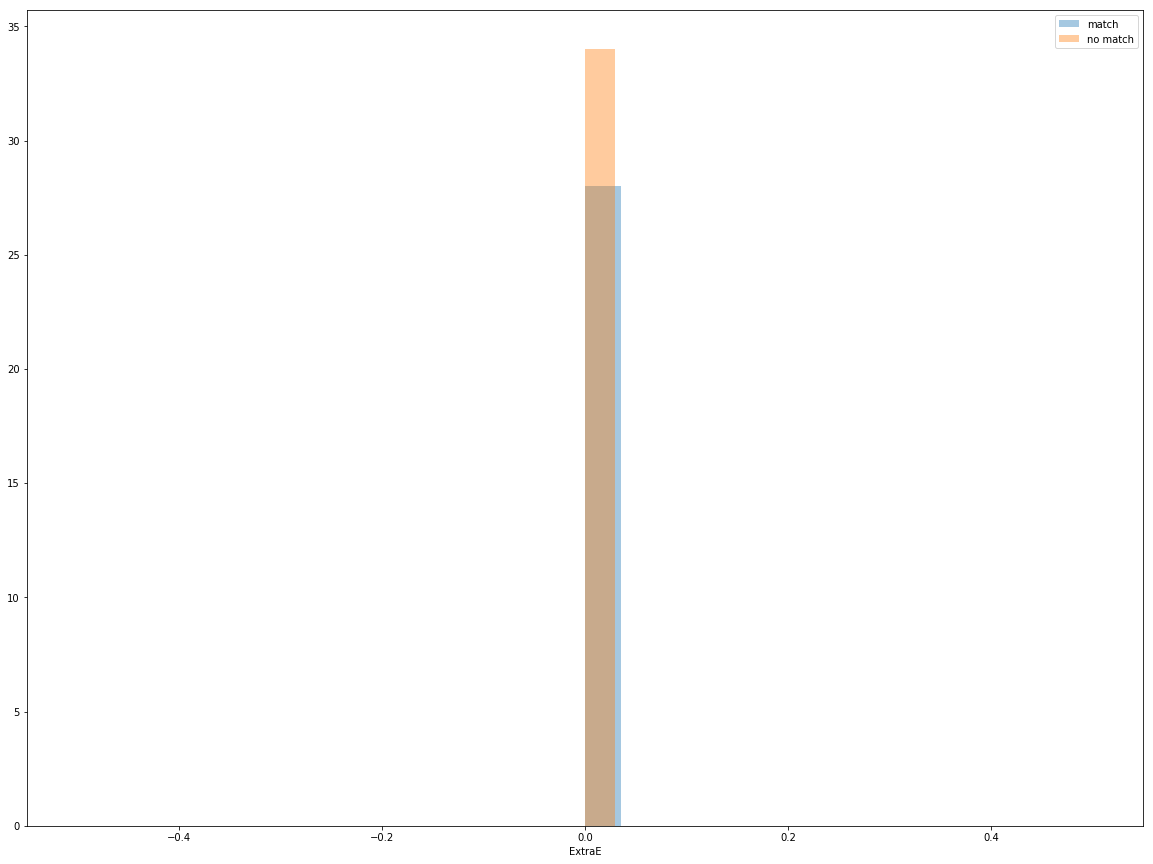




ExternalFE
0.0
0.0
0.0


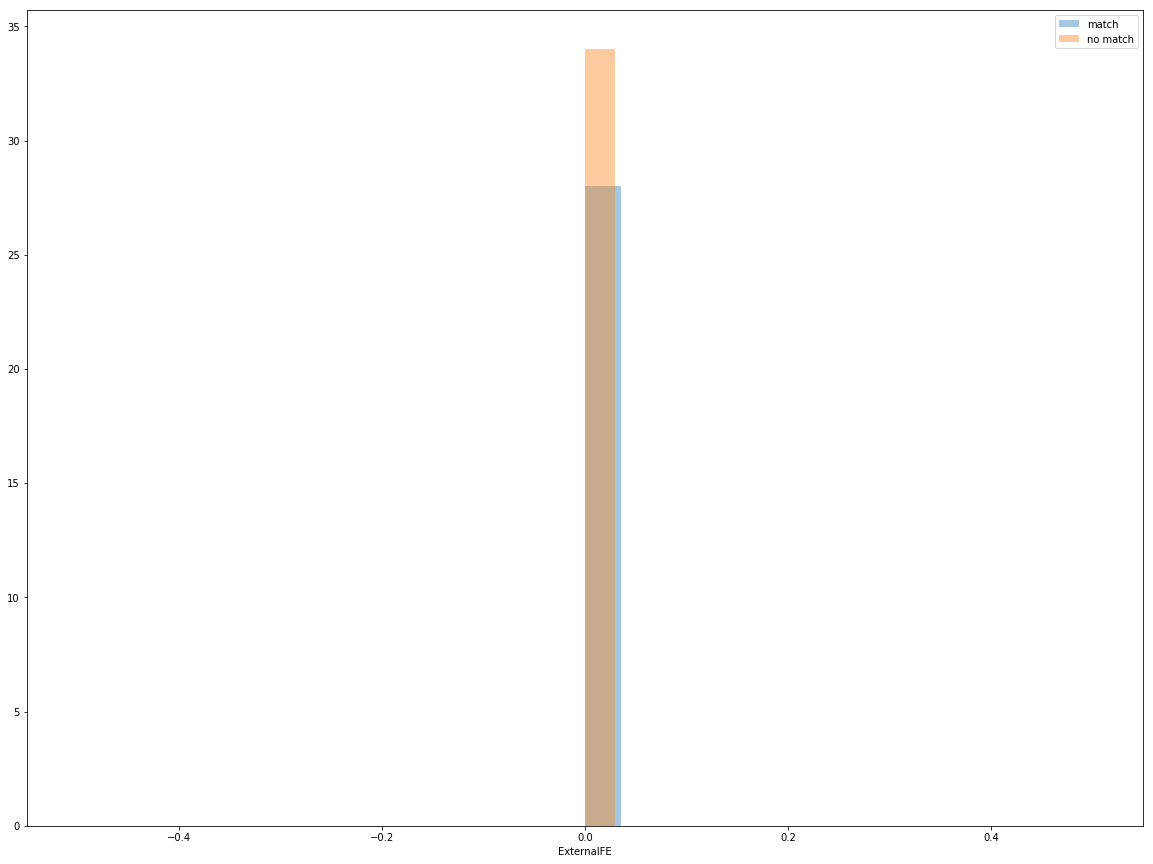




Entropy_n
0.0
0.0
0.0


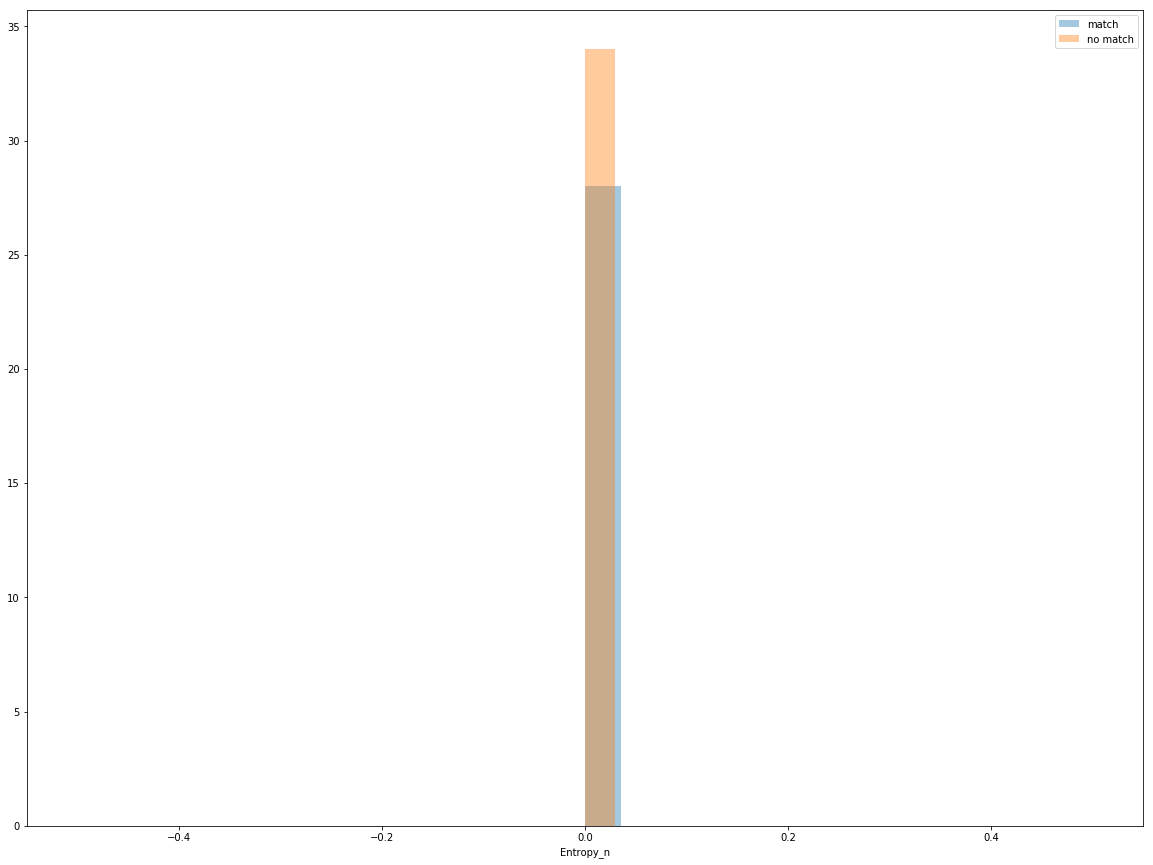




Entropy_p
0.0
0.0
0.0


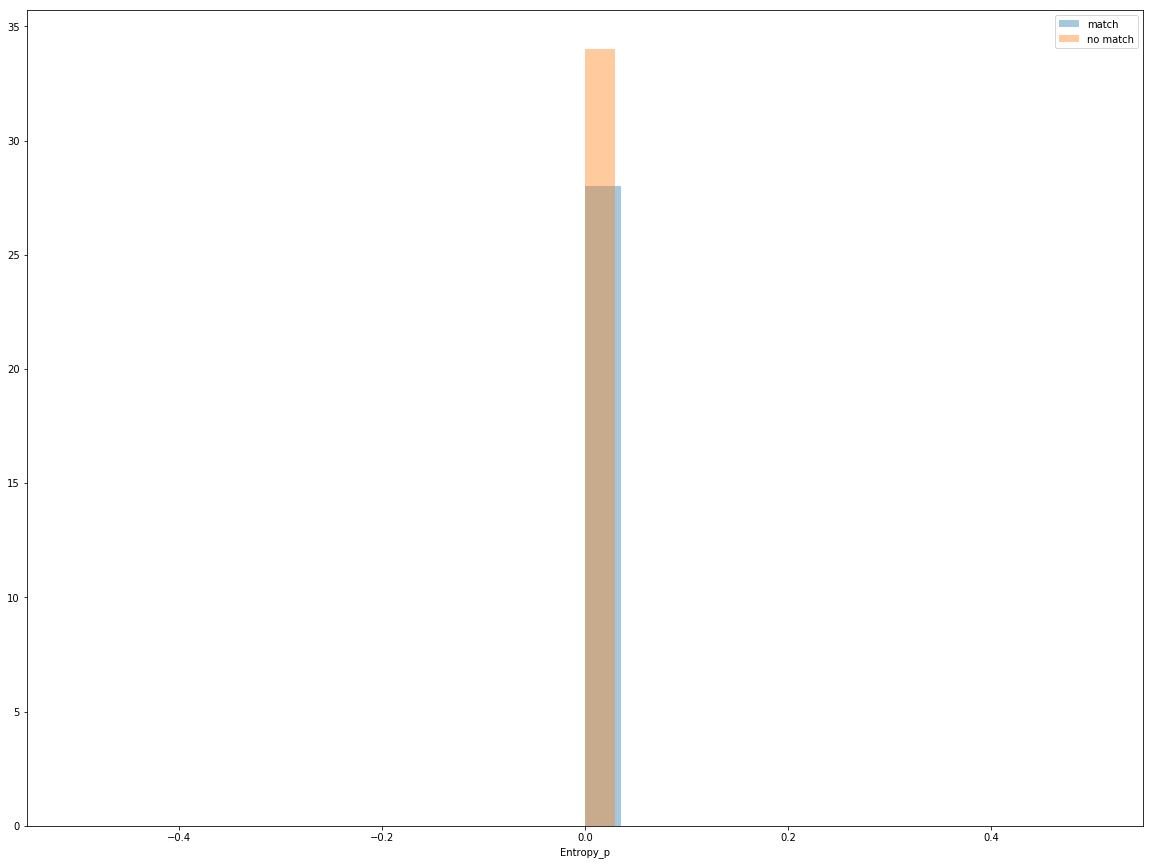

In [128]:
for j in df.columns:
    print(j)
    print(df[j].max())
    print(match_df[j].max())
    print(no_match_df[j].max())
    
    sns.distplot(match_df[j], label="match")
    sns.distplot(no_match_df[j], label="no match")
    plt.legend()
    plt.show()
    
    print("\n\n")
    